# Best for balance by confidence (~800 helpful / ~662 not helpful) 0.805


Random forest 
combined (helpful/not_help)
features : liwc, inq, extracted aspects
k = 76

## Optimizing approaches 

1. extracted aspects scale features [**0.8135**]
2. hyperparameters [**changing # trees have no results**]
3. add more features (khaled's, extract again) [**0.8270**]
4. balance data : reduced accuracy to [**0.824**]
4. extracted aspects stemming [?]


In [2]:
# read books data
books_data = pd.read_csv("appen_translated - books.csv")
books_conf = books_data[(books_data["confidence"] == 1.0) & (books_data["helpfulness"] == "helpful") | (books_data["helpfulness"] != "helpful")]

In [11]:
#extract features
#liwc_full = liwc_extract(books_data["review_en"])
#inq_full = inq_extract(books_data["review_en"])

#store
#liwc_full.to_csv("liwc_books_full.csv")
#inq_full.to_csv("inq_books_full.csv")

#load
liwc_full = pd.read_csv("liwc_books_full.csv").drop(columns=["Unnamed: 0"])
inq_full = pd.read_csv("inq_books_full.csv").drop(columns=["Unnamed: 0"])

In [12]:
liwc_conf = liwc_full.reindex(books_conf.index)
inq_conf = inq_full.reindex(books_conf.index)

In [13]:
# books aspects (extracted from our feature extraction code)

books_aspects = ["habits","events","lot","sin","contradictions","society","part","description","book","bamgaha","fairy","chapters","reality","bhalslash","thing","characters","poker","extent","injustice","souad","masterpiece","rejection","work","taste","details","torment","attention","novelist","soul","diaspora","case","bitch","suffering","novel","kuwait","series","bs","comparison","raw"]

#extract aspects features
#aspect_reviews = extract_aspects(books_data["review_en"],books_aspects)
#aspect_reviews = pd.DataFrame(aspect_reviews)
#aspect_reviews.columns = books_aspects

#save
#aspect_reviews.to_csv("aspects_books_full.csv")

#load
aspect_reviews = pd.read_csv("aspects_books_full.csv").drop(columns=["Unnamed: 0"])

In [14]:
# join features
aspects_conf = aspect_reviews.reindex(books_conf.index)

In [16]:
aspects_conf

habits  events  lot  sin  contradictions  society  part  description  \
0        0.0     0.0  0.0  0.0             0.0      0.0   0.0          0.0   
2        0.0     0.0  0.0  0.0             0.0      0.0   0.0          0.0   
3        0.0     0.0  0.0  0.0             0.0      0.0   1.0          0.0   
4        0.0     0.0  0.0  0.0             0.0      0.0   0.0          0.0   
5        0.0     0.0  0.0  0.0             0.0      0.0   0.0          0.0   
...      ...     ...  ...  ...             ...      ...   ...          ...   
2394     0.0     0.0  0.0  0.0             0.0      0.0   0.0          0.0   
2397     0.0     0.0  1.0  0.0             0.0      0.0   0.0          0.0   
2400     0.0     0.0  0.0  0.0             0.0      0.0   0.0          1.0   
2401     0.0     0.0  0.0  0.0             0.0      0.0   0.0          0.0   
2403     0.0     0.0  1.0  0.0             0.0      0.0   0.0          0.0   

      book  bamgaha  ...  diaspora  case  bitch  suffering  novel  kuwait  \
0      1.0      0.0  ...       0.0   0.0    0.0        0.0    0.0     0.0   
2      0.0      0.0  ...       0.0   0.0    0.0        0.0    0.0     0.0   
3      1.0      0.0  ...       0.0   0.0    0.0        0.0    5.0     0.0   
4      1.0      0.0  ...       0.0   0.0    0.0        0.0    0.0     0.0   
5      0.0      0.0  ...       0.0   0.0    0.0        0.0    0.0     0.0   
...    ...      ...  ...       ...   ...    ...        ...    ...     ...   
2394   0.0      0.0  ...       0.0   0.0    0.0        0.0    2.0     0.0   
2397   0.0      0.0  ...       0.0   0.0    0.0        0.0    1.0     0.0   
2400   0.0      0.0  ...       0.0   0.0    0.0        0.0    1.0     0.0   
2401   0.0      0.0  ...       0.0   0.0    0.0        0.0    0.0     0.0   
2403   1.0      0.0  ...       0.0   0.0    0.0        0.0    0.0     0.0   

      series   bs  comparison  raw  
0        0.0  0.0         0.0  0.0  
2        0.0  0.0         0.0  0.0  
3        0.0  0.0         0.0  0.0  
4        0.0  0.0         0.0  0.0  
5        0.0  0.0         0.0  0.0  
...      ...  ...         ...  ...  
2394     0.0  0.0         0.0  0.0  
2397     0.0  0.0         0.0  0.0  
2400     0.0  0.0         0.0  0.0  
2401     0.0  0.0         0.0  0.0  
2403     0.0  0.0         0.0  0.0  

[1480 rows x 39 columns]

In [17]:
features_conf = join_features([liwc_conf,inq_conf,aspects_conf])

In [18]:
features_conf

0         1         2         3         4         5         6  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.078278  0.078278  0.070175  0.043478  0.085106  0.000000  0.071429   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.117417  0.117417  0.052632  0.043478  0.021277  0.000000  0.071429   
5     0.009785  0.009785  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
2394  0.042074  0.042074  0.052632  0.000000  0.021277  0.000000  0.000000   
2397  0.006849  0.006849  0.000000  0.000000  0.000000  0.000000  0.000000   
2400  0.080235  0.080235  0.105263  0.065217  0.085106  0.073171  0.071429   
2401  0.069472  0.069472  0.035088  0.021739  0.042553  0.000000  0.000000   
2403  0.014677  0.014677  0.017544  0.000000  0.021277  0.000000  0.000000   

             7         8         9  ...  series  sin  society  souad  soul  \
0     0.000000  0.000000  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
2     0.000000  0.000000  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
3     0.000000  0.000000  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
4     0.055556  0.074074  0.095238  ...     0.0  0.0      0.0    0.0   0.0   
5     0.000000  0.000000  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
...        ...       ...       ...  ...     ...  ...      ...    ...   ...   
2394  0.000000  0.018519  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
2397  0.000000  0.000000  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
2400  0.055556  0.055556  0.047619  ...     0.0  0.0      0.0    0.0   2.0   
2401  0.000000  0.018519  0.000000  ...     0.0  0.0      0.0    0.0   0.0   
2403  0.000000  0.018519  0.000000  ...     0.0  0.0      0.0    0.0   0.0   

      suffering  taste  thing  torment  work  
0           0.0    1.0    0.0      0.0   0.0  
2           0.0    0.0    0.0      0.0   0.0  
3           0.0    0.0    4.0      0.0   0.0  
4           0.0    0.0    0.0      0.0   0.0  
5           0.0    0.0    0.0      0.0   0.0  
...         ...    ...    ...      ...   ...  
2394        0.0    0.0    0.0      0.0   0.0  
2397        0.0    0.0    0.0      0.0   0.0  
2400        0.0    0.0    0.0      0.0   0.0  
2401        0.0    0.0    0.0      0.0   0.0  
2403        0.0    0.0    0.0      0.0   0.0  

[1480 rows x 225 columns]

In [19]:
#classes 
classes_conf = books_conf["helpfulness"].map(lambda x: "not_helpful" if x != "helpful" else "helpful")

In [20]:
classes_conf

0       not_helpful
2       not_helpful
3           helpful
4           helpful
5       not_helpful
           ...     
2394    not_helpful
2397    not_helpful
2400        helpful
2401    not_helpful
2403    not_helpful
Name: helpfulness, Length: 1480, dtype: object

In [118]:
#ex_with_best_k(features_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 30 122]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 30 122]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[153  65]
 [ 30 122]]

 Prediction Accuracy :  0.7432432432432432
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[178  40]
 [147   5]]

 Prediction Accuracy :  0.4945945945945946
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 35 117]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 38 114]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [132  20]]

 Prediction Accuracy :  0.5108108108108108
------------------------
SVM
Confusion Matrix : 
[[149  69]
 [ 21 131]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 24 128]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[140  78]
 [ 23 129]]

 Prediction Accuracy :  0.727027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [131  21]]

 Prediction Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[147  71]
 [ 27 125]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[156  62]
 [131  21]]

 Prediction Accuracy :  0.4783783783783784
------------------------
SVM
Confusion Matrix : 
[[150  68]
 [ 23 129]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 27 125]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 38 114]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 28 124]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[156  62]
 [131  21]]

 Prediction Accuracy :  0.4783783783783784
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 23 129]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 27 125]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[152  66]
 [ 27 125]]

 Prediction Accuracy :  0.7486486486486487
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 28 124]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[154  64]
 [131  21]]

 Prediction Accuracy :  0.47297297297297297
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 22 130]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 27 125]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[150  68]
 [ 26 126]]

 Prediction Accuracy :  0.745945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 24 128]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[148  70]
 [131  21]]

 Prediction Accuracy :  0.45675675675675675
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 25 127]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 29 123]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 38 114]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 30 122]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[146  72]
 [131  21]]

 Prediction Accuracy :  0.45135135135135135
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 28 124]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 39 113]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 30 122]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[152  66]
 [135  17]]

 Prediction Accuracy :  0.45675675675675675
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 25 127]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 29 123]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 39 113]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 29 123]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[152  66]
 [135  17]]

 Prediction Accuracy :  0.45675675675675675
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 30 122]]

 Prediction Accuracy :  0.754054054054054
------------------------
Random Forest
Confusion Matrix : 
[[163  55]
 [ 30 122]]

 Prediction Accuracy :  0.7702702702702703
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 28 124]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[152  66]
 [135  17]]

 Prediction Accuracy :  0.45675675675675675
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 27 125]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 37 115]]

 Prediction Accuracy :  0.7810810810810811
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 29 123]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[153  65]
 [135  17]]

 Prediction Accuracy :  0.4594594594594595
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 22 130]]

 Prediction Accuracy :  0.7918918918918919
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 26 126]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Random Forest
Confusion Matrix : 
[[159  59]
 [ 26 126]]

 Prediction Accuracy :  0.7702702702702703
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 29 123]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[153  65]
 [135  17]]

 Prediction Accuracy :  0.4594594594594595
------------------------
SVM
Confusion Matrix : 
[[164  54]
 [ 22 130]]

 Prediction Accuracy :  0.7945945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 26 126]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Random Forest
Confusion Matrix : 
[[167  51]
 [ 36 116]]

 Prediction Accuracy :  0.7648648648648648
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 26 126]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[145  73]
 [134  18]]

 Prediction Accuracy :  0.44054054054054054
------------------------
SVM
Confusion Matrix : 
[[164  54]
 [ 22 130]]

 Prediction Accuracy :  0.7945945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 26 126]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[157  61]
 [ 28 124]]

 Prediction Accuracy :  0.7594594594594595
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 27 125]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[144  74]
 [133  19]]

 Prediction Accuracy :  0.44054054054054054
------------------------
SVM
Confusion Matrix : 
[[164  54]
 [ 22 130]]

 Prediction Accuracy :  0.7945945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 26 126]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[162  56]
 [ 30 122]]

 Prediction Accuracy :  0.7675675675675676
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 25 127]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[145  73]
 [133  19]]

 Prediction Accuracy :  0.44324324324324327
------------------------
SVM
Confusion Matrix : 
[[164  54]
 [ 24 128]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 28 124]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Random Forest
Confusion Matrix : 
[[164  54]
 [ 31 121]]

 Prediction Accuracy :  0.7702702702702703
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 30 122]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[145  73]
 [133  19]]

 Prediction Accuracy :  0.44324324324324327
------------------------
SVM
Confusion Matrix : 
[[165  53]
 [ 24 128]]

 Prediction Accuracy :  0.7918918918918919
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 30 122]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 38 114]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 26 126]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[144  74]
 [134  18]]

 Prediction Accuracy :  0.43783783783783786
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 24 128]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 28 124]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 38 114]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 30 122]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[144  74]
 [134  18]]

 Prediction Accuracy :  0.43783783783783786
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 24 128]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 28 124]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 40 112]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 31 121]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[146  72]
 [135  17]]

 Prediction Accuracy :  0.44054054054054054
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 24 128]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 26 126]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 50 102]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 26 126]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[146  72]
 [135  17]]

 Prediction Accuracy :  0.44054054054054054
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 24 128]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 25 127]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 39 113]]

 Prediction Accuracy :  0.7945945945945946
------------------------
NN
Confusion Matrix : 
[[115 103]
 [123  29]]

 Prediction Accuracy :  0.3891891891891892
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[146  72]
 [135  17]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 29 123]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[146  72]
 [134  18]]

 Prediction Accuracy :  0.44324324324324327
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 23 129]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[162  56]
 [ 31 121]]

 Prediction Accuracy :  0.7648648648648648
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 27 125]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[145  73]
 [134  18]]

 Prediction Accuracy :  0.44054054054054054
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 22 130]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[166  52]
 [ 31 121]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 30 122]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[147  71]
 [134  18]]

 Prediction Accuracy :  0.44594594594594594
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 23 129]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[166  52]
 [ 33 119]]

 Prediction Accuracy :  0.7702702702702703
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[147  71]
 [134  18]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 24 128]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[149  69]
 [134  18]]

 Prediction Accuracy :  0.45135135135135135
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 22 130]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 40 112]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[148  70]
 [ 27 125]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[149  69]
 [134  18]]

 Prediction Accuracy :  0.45135135135135135
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 23 129]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 39 113]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 26 126]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[153  65]
 [134  18]]

 Prediction Accuracy :  0.46216216216216216
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 23 129]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Random Forest
Confusion Matrix : 
[[194  24]
 [ 55  97]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 28 124]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[151  67]
 [133  19]]

 Prediction Accuracy :  0.4594594594594595
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 22 130]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 40 112]]

 Prediction Accuracy :  0.7702702702702703
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 33 119]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[151  67]
 [133  19]]

 Prediction Accuracy :  0.4594594594594595
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 23 129]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 34 118]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 27 125]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[158  60]
 [133  19]]

 Prediction Accuracy :  0.4783783783783784
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 24 128]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 32 120]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 27 125]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[156  62]
 [123  29]]

 Prediction Accuracy :  0.5
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 25 127]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 39 113]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 27 125]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [120  32]]

 Prediction Accuracy :  0.5297297297297298
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 25 127]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 36 116]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 30 122]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [130  22]]

 Prediction Accuracy :  0.5054054054054054
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 26 126]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 41 111]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 32 120]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [127  25]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 30 122]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 39 113]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [124  28]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 29 123]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [123  29]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 35 117]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 45 107]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 26 126]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [125  27]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 35 117]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 36 116]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 31 121]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [125  27]]

 Prediction Accuracy :  0.5405405405405406
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 35 117]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 33 119]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 32 120]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [125  27]]

 Prediction Accuracy :  0.5405405405405406
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 35 117]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 28 124]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [125  27]]

 Prediction Accuracy :  0.5405405405405406
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 36 116]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 35 117]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [124  28]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 37 115]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 42 110]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 31 121]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [123  29]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 35 117]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 46 106]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[136  82]
 [ 19 133]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [122  30]]

 Prediction Accu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 33 119]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [119  33]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 31 121]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 45 107]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 28 124]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [113  39]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 34 118]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 44 108]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 28 124]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [113  39]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 32 120]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 45 107]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 35 117]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [102  50]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 32 120]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 45 107]]

 Prediction Accuracy :  0.7810810810810811
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 30 122]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [100  52]]

 Prediction Accuracy :  0.6
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 33 119]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 38 114]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 29 123]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 98  54]]

 Prediction Accuracy :  0.6027027027027027
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 38 114]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 31 121]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 30 122]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 93  59]]

 Prediction Accuracy :  0.6162162162162163
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 41 111]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 52 100]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 31 121]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [ 92  60]]

 Prediction Accuracy :  0.6162162162162163
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 42 110]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 36 116]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 39 113]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 91  61]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 42 110]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[194  24]
 [ 54  98]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 35 117]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 90  62]]

 Prediction Accuracy :  0.6243243243243243
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 42 110]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 45 107]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[147  71]
 [ 32 120]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 89  63]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 43 109]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 43 109]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 37 115]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 88  64]]

 Prediction Accuracy :  0.6324324324324324
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 22 130]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 47 105]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 38 114]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 25 127]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 93  59]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 46 106]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 42 110]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[145  73]
 [ 36 116]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 92  60]]

 Prediction Accuracy :  0.6243243243243243
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 46 106]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[188  30]
 [ 49 103]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[143  75]
 [ 34 118]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 91  61]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 48 104]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 47 105]]

 Prediction Accuracy :  0.7891891891891892
------------------------
NN
Confusion Matrix : 
[[146  72]
 [ 28 124]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 88  64]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 36 116]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 87  65]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 23 129]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 50 102]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 49 103]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 33 119]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 86  66]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 51 101]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 45 107]]

 Prediction Accuracy :  0.7756756756756756
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 32 120]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 84  68]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 45 107]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[188  30]
 [ 44 108]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[144  74]
 [ 33 119]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [ 77  75]]

 Prediction Accuracy :  0.6702702702702703
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 22 130]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 48 104]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 48 104]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 33 119]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 77  75]]

 Prediction Accuracy :  0.6675675675675675
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 22 130]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 44 108]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 37 115]]

 Prediction Accuracy :  0.7648648648648648
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 37 115]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 77  75]]

 Prediction Accuracy :  0.6648648648648648
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 22 130]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 48 104]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 47 105]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 28 124]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 76  76]]

 Prediction Accuracy :  0.6702702702702703
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 44 108]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 35 117]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 36 116]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 76  76]]

 Prediction Accuracy :  0.6702702702702703
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 45 107]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 44 108]]

 Prediction Accuracy :  0.7891891891891892
------------------------
NN
Confusion Matrix : 
[[172  46]
 [ 31 121]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 75  77]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 28 124]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 75  77]]

 Prediction Accuracy :  0.672972972972973
------------------------
SVM
Confusion Matrix : 
[[160  58]
 [ 22 130]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 43 109]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 44 108]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 33 119]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 75  77]]

 Prediction Accuracy :  0.672972972972973
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 23 129]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 48 104]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 46 106]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 38 114]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 74  78]]

 Prediction Accuracy :  0.672972972972973
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 23 129]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 48 104]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[188  30]
 [ 42 110]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 33 119]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 74  78]]

 Prediction Accuracy :  0.672972972972973
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 45 107]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[197  21]
 [ 58  94]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 32 120]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [ 73  79]]

 Prediction Accuracy :  0.6810810810810811
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 41 111]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 39 113]]

 Prediction Accuracy :  0.7702702702702703
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 32 120]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 73  79]]

 Prediction Accuracy :  0.6837837837837838
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 43 109]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 48 104]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 32 120]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 72  80]]

 Prediction Accuracy :  0.6864864864864865
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 48 104]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 46 106]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 43 109]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 70  82]]

 Prediction Accuracy :  0.6918918918918919
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 46 106]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 39 113]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 34 118]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 69  83]]

 Prediction Accuracy :  0.6945945945945946
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 49 103]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 46 106]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[148  70]
 [ 33 119]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 69  83]]

 Prediction Accuracy :  0.6945945945945946
------------------------
SVM
Confusion Matrix : 
[[163  55]
 [ 23 129]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 45 107]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[188  30]
 [ 42 110]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[185  33]
 [138  14]]

 Prediction Accuracy :  0.5378378378378378
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 69  83]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 40 112]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [ 68  84]]

 Prediction Accuracy :  0.6945945945945946
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 48 104]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 47 105]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[144  74]
 [ 42 110]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [ 70  82]]

 Prediction Accuracy :  0.6891891891891891
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 51 101]]

 Prediction Accuracy :  0.654054054054054
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 41 111]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 42 110]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 70  82]]

 Prediction Accuracy :  0.6918918918918919
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 45 107]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 44 108]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 38 114]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [ 70  82]]

 Prediction Accuracy :  0.6891891891891891
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 54  98]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[193  25]
 [ 49 103]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 33 119]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 70  82]]

 Prediction Accuracy :  0.6864864864864865
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 22 130]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 48 104]]

 Prediction Accuracy :  0.672972972972973
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 46 106]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[147  71]
 [ 26 126]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 69  83]]

 Prediction Accuracy :  0.6891891891891891
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 22 130]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 48 104]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 43 109]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 40 112]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [ 69  83]]

 Prediction Accuracy :  0.6972972972972973
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 23 129]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 44 108]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 46 106]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 33 119]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 69  83]]

 Prediction Accuracy :  0.6945945945945946
------------------------
SVM
Confusion Matrix : 
[[161  57]
 [ 24 128]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 47 105]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[195  23]
 [ 53  99]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[148  70]
 [ 41 111]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 68  84]]

 Prediction Accuracy :  0.6918918918918919
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 47 105]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 26 126]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 69  83]]

 Prediction Accuracy :  0.6891891891891891
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 44 108]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 43 109]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[144  74]
 [ 28 124]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [ 68  84]]

 Prediction Accuracy :  0.6945945945945946
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 42 110]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 53  99]]

 Prediction Accuracy :  0.7567567567567568
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 43 109]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 68  84]]

 Prediction Accuracy :  0.6972972972972973
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 24 128]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 44 108]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 46 106]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 39 113]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [ 67  85]]

 Prediction Accuracy :  0.7027027027027027
------------------------
SVM
Confusion Matrix : 
[[162  56]
 [ 23 129]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 47 105]]

 Prediction Accuracy :  0.672972972972973
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 45 107]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[206  12]
 [110  42]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [ 67  85]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Start optimization

## Scale aspects

new accuracy = **0.8135135135135135**

Random forest 

combined (helpful/not_help)

features : liwc, inq, extracted aspects

k = 86

In [21]:
aspects_conf = aspect_reviews.reindex(books_conf.index)

In [22]:
features_conf = join_features([liwc_conf,inq_conf,aspects_conf])

In [26]:
features_conf_s = preprocessing.MinMaxScaler().fit_transform(features_conf)

In [116]:
#ex_with_best_k(features_conf_s,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[ 51 167]
 [ 10 142]]

 Prediction Accuracy :  0.5216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[ 51 167]
 [ 10 142]]

 Prediction Accuracy :  0.5216216216216216
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[216   2]
 [152   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[ 69 149]
 [ 10 142]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 41 111]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[208  10]
 [150   2]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[112 106]
 [ 14 138]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 39 113]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 42 110]]

 Prediction Accuracy :  0.7513513513513513
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 42 110]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[207  11]
 [150   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[112 106]
 [ 14 138]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 39 113]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 52 100]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 40 112]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[207  11]
 [150   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[114 104]
 [ 14 138]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 36 116]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 42 110]]

 Prediction Accuracy :  0.7918918918918919
------------------------
NN
Confusion Matrix : 
[[157  61]
 [ 29 123]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[207  11]
 [150   2]]

 Prediction Accu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 40 112]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [150   2]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[113 105]
 [ 13 139]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 38 114]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[156  62]
 [ 27 125]]

 Prediction Accuracy :  0.7594594594594595
------------------------
NN
Confusion Matrix : 
[[142  76]
 [ 28 124]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [150   2]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 27 125]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[202  16]
 [150   2]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[127  91]
 [ 13 139]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 24 128]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 37 115]]

 Prediction Accuracy :  0.7891891891891892
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[202  16]
 [150   2]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 32 120]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[204  14]
 [150   2]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[124  94]
 [ 13 139]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 27 125]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[163  55]
 [ 29 123]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 30 122]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [150   2]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[124  94]
 [ 13 139]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 27 125]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 38 114]]

 Prediction Accuracy :  0.7864864864864864
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[196  22]
 [148   4]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 29 123]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [148   4]]

 Prediction Accuracy :  0.5324324324324324
------------------------
SVM
Confusion Matrix : 
[[135  83]
 [ 12 140]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 27 125]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 39 113]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 33 119]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [148   4]]

 Prediction Accuracy :  0.5324324324324324
------------------------
SVM
Confusion Matrix : 
[[134  84]
 [ 12 140]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 27 125]]

 Prediction Accuracy :  0.772972972972973
------------------------
Random Forest
Confusion Matrix : 
[[161  57]
 [ 29 123]]

 Prediction Accuracy :  0.7675675675675676
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[207  11]
 [151   1]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 37 115]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[207  11]
 [151   1]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[134  84]
 [ 12 140]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 27 125]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Random Forest
Confusion Matrix : 
[[164  54]
 [ 30 122]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 28 124]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[207  11]
 [151   1]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[133  85]
 [ 12 140]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 27 125]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 40 112]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[201  17]
 [149   3]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 29 123]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [148   4]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[133  85]
 [ 11 141]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 29 123]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 43 109]]

 Prediction Accuracy :  0.7702702702702703
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[202  16]
 [147   5]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 37 115]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[202  16]
 [147   5]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 11 141]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 28 124]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 42 110]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 22 130]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [147   5]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 11 141]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 25 127]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 40 112]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 25 127]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [147   5]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 10 142]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 24 128]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 39 113]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 29 123]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [142  10]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[134  84]
 [ 10 142]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 26 126]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 36 116]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[204  14]
 [142  10]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 29 123]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[202  16]
 [139  13]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 13 139]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 30 122]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 39 113]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 34 118]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [139  13]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[137  81]
 [ 13 139]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 27 125]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 35 117]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 27 125]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [135  17]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[137  81]
 [ 14 138]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 28 124]]

 Prediction Accuracy :  0.754054054054054
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 45 107]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 25 127]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [134  18]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[135  83]
 [ 14 138]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 32 120]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 36 116]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 27 125]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [133  19]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[135  83]
 [ 14 138]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 36 116]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 34 118]]

 Prediction Accuracy :  0.7864864864864864
------------------------
NN
Confusion Matrix : 
[[218   0]
 [151   1]]

 Prediction Accuracy :  0.5918918918918918
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [132  20]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 33 119]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [128  24]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 14 138]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 40 112]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 27 125]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [128  24]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 14 138]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 43 109]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 39 113]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 28 124]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [128  24]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 15 137]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 44 108]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 47 105]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 31 121]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [128  24]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[135  83]
 [ 15 137]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 45 107]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 34 118]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [128  24]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 26 126]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [127  25]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[134  84]
 [ 15 137]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 40 112]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 44 108]]

 Prediction Accuracy :  0.7783783783783784
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 29 123]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [126  26]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[134  84]
 [ 15 137]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 42 110]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 45 107]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 38 114]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [125  27]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 14 138]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 40 112]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 46 106]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 35 117]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[188  30]
 [125  27]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 14 138]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 42 110]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 39 113]]

 Prediction Accuracy :  0.7783783783783784
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[188  30]
 [124  28]]

 Prediction Accu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 40 112]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [121  31]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 13 139]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 42 110]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 37 115]]

 Prediction Accuracy :  0.772972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[182  36]
 [120  32]]

 Prediction Accu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 34 118]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[182  36]
 [120  32]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[137  81]
 [ 14 138]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 40 112]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 44 108]]

 Prediction Accuracy :  0.7972972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[180  38]
 [118  34]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 33 119]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[179  39]
 [118  34]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 13 139]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 44 108]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 38 114]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 31 121]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[180  38]
 [117  35]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 13 139]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 45 107]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 43 109]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 32 120]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[180  38]
 [114  38]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 13 139]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 47 105]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 48 104]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 38 114]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[179  39]
 [113  39]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 13 139]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 47 105]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 40 112]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[214   4]
 [149   3]]

 Prediction Accuracy :  0.5864864864864865
------------------------
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[180  38]
 [114  38]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 30 122]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[180  38]
 [114  38]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 13 139]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 48 104]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 46 106]]

 Prediction Accuracy :  0.772972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [114  38]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 37 115]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [113  39]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 13 139]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 48 104]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[188  30]
 [ 46 106]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 33 119]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [112  40]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 13 139]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 47 105]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 47 105]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 45 107]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [112  40]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 15 137]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 48 104]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 37 115]]

 Prediction Accuracy :  0.7648648648648648
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 38 114]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [112  40]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 15 137]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 49 103]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 49 103]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 33 119]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [109  43]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 15 137]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 44 108]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 40 112]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [105  47]]

 Prediction Accuracy :  0.6027027027027027
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 15 137]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 46 106]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 46 106]]

 Prediction Accuracy :  0.7918918918918919
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [106  46]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 37 115]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [109  43]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 15 137]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 48 104]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 45 107]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 43 109]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [108  44]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 15 137]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 47 105]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[191  27]
 [ 45 107]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [109  43]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 24 128]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [107  45]]

 Prediction Accuracy :  0.5972972972972973
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 16 136]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 40 112]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[197  21]
 [ 58  94]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 44 108]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [106  46]]

 Prediction Accuracy :  0.5972972972972973
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 16 136]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 40 112]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 39 113]]

 Prediction Accuracy :  0.7702702702702703
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [105  47]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 38 114]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [104  48]]

 Prediction Accuracy :  0.6054054054054054
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 17 135]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 48 104]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 46 106]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 33 119]]

 Prediction Accuracy :  0.8027027027027027
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [104  48]]

 Prediction Accuracy :  0.6027027027027027
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 17 135]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 47 105]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 37 115]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 33 119]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [105  47]]

 Prediction Accuracy :  0.6
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 16 136]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 47 105]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 40 112]]

 Prediction Accuracy :  0.772972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 35 117]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [101  51]]

 Prediction Accuracy :  0.6081081081081081
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 17 135]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 45 107]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 43 109]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 35 117]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [101  51]]

 Prediction Accuracy :  0.6054054054054054
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 17 135]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 48 104]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 33 119]]

 Prediction Accuracy :  0.7837837837837838
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  36]
 [ 49 103]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [101  51]]

 Prediction Accuracy :  0.6027027027027027
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 50 102]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 43 109]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 45 107]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[173  45]
 [100  52]]

 Prediction Accuracy :  0.6081081081081081
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 16 136]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 47 105]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 43 109]]

 Prediction Accuracy :  0.7702702702702703
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 35 117]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 97  55]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 48 104]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 43 109]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 46 106]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 98  54]]

 Prediction Accuracy :  0.6162162162162163
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 49 103]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[190  28]
 [ 48 104]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[149  69]
 [ 45 107]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 99  53]]

 Prediction Accuracy :  0.6135135135135135
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 49 103]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[188  30]
 [ 46 106]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  44]
 [ 38 114]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [100  52]]

 Prediction Accuracy :  0.6108108108108108
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 48 104]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 43 109]]

 Prediction Accuracy :  0.7864864864864864
------------------------
NN
Confusion Matrix : 
[[166  52]
 [ 33 119]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [102  50]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 37 115]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [102  50]]

 Prediction Accuracy :  0.6054054054054054
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 49 103]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[195  23]
 [ 54  98]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 38 114]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [100  52]]

 Prediction Accuracy :  0.6108108108108108
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 16 136]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 45 107]]

 Prediction Accuracy :  0.672972972972973
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 37 115]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 38 114]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [100  52]]

 Prediction Accuracy :  0.6108108108108108
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[132  86]
 [ 44 108]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 42 110]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 44 108]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [101  51]]

 Prediction Accuracy :  0.6081081081081081
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 48 104]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 53  99]]

 Prediction Accuracy :  0.7621621621621621
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 41 111]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [101  51]]

 Prediction Accuracy :  0.6081081081081081
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 46 106]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 46 106]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 44 108]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [101  51]]

 Prediction Accuracy :  0.6081081081081081
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 15 137]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 45 107]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 45 107]]

 Prediction Accuracy :  0.7783783783783784
------------------------
NN
Confusion Matrix : 
[[215   3]
 [152   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [102  50]]

 Prediction Accu

In [27]:
extract_classify_test(features_conf_s,classes_conf,86)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [101  51]]

 Prediction Accuracy :  0.6027027027027027
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 50 102]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 43 109]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[155  63]
 [ 45 107]]

 Prediction Accuracy :  0.7081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'NB': (array([[172,  46],
         [101,  51]]),
  0.6027027027027027),
 'SVM': (array([[142,  76],
         [ 17, 135]]),
  0.7486486486486487),
 'DT': (array([[146,  72],
         [ 50, 102]]),
  0.6702702702702703),
 'RF': (array([[192,  26],
         [ 43, 109]]),
  0.8135135135135135),
 'NN': (array([[155,  63],
         [ 45, 107]]),
  0.7081081081081081)}

## Random forests #trees 

no improvement 
2 is ok with acc: 0.8135

In [138]:
#classes
le = preprocessing.LabelEncoder()
le.fit(classes_conf)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes = le.transform(classes_conf)

#k
sel_k = SelectKBest(chi2, k=86)
f_kbest_k = sel_k.fit_transform(features_conf_s, classes_conf)

#split
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1)


#clf
from sklearn.ensemble import RandomForestClassifier

accuracies = []

for i in range(1,100):
    print("------------------------",i)
    clf = RandomForestClassifier(max_depth=i, random_state=0).fit(xtrain,ytrain)
    accuracies.append(test(clf,xtest,ytest)[1])

Classes found :  ['helpful' 'not_helpful']
------------------------ 1
Confusion Matrix : 
[[201  17]
 [ 58  94]]

 Prediction Accuracy :  0.7972972972972973
------------------------
------------------------ 2
Confusion Matrix : 
[[192  26]
 [ 43 109]]

 Prediction Accuracy :  0.8135135135135135
------------------------
------------------------ 3
Confusion Matrix : 
[[174  44]
 [ 33 119]]

 Prediction Accuracy :  0.7918918918918919
------------------------
------------------------ 4
Confusion Matrix : 
[[175  43]
 [ 31 121]]

 Prediction Accuracy :  0.8
------------------------
------------------------ 5
Confusion Matrix : 
[[175  43]
 [ 31 121]]

 Prediction Accuracy :  0.8
------------------------
------------------------ 6
Confusion Matrix : 
[[174  44]
 [ 31 121]]

 Prediction Accuracy :  0.7972972972972973
------------------------
------------------------ 7
Confusion Matrix : 
[[173  45]
 [ 32 120]]

 Prediction Accuracy :  0.7918918918918919
------------------------
--------------

Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 62
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 63
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 64
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 65
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 66
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 67
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
------------------------ 68
Confusion Matrix : 


In [139]:
max(accuracies)

0.8135135135135135

## Adding arabic features

increase to (0.8270)

In [108]:
ar_books_aspects = pd.read_csv("arabic_books_aspect_words.csv")

In [109]:
l = list(ar_books_aspects["الكاتب"])
l.append("الكاتب")
ar_books_aspects = l
ar_books_aspects

['الكاتبة',
 'المؤلف',
 'المشاعر',
 'الحب',
 'الحياة',
 'الموت',
 'الدين',
 'التاريخ',
 'الاسلام',
 'المجتمع',
 'المرأة',
 'الرجل',
 'الحبكة',
 'الاحداث',
 'القصة',
 'الرواية',
 'الفكرة',
 'قصص',
 'السرد',
 'الافكار',
 'التفاصيل',
 'البداية',
 'الحقيقة',
 'اللغة',
 'العربية',
 'الكتابة',
 'وصف',
 'الكلمات',
 'النهاية',
 'الآخر',
 'شخصية',
 'الكاتب']

In [110]:
ar_aspects_reviews = extract_aspects_df(books_conf["review"],ar_books_aspects)

الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة

الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخ

المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربي

الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصي

شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة


الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
ا

العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
ال

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخ

الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتا

النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلما

الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
ال

العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
ال

العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
ال

شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة


المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحق

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة

قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب


المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربي

المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة

شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة


الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتم

المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغ

In [111]:
ar_aspects_reviews.sum()

الكاتبة      134.0
المؤلف        46.0
المشاعر       45.0
الحب         205.0
الحياة        98.0
الموت         31.0
الدين        121.0
التاريخ      119.0
الاسلام       42.0
المجتمع       61.0
المرأة        31.0
الرجل         39.0
الحبكة        25.0
الاحداث      137.0
القصة        103.0
الرواية     1170.0
الفكرة        44.0
قصص           54.0
السرد         58.0
الافكار        8.0
التفاصيل      85.0
البداية       58.0
الحقيقة       72.0
اللغة         68.0
العربية       55.0
الكتابة       35.0
وصف          247.0
الكلمات       49.0
النهاية      180.0
الآخر         41.0
شخصية        135.0
الكاتب       404.0
dtype: float64

In [188]:
features_conf_ar = join_features([features_conf_s,ar_aspects_reviews])

In [189]:
features_conf_ar_s =  preprocessing.MinMaxScaler().fit_transform(features_conf_ar)

In [191]:
features_conf_ar_s.shape

(1480, 257)

In [192]:
ex_with_best_k(features_conf_ar_s,classes_conf,257)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[ 43 175]
 [  0 152]]

 Prediction Accuracy :  0.527027027027027
------------------------
Random Forest
Confusion Matrix : 
[[ 43 175]
 [  0 152]]

 Prediction Accuracy :  0.527027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[ 63 155]
 [  7 145]]

 Prediction Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 43 109]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [146   6]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[115 103]
 [ 17 135]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 38 114]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[148  70]
 [ 27 125]]

 Prediction Accuracy :  0.7378378378378379
------------------------
NN
Confusion Matrix : 
[[170  48]
 [ 48 104]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[204  14]
 [147   5]]

 Prediction Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 38 114]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [146   6]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[123  95]
 [ 19 133]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 42 110]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 38 114]]

 Prediction Accuracy :  0.7864864864864864
------------------------
NN
Confusion Matrix : 
[[170  48]
 [ 34 118]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 43 109]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[126  92]
 [ 13 139]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 42 110]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 33 119]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 42 110]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[128  90]
 [ 14 138]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 42 110]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[164  54]
 [ 27 125]]

 Prediction Accuracy :  0.7810810810810811
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 44 108]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[132  86]
 [ 13 139]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 29 123]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[159  59]
 [ 24 128]]

 Prediction Accuracy :  0.7756756756756756
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 30 122]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [146   6]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[137  81]
 [ 14 138]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 37 115]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[163  55]
 [ 26 126]]

 Prediction Accuracy :  0.7810810810810811
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  41]
 [ 45 107]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [147   5]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 15 137]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 38 114]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[167  51]
 [ 26 126]]

 Prediction Accuracy :  0.7918918918918919
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [147   5]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 28 124]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[196  22]
 [147   5]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 15 137]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 23 129]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 24 128]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 27 125]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [147   5]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 15 137]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 26 126]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 25 127]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 33 119]]

 Prediction Accuracy :  0.8027027027027027
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [147   5]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 15 137]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 26 126]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[166  52]
 [ 22 130]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 28 124]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [147   5]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 12 140]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 28 124]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 25 127]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [147   5]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 27 125]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [147   5]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[135  83]
 [ 12 140]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 27 125]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[166  52]
 [ 25 127]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 25 127]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[189  29]
 [148   4]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[136  82]
 [ 12 140]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 26 126]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 26 126]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[190  28]
 [148   4]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 25 127]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [146   6]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[135  83]
 [ 13 139]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 32 120]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 26 126]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [146   6]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 28 124]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [146   6]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[137  81]
 [ 13 139]]

 Prediction Accuracy :  0.745945945945946
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 30 122]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[165  53]
 [ 25 127]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  35]
 [ 45 107]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [146   6]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 13 139]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 28 124]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 26 126]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 24 128]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [145   7]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 13 139]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 24 128]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 24 128]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[168  50]
 [ 29 123]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[188  30]
 [145   7]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 27 125]]

 Prediction Accuracy :  0.7891891891891892
------------------------
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [143   9]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 13 139]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 28 124]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 26 126]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 26 126]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [143   9]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 13 139]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 27 125]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 26 126]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 28 124]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[185  33]
 [143   9]]

 Prediction Accuracy :  0.5243243243243243
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 13 139]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 27 125]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 27 125]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[185  33]
 [143   9]]

 Prediction Accuracy :  0.5243

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 27 125]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[185  33]
 [142  10]]

 Prediction Accuracy :  0.527027027027027
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 13 139]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 21 131]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 30 122]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 28 124]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[183  35]
 [142  10]]

 Prediction Accuracy :  0.5216216216216216
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 13 139]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[137  81]
 [ 29 123]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[170  48]
 [ 25 127]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[164  54]
 [ 28 124]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [142  10]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 33 119]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [142  10]]

 Prediction Accuracy :  0.5243243243243243
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 13 139]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 26 126]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 27 125]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 29 123]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [142  10]]

 Prediction Accuracy :  0.5243243243243243
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 13 139]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[136  82]
 [ 28 124]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 26 126]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 33 119]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [142  10]]

 Prediction Accuracy :  0.5243243243243243
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 13 139]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 26 126]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 26 126]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 26 126]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [142  10]]

 Prediction Accuracy :  0.5243243243243243
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 13 139]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 27 125]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[169  49]
 [ 24 128]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[183  35]
 [141  11]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 34 118]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[189  29]
 [146   6]]

 Prediction Accuracy :  0.527027027027027
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 12 140]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 29 123]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[167  51]
 [ 28 124]]

 Prediction Accuracy :  0.7864864864864864
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 34 118]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[192  26]
 [143   9]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 13 139]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 27 125]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[167  51]
 [ 25 127]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 31 121]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[192  26]
 [143   9]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 29 123]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 28 124]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 33 119]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [143   9]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 28 124]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 27 125]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 35 117]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [143   9]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 28 124]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 26 126]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 33 119]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [143   9]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 30 122]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 27 125]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 34 118]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[190  28]
 [142  10]]

 Prediction Accuracy :  0.5405405405405406
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 30 122]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 28 124]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[190  28]
 [142  10]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 33 119]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [142  10]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 14 138]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 29 123]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 27 125]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [142  10]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 28 124]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[190  28]
 [143   9]]

 Prediction Accuracy :  0.5378378378378378
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 32 120]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 27 125]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 31 121]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[192  26]
 [144   8]]

 Prediction Accuracy :  0.5405405405405406
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 32 120]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 29 123]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 29 123]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [143   9]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 14 138]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 34 118]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 28 124]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 29 123]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [143   9]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 14 138]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 33 119]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 28 124]]

 Prediction Accuracy :  0.7972972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [143   9]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 28 124]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [144   8]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 14 138]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[138  80]
 [ 32 120]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[168  50]
 [ 25 127]]

 Prediction Accuracy :  0.7972972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [143   9]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 29 123]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [140  12]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 14 138]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 35 117]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 28 124]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 33 119]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [140  12]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 14 138]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 31 121]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 27 125]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 31 121]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[191  27]
 [135  17]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 14 138]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 41 111]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 27 125]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 29 123]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[190  28]
 [134  18]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 14 138]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 39 113]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[167  51]
 [ 25 127]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 36 116]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[191  27]
 [130  22]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 14 138]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 33 119]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 29 123]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 28 124]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [130  22]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 42 110]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 32 120]]

 Prediction Accuracy :  0.7864864864864864
------------------------
NN
Confusion Matrix : 
[[195  23]
 [132  20]]

 Prediction Accuracy :  0.581081081081081
------------------------
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [130  22]]

 Prediction Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 35 117]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [128  24]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 14 138]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 44 108]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 26 126]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 29 123]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [124  28]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 14 138]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 44 108]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 29 123]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [124  28]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 33 119]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [124  28]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 14 138]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 40 112]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 29 123]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 32 120]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [124  28]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 43 109]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 27 125]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 33 119]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [124  28]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 14 138]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 37 115]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 26 126]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[148  70]
 [ 32 120]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [122  30]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 14 138]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 40 112]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [121  31]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 38 114]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 26 126]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 37 115]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[181  37]
 [119  33]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 41 111]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 27 125]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 29 123]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[181  37]
 [119  33]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 15 137]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 37 115]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 30 122]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 37 115]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [119  33]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[147  71]
 [ 15 137]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 43 109]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 43 109]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[183  35]
 [119  33]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[147  71]
 [ 15 137]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 43 109]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 27 125]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 36 116]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[181  37]
 [117  35]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[147  71]
 [ 15 137]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 41 111]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 38 114]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[181  37]
 [114  38]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[147  71]
 [ 15 137]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 38 114]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 25 127]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 34 118]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[179  39]
 [111  41]]

 Prediction Accuracy :  0.5945945945945946
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 42 110]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[149  69]
 [ 35 117]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[178  40]
 [111  41]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 41 111]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 29 123]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 38 114]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[178  40]
 [110  42]]

 Prediction Accuracy :  0.5945945945945946
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 43 109]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[169  49]
 [ 27 125]]

 Prediction Accuracy :  0.7945945945945946
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 35 117]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[177  41]
 [105  47]]

 Prediction Accuracy :  0.6054054054054054
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 14 138]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 39 113]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 26 126]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 45 107]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [102  50]]

 Prediction Accuracy :  0.6108108108108108
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 14 138]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 40 112]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 36 116]]

 Prediction Accuracy :  0.7891891891891892
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 50 102]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[178  40]
 [101  51]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 14 138]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 39 113]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 30 122]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 36 116]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[179  39]
 [100  52]]

 Prediction Accuracy :  0.6243243243243243
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 14 138]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 42 110]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 35 117]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[177  41]
 [102  50]]

 Prediction Accuracy :  0.6135135135135135
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 13 139]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 42 110]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 27 125]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 35 117]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[177  41]
 [102  50]]

 Prediction Accuracy :  0.6135135135135135
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 14 138]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 42 110]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 29 123]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[177  41]
 [102  50]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 38 114]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  103
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [101  51]]

 Prediction Accuracy :  0.5972972972972973
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 14 138]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 42 110]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 39 113]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  104
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 99  53]]

 Prediction Accuracy :  0.6054054054054054
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 14 138]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 42 110]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 29 123]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 43 109]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[175  43]
 [ 95  57]]

 Prediction Accuracy :  0.6270270270270271
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 14 138]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 42 110]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 29 123]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[216   2]
 [151   1]]

 Prediction Accuracy :  0.5864864864864865
------------------------
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 92  60]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 38 114]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [ 91  61]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 14 138]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 45 107]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 29 123]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 39 113]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  108
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 92  60]]

 Prediction Accuracy :  0.6243243243243243
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 14 138]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 43 109]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 27 125]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 43 109]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  109
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 92  60]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 52 100]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[158  60]
 [ 26 126]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 92  60]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 38 114]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 91  61]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 42 110]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 36 116]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 89  63]]

 Prediction Accuracy :  0.6270270270270271
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 14 138]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 42 110]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 31 121]]

 Prediction Accuracy :  0.7945945945945946
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  114
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 89  63]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 39 113]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  116
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 88  64]]

 Prediction Accuracy :  0.6243243243243243
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 42 110]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 33 119]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 47 105]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  117
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 90  62]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 47 105]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 28 124]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 30 122]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 90  62]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 47 105]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 27 125]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 47 105]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 90  62]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 44 108]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 28 124]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 51 101]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 87  65]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 41 111]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 30 122]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 45 107]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 88  64]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 15 137]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 43 109]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 29 123]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 44 108]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  122
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 89  63]]

 Prediction Accuracy :  0.6189189189189189
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 36 116]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 33 119]]

 Prediction Accuracy :  0.7864864864864864
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  123
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 90  62]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 38 114]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  126
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 90  62]]

 Prediction Accuracy :  0.6135135135135135
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 14 138]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 45 107]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 33 119]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  127
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 90  62]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 46 106]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  128
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 90  62]]

 Prediction Accuracy :  0.6108108108108108
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 16 136]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 46 106]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 31 121]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  129
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 91  61]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 45 107]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  130
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 90  62]]

 Prediction Accuracy :  0.6108108108108108
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 17 135]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 45 107]]

 Prediction Accuracy :  0.672972972972973
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 39 113]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 36 116]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  131
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 90  62]]

 Prediction Accuracy :  0.6162162162162163
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 17 135]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[137  81]
 [ 42 110]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 28 124]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 47 105]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 89  63]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 17 135]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 43 109]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 30 122]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[212   6]
 [150   2]]

 Prediction Accuracy :  0.5783783783783784
------------------------
k = ----------  133
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 89  63]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 43 109]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  136
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 86  66]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 16 136]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 47 105]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 29 123]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 52 100]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  137
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [ 86  66]]

 Prediction Accuracy :  0.6324324324324324
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 17 135]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[138  80]
 [ 44 108]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 32 120]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 47 105]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  138
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 83  69]]

 Prediction Accuracy :  0.6324324324324324
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 17 135]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 43 109]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 47 105]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  139
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 83  69]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 17 135]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 45 107]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 45 107]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  140
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 81  71]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 17 135]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 42 110]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 35 117]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  141
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 79  73]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 17 135]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[136  82]
 [ 44 108]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 27 125]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 38 114]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  142
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 79  73]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 17 135]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 46 106]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 29 123]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[110 108]
 [ 34 118]]

 Prediction Accuracy :  0.6162162162162163
------------------------
k = ----------  143
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 79  73]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 45 107]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  144
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 79  73]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 44 108]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 29 123]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 43 109]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  145
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 79  73]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[135  83]
 [ 44 108]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 31 121]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 48 104]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  146
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 79  73]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[133  85]
 [ 45 107]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 29 123]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[144  74]
 [ 46 106]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  147
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 81  71]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[136  82]
 [ 47 105]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 29 123]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 46 106]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  148
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 82  70]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 45 107]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 43 109]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  149
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 81  71]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 38 114]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[149  69]
 [ 45 107]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  150
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 82  70]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 17 135]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 46 106]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 33 119]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[149  69]
 [ 53  99]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 81  71]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 17 135]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[138  80]
 [ 51 101]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 32 120]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 51 101]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  152
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 82  70]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 17 135]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 48 104]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 31 121]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[133  85]
 [ 42 110]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  153
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 82  70]]

 Prediction Accuracy :  0.6324324324324324
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 45 107]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 50 102]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  154
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 81  71]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 43 109]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 46 106]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  155
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 80  72]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 49 103]]

 Prediction Accuracy :  0.654054054054054
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 29 123]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 39 113]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  156
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 79  73]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[135  83]
 [ 48 104]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[214   4]
 [151   1]]

 Prediction Accuracy :  0.581081081081081
------------------------
k = ----------  157
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 79  73]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 43 109]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 79  73]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 49 103]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[162  56]
 [ 32 120]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  159
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 79  73]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 55  97]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  161
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 78  74]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 15 137]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[139  79]
 [ 45 107]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 33 119]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 37 115]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  162
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 49 103]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[212   6]
 [150   2]]

 Prediction Accuracy :  0.5783783783783784
------------------------
k = ----------  163
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 40 112]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  165
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 45 107]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 42 110]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  166
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 78  74]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 15 137]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 45 107]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  167
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 51 101]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  168
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 15 137]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 43 109]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 26 126]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 41 111]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  169
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[141  77]
 [ 46 106]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 29 123]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 36 116]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  170
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 46 106]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 28 124]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 42 110]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 77  75]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 16 136]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 46 106]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 30 122]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 46 106]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  173
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 76  76]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 46 106]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 47 105]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  174
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 76  76]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 42 110]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 49 103]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  175
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 16 136]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 46 106]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 34 118]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[205  13]
 [144   8]]

 Prediction Accuracy :  0.5756756756756757
------------------------
k = ----------  176
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 50 102]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  178
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 76  76]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 16 136]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 45 107]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 28 124]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 49 103]]

 Prediction Accuracy :  0.6891891891891891
------------------------
k = ----------  179
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 76  76]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 16 136]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 42 110]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 46 106]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  180
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 17 135]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 49 103]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[149  69]
 [ 39 113]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  181
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 47 105]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 33 119]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 40 112]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  182
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 51 101]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 32 120]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  183
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 41 111]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[169  49]
 [ 27 125]]

 Prediction Accuracy :  0.7945945945945946
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  184
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 37 115]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  187
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 43 109]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 36 116]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 38 114]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  188
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 45 107]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 31 121]]

 Prediction Accuracy :  0.7918918918918919
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 50 102]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  189
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 44 108]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 29 123]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[172  46]
 [ 70  82]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  190
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[147  71]
 [ 32 120]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  191
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 42 110]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 32 120]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  192
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.64

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 43 109]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  194
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 73  79]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 42 110]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 31 121]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 45 107]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  195
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 40 112]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 36 116]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 39 113]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  196
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 42 110]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[173  45]
 [ 30 122]]

 Prediction Accuracy :  0.7972972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  197
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 75  77]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 39 113]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  198
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 44 108]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 30 122]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 47 105]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  199
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 45 107]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 38 114]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  200
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 72  80]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 44 108]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  201
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 73  79]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 44 108]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 35 117]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  202
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 73  79]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 42 110]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 33 119]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[150  68]
 [ 48 104]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  203
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 73  79]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 16 136]]

 Prediction Accuracy :  0.754054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 43 109]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 32 120]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 44 108]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  204
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 73  79]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 41 111]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 49 103]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  205
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 73  79]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 42 110]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 37 115]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[163  55]
 [ 35 117]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  206
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 37 115]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  207
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 44 108]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 32 120]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 48 104]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  208
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 74  78]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[143  75]
 [ 15 137]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 45 107]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 29 123]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 56  96]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  209
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 75  77]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 16 136]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 41 111]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 33 119]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  66]
 [ 43 109]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  210
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 75  77]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 17 135]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[144  74]
 [ 42 110]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[172  46]
 [ 34 118]]

 Prediction Accuracy :  0.7837837837837838
------------------------
NN
Confusion Matrix : 
[[216   2]
 [152   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
k = ----------  211
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 74  78]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 38 114]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  212
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 74  78]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 17 135]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 37 115]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 51 101]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  213
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 73  79]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 17 135]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 43 109]]

 Prediction Accuracy :  0.6783783783783783
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 34 118]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  214
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 73  79]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 17 135]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 39 113]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  215
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 73  79]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  63]
 [ 45 107]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  220
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 73  79]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 18 134]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 47 105]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  221
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 73  79]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 45 107]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  222
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 73  79]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 17 135]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[149  69]
 [ 42 110]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 52 100]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  223
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 74  78]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 17 135]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 45 107]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 51 101]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  224
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 74  78]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 17 135]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 44 108]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 55  97]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  225
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[139  79]
 [ 17 135]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[137  81]
 [ 48 104]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 33 119]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  226
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 72  80]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 36 116]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  227
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 72  80]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[140  78]
 [ 19 133]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 49 103]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[151  67]
 [ 45 107]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  228
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 72  80]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 51 101]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  229
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 72  80]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 50 102]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[184  34]
 [ 37 115]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[204  14]
 [143   9]]

 Prediction Accuracy :  0.5756756756756757
------------------------
k = ----------  230
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 72  80]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 41 111]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  232
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 73  79]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 20 132]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 42 110]]

 Prediction Accuracy :  0.6810810810810811
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  233
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 72  80]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[147  71]
 [ 39 113]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  235
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 72  80]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[137  81]
 [ 41 111]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[154  64]
 [ 54  98]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  236
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 20 132]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 44 108]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  237
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 43 109]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  238
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 19 133]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Decision Tree
Confusion Matrix : 
[[151  67]
 [ 43 109]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[138  80]
 [ 51 101]]

 Prediction Accuracy :  0.6459459459459459
------------------------
k = ----------  239
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[138  80]
 [ 20 132]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 45 107]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
NN
Confusion Matrix : 
[[166  52]
 [ 37 115]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  240
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 51 101]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  242
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 42 110]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[193  25]
 [ 49 103]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[147  71]
 [ 40 112]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  243
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 71  81]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 42 110]]

 Prediction Accuracy :  0.6837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 53  99]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  244
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 70  82]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 21 131]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 38 114]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[185  33]
 [ 41 111]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 48 104]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  245
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 70  82]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 21 131]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 44 108]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[182  36]
 [ 39 113]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 36 116]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  246
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 70  82]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 21 131]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 41 111]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[171  47]
 [ 27 125]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 49 103]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  247
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 70  82]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 21 131]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Decision Tree
Confusion Matrix : 
[[140  78]
 [ 37 115]]

 Prediction Accuracy :  0.6891891891891891
------------------------
Random Forest
Confusion Matrix : 
[[189  29]
 [ 43 109]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  62]
 [ 47 105]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  248
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[160  58]
 [ 70  82]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 20 132]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[143  75]
 [ 37 115]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 33 119]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  249
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 70  82]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 53  99]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  251
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 71  81]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 19 133]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[142  76]
 [ 40 112]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 35 117]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  252
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[159  59]
 [ 71  81]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[145  73]
 [ 38 114]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[200  18]
 [ 89  63]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  253
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[159  59]
 [ 71  81]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 40 112]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  254
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[159  59]
 [ 71  81]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 38 114]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[145  73]
 [ 39 113]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  255
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[159  59]
 [ 71  81]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 20 132]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Decision Tree
Confusion Matrix : 
[[148  70]
 [ 38 114]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
NN
Confusion Matrix : 
[[153  65]
 [ 43 109]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  256
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[159  59]
 [ 71  81]]

 Prediction 

## Reduce number of helpful reviews

reduced the accuracy to 0.8247


In [69]:
featurs_df = pd.DataFrame(features_conf_ar_s)
featurs_df

0         1         2         3         4         5         6    \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.078278  0.078278  0.070175  0.043478  0.085106  0.000000  0.076923   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.117417  0.117417  0.052632  0.043478  0.021277  0.000000  0.076923   
4     0.009785  0.009785  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1475  0.042074  0.042074  0.052632  0.000000  0.021277  0.000000  0.000000   
1476  0.006849  0.006849  0.000000  0.000000  0.000000  0.000000  0.000000   
1477  0.080235  0.080235  0.105263  0.065217  0.085106  0.073171  0.076923   
1478  0.069472  0.069472  0.035088  0.021739  0.042553  0.000000  0.000000   
1479  0.014677  0.014677  0.017544  0.000000  0.021277  0.000000  0.000000   

           7         8         9    ...  215  216  217  218  219  220  221  \
0     0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.5   
1     0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.055556  0.074074  0.095238  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
1475  0.000000  0.018519  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1476  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1477  0.055556  0.055556  0.047619  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1478  0.000000  0.018519  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1479  0.000000  0.018519  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           222  223  224  
0     0.000000  0.0  0.0  
1     0.000000  0.0  0.0  
2     0.222222  0.0  0.0  
3     0.000000  0.0  0.0  
4     0.000000  0.0  0.0  
...        ...  ...  ...  
1475  0.000000  0.0  0.0  
1476  0.000000  0.0  0.0  
1477  0.000000  0.0  0.0  
1478  0.000000  0.0  0.0  
1479  0.000000  0.0  0.0  

[1480 rows x 225 columns]

In [82]:
books_conf_bal_h = books_conf[books_conf["helpfulness"] == "helpful"][:662]
books_n = books_conf[books_conf["helpfulness"] != "helpful"]
books_conf_bal = pd.concat([books_conf_bal_h,books_n])
books_conf_bal

_unit_id  _golden _unit_state  _trusted_judgments   _last_judgment_at  \
3     2905523771    False   finalized                   3  12/23/2020 7:25:58   
4     2905523772    False   finalized                   3  12/23/2020 7:54:33   
6     2905523774    False   finalized                   3  12/23/2020 7:54:33   
7     2905523775    False   finalized                   3  12/23/2020 7:54:33   
10    2905523778    False   finalized                   3  12/23/2020 7:55:03   
...          ...      ...         ...                 ...                 ...   
2393  2905788857    False   finalized                   3   1/5/2021 11:57:23   
2394  2905788858    False   finalized                   3   1/5/2021 11:57:23   
2397  2905788861    False   finalized                   3  1/14/2021 11:25:41   
2401  2905788865    False   finalized                   3  1/15/2021 20:40:11   
2403  2905788867    False   finalized                   3  1/15/2021 20:40:11   

           helpfulness  confidence     no  \
3              helpful      1.0000  14611   
4              helpful      1.0000  17368   
6              helpful      1.0000  64488   
7              helpful      1.0000   2388   
10             helpful      1.0000  61608   
...                ...         ...    ...   
2393  somewhat_helpful      0.6804   8194   
2394  somewhat_helpful      0.3402  40268   
2397       not_helpful      0.3538   1605   
2401  somewhat_helpful      0.3538  29833   
2403  somewhat_helpful      0.6570  45168   

                                                 review  \
3     لم أكن قد قرأتُ لأحلام ثلاثيتها الشهيرة، ولم أ...   
4     تسحرني لغتها وقلمها. تمنيت أن صفحات الكتاب لا ...   
6     ايه العظمه دي بصراحه. روايه تحفه شموليه بتتكلم...   
7     رواية رائعة .. كنت مقتنعا أن الرواية فعلا مترج...   
10    رواية رائعة ابدع فيها الاسواني في وصف احداث حص...   
...                                                 ...   
2393  حاسة ان النهاية مش لطيفة ... سابهة مفتوحة بس ب...   
2394  من كان قد قرأ الرواية الاولى "أحببتك اكثر مما ...   
2397  أحببتها.... رواية تصف الكثير مما يحدث باختلاف ...   
2401  بجد بتفضح كل اشكال الفساد في كل حته رائعة عاوز...   
2403  ليس فقط حوارا بين مؤمن وملحد بل حوارا بين مؤمن...   

                                              review_en  
3     I had not read the dreams of the famous Thelat...  
4     Language fascinates me and her pen. I wished t...  
6     A Greatness de frankly. Novel masterpiece comp...  
7     Wonderful novel .. I was convinced that the no...  
10    Wonderful novel in which he created Aswani in ...  
...                                                 ...  
2393  The sense that the end mesh nice ... Sabhh ope...  
2394  Than he had read the first novel, "I loved you...  
2397  .... I loved her novel describes a lot of what...  
2401  Hard Ptvdh all forms of corruption in all Hett...  
2403  Not only a dialogue between the believer and a...  

[1324 rows x 10 columns]

In [126]:
bal_i = books_conf_bal.index
bal_i

Int64Index([   3,    4,    6,    7,   10,   14,   16,   20,   21,   22,
            ...
            2384, 2385, 2387, 2388, 2392, 2393, 2394, 2397, 2401, 2403],
           dtype='int64', length=1324)

In [178]:
inq_conf_bal = inq_full.reindex(bal_i)
liwc_conf_bal = liwc_full.reindex(bal_i)
aspects_conf_bal = extract_aspects_df(books_data["review_en"],books_aspects).reindex(bal_i)
ar_aspects_conf_bal = extract_aspects_df(books_data["review"],ar_books_aspects).reindex(bal_i)

habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
c

novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradicti

part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
master

taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
h

lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poke

souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel


comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bh

characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
di

novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fa

chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
t

diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
pa

description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece

torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
l

sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
ex

rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
c

raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thi

extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch

kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
ch

bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention


bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description

bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
t

description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece

diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
pa

novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradicti

poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case

reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
at

novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fa

diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
pa

fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
det

thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
s

habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
c

rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
c

series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters


description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece

fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
det

contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent

torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
l

novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fa

bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description

work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison


contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent

society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
soua

part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
master

attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
c

details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits


sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
ex

masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait

raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thi

poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case

kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
ch

reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
at

case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
descri

book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
w

attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
c

contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent

work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison


habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
c

injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffer

series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters


thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
s

bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description

fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
details
torment
attention
novelist
soul
diaspora
case
bitch
suffering
novel
kuwait
series
bs
comparison
raw
habits
events
lot
sin
contradictions
society
part
description
book
bamgaha
fairy
chapters
reality
bhalslash
thing
characters
poker
extent
injustice
souad
masterpiece
rejection
work
taste
det

الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف

الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحق

الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
ا

القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة

البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب

قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب


الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
ال

الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتم

الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية


شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة


قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب


شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة


وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البد

المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية

الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتا

التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البد

الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلما

السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكا

الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
ال

الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة

الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية


الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة


القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحق

المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية

الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصي

المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة

الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
ا

الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
ال

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية


المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغ

الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتا

المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربي

الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
ا

المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية

الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
ا

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
ال

السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكا

العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
ال

In [180]:
ar_aspects_conf_bal.index

Int64Index([   3,    4,    6,    7,   10,   14,   16,   20,   21,   22,
            ...
            2384, 2385, 2387, 2388, 2392, 2393, 2394, 2397, 2401, 2403],
           dtype='int64', length=1324)

In [181]:
inq_conf_bal.columns = inq_conf_bal.columns.map(lambda x: x+"_inq")
liwc_conf_bal.columns = liwc_conf_bal.columns.map(lambda x: x+"_liwc")
aspects_conf_bal.columns = aspects_conf_bal.columns.map(lambda x: x+"_asp")
ar_aspects_conf_bal.columns = ar_aspects_conf_bal.columns.map(lambda x: x+"_asp_ar")

In [182]:
features_conf_bal = join_features([inq_conf_bal, liwc_conf_bal, aspects_conf_bal, ar_aspects_conf_bal])

In [184]:
features_conf_bal

0_inq     1_inq     2_inq     3_inq     4_inq  5_inq     6_inq  \
3     0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
4     0.117417  0.117417  0.052632  0.043478  0.021277    0.0  0.071429   
6     0.013699  0.013699  0.000000  0.000000  0.000000    0.0  0.000000   
7     0.035225  0.035225  0.035088  0.000000  0.021277    0.0  0.000000   
10    0.013699  0.013699  0.017544  0.000000  0.021277    0.0  0.000000   
...        ...       ...       ...       ...       ...    ...       ...   
2393  0.015656  0.015656  0.000000  0.000000  0.000000    0.0  0.000000   
2394  0.042074  0.042074  0.052632  0.000000  0.021277    0.0  0.000000   
2397  0.006849  0.006849  0.000000  0.000000  0.000000    0.0  0.000000   
2401  0.069472  0.069472  0.035088  0.021739  0.042553    0.0  0.000000   
2403  0.014677  0.014677  0.017544  0.000000  0.021277    0.0  0.000000   

         7_inq     8_inq     9_inq  ...  اللغة_asp_ar  المؤلف_asp_ar  \
3     0.000000  0.000000  0.000000  ...           1.0            0.0   
4     0.055556  0.074074  0.095238  ...           0.0            0.0   
6     0.000000  0.000000  0.000000  ...           0.0            0.0   
7     0.000000  0.074074  0.142857  ...           0.0            0.0   
10    0.000000  0.000000  0.000000  ...           0.0            0.0   
...        ...       ...       ...  ...           ...            ...   
2393  0.000000  0.000000  0.000000  ...           0.0            0.0   
2394  0.000000  0.018519  0.000000  ...           0.0            0.0   
2397  0.000000  0.000000  0.000000  ...           0.0            0.0   
2401  0.000000  0.018519  0.000000  ...           0.0            0.0   
2403  0.000000  0.018519  0.000000  ...           0.0            0.0   

      المجتمع_asp_ar  المرأة_asp_ar  المشاعر_asp_ar  الموت_asp_ar  \
3                0.0            0.0             0.0           0.0   
4                0.0            0.0             0.0           0.0   
6                0.0            0.0             0.0           0.0   
7                0.0            0.0             1.0           0.0   
10               0.0            0.0             0.0           0.0   
...              ...            ...             ...           ...   
2393             0.0            0.0             0.0           0.0   
2394             0.0            0.0             0.0           0.0   
2397             0.0            0.0             0.0           0.0   
2401             0.0            0.0             0.0           0.0   
2403             0.0            0.0             0.0           0.0   

      النهاية_asp_ar  شخصية_asp_ar  قصص_asp_ar  وصف_asp_ar  
3                0.0           0.0         0.0         1.0  
4                0.0           0.0         0.0         0.0  
6                0.0           0.0         0.0         0.0  
7                0.0           2.0         0.0         0.0  
10               0.0           0.0         0.0         1.0  
...              ...           ...         ...         ...  
2393             2.0           0.0         0.0         0.0  
2394             0.0           0.0         0.0         0.0  
2397             0.0           0.0         0.0         0.0  
2401             0.0           0.0         0.0         0.0  
2403             0.0           0.0         0.0         0.0  

[1324 rows x 321 columns]

In [194]:
features_conf_bal_s =  preprocessing.MinMaxScaler().fit_transform(features_conf_bal)

In [185]:
classes_conf_bal = books_conf_bal["helpfulness"].map(lambda x: "not_helpful" if x != "helpful" else "helpful")

In [195]:
ex_with_best_k(features_conf_bal_s,classes_conf_bal,200)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
SVM
Confusion Matrix : 
[[ 74  88]
 [ 14 155]]

 Prediction Accuracy :  0.6918429003021148
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 38 131]]

 Prediction Accuracy :  0.7673716012084593
------------------------
Random Forest
Confusion Matrix : 
[[123  39]
 [ 38 131]]

 Prediction Accuracy :  0.7673716012084593
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
SVM
Confusion Matrix : 
[[ 88  74]
 [ 15 154]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[132  30]
 [ 36 133]]

 Prediction Accuracy :  0.8006042296072508
------------------------
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[136  26]
 [165   4]]

 Prediction Accuracy :  0.4229607250755287
------------------------
SVM
Confusion Matrix : 
[[100  62]
 [ 17 152]]

 Prediction Accuracy :  0.7613293051359517
------------------------
Decision Tree
Confusion Matrix : 
[[110  52]
 [ 45 124]]

 Prediction Accuracy :  0.7069486404833837
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 28 141]]

 Prediction Accuracy :  0.8126888217522659
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[139  23]
 [163   6]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[133  29]
 [ 42 127]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[134  28]
 [163   6]]

 Prediction Accuracy :  0.4229607250755287
------------------------
SVM
Confusion Matrix : 
[[108  54]
 [ 14 155]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[112  50]
 [ 42 127]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[132  30]
 [ 28 141]]

 Prediction Accuracy :  0.824773413897281
------------------------
NN
Confusion Matrix : 
[[135  27]
 [ 43 126]]

 Prediction Accuracy :  0.7885196374622356
------------------------
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[101  61]
 [153  16]]

 Prediction Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[134  28]
 [ 41 128]]

 Prediction Accuracy :  0.7915407854984894
------------------------
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[101  61]
 [151  18]]

 Prediction Accuracy :  0.3595166163141994
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 14 155]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[106  56]
 [ 46 123]]

 Prediction Accuracy :  0.6918429003021148
------------------------
Random Forest
Confusion Matrix : 
[[131  31]
 [ 33 136]]

 Prediction Accuracy :  0.8066465256797583
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[102  60]
 [152  17]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[134  28]
 [ 35 134]]

 Prediction Accuracy :  0.8096676737160121
------------------------
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[100  62]
 [151  18]]

 Prediction Accuracy :  0.3564954682779456
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 15 154]]

 Prediction Accuracy :  0.8157099697885196
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 46 123]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[127  35]
 [ 33 136]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[135  27]
 [ 37 132]]

 Prediction Accuracy :  0.8066465256797583
------------------------
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[100  62]
 [152  17]]

 Prediction Accuracy :  0.35347432024169184
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 18 151]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 49 120]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[104  58]
 [150  19]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[133  29]
 [ 34 135]]

 Prediction Accuracy :  0.8096676737160121
------------------------
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[105  57]
 [149  20]]

 Prediction Accuracy :  0.3776435045317221
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 19 150]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[115  47]
 [ 51 118]]

 Prediction Accuracy :  0.7039274924471299
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[131  31]
 [ 37 132]]

 Prediction Accuracy :  0.7945619335347432
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 99  63]
 [144  25]]

 Prediction Accuracy :  0.37462235649546827
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 20 149]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[121  41]
 [ 49 120]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[103  59]
 [143  26]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[137  25]
 [ 35 134]]

 Prediction Accuracy :  0.8187311178247734
------------------------
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[103  59]
 [142  27]]

 Prediction Accuracy :  0.39274924471299094
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 23 146]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 57 112]]

 Prediction Accuracy :  0.716012084592145
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[131  31]
 [ 36 133]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[103  59]
 [141  28]]

 Prediction Accuracy :  0.3957703927492447
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 22 147]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[121  41]
 [ 50 119]]

 Prediction Accuracy :  0.7250755287009063
------------------------
Random Forest
Confusion Matrix : 
[[132  30]
 [ 35 134]]

 Prediction Accuracy :  0.8036253776435045
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[134  28]
 [ 41 128]]

 Prediction Accuracy :  0.7915407854984894
------------------------
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 95  67]
 [138  31]]

 Prediction Accuracy :  0.3806646525679758
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 54 115]]

 Prediction Accuracy :  0.7069486404833837
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 36 133]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[100  62]
 [137  32]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[125  37]
 [ 27 142]]

 Prediction Accuracy :  0.8066465256797583
------------------------
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 97  65]
 [136  33]]

 Prediction Accuracy :  0.39274924471299094
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 22 147]]

 Prediction Accuracy :  0.7915407854984894
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 51 118]]

 Prediction Accuracy :  0.7069486404833837
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 36 133]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[131  31]
 [ 40 129]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 91  71]
 [129  40]]

 Prediction Accuracy :  0.3957703927492447
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 22 147]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 45 124]]

 Prediction Accuracy :  0.7250755287009063
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 36 133]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 93  69]
 [119  50]]

 Prediction Accuracy :  0.43202416918429004
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 23 146]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 47 122]]

 Prediction Accuracy :  0.7190332326283988
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 37 132]]

 Prediction Accuracy :  0.7915407854984894
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 88  74]
 [117  52]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[133  29]
 [ 36 133]]

 Prediction Accuracy :  0.8036253776435045
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 89  73]
 [123  46]]

 Prediction Accuracy :  0.4078549848942598
------------------------
SVM
Confusion Matrix : 
[[120  42]
 [ 23 146]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 41 128]]

 Prediction Accuracy :  0.7673716012084593
------------------------
Random Forest
Confusion Matrix : 
[[131  31]
 [ 38 131]]

 Prediction Accuracy :  0.7915407854984894
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 90  72]
 [124  45]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[130  32]
 [ 38 131]]

 Prediction Accuracy :  0.7885196374622356
------------------------
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 90  72]
 [125  44]]

 Prediction Accuracy :  0.40483383685800606
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 44 125]]

 Prediction Accuracy :  0.7552870090634441
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[139  23]
 [ 44 125]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 99  63]
 [125  44]]

 Prediction Accuracy :  0.43202416918429004
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 49 120]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[132  30]
 [ 37 132]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 99  63]
 [126  43]]

 Prediction Accuracy :  0.42900302114803623
------------------------
SVM
Confusion Matrix : 
[[120  42]
 [ 23 146]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 45 124]]

 Prediction Accuracy :  0.7613293051359517
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 38 131]]

 Prediction Accuracy :  0.7854984894259819
------------------------
NN
Confusion Matrix : 
[[137  25]
 [ 36 133]]

 Prediction Accuracy :  0.8157099697885196
------------------------
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 98  64]
 [124  45]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[136  26]
 [ 34 135]]

 Prediction Accuracy :  0.8187311178247734
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 99  63]
 [124  45]]

 Prediction Accuracy :  0.4350453172205438
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[120  42]
 [ 47 122]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[134  28]
 [ 31 138]]

 Prediction Accuracy :  0.8217522658610272
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 99  63]
 [124  45]]

 Prediction Accuracy :  0.4350453172205438
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 39 130]]

 Prediction Accuracy :  0.7673716012084593
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 37 132]]

 Prediction Accuracy :  0.7915407854984894
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 94  68]
 [120  49]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 92  70]
 [114  55]]

 Prediction Accuracy :  0.44410876132930516
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 43 126]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[129  33]
 [ 32 137]]

 Prediction Accuracy :  0.8036253776435045
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 94  68]
 [116  53]]

 Prediction Accuracy :  0.44410876132930516
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 51 118]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[134  28]
 [ 31 138]]

 Prediction Accuracy :  0.8217522658610272
------------------------
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 94  68]
 [113  56]]

 Prediction Accuracy :  0.45317220543806647
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 49 120]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 36 133]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 95  67]
 [115  54]]

 Prediction Accuracy :  0.4501510574018127
------------------------
SVM
Confusion Matrix : 
[[121  41]
 [ 23 146]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[118  44]
 [ 47 122]]

 Prediction Accuracy :  0.7250755287009063
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[139  23]
 [ 35 134]]

 Prediction Accuracy :  0.824773413897281
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 95  67]
 [118  51]]

 Prediction Accuracy :  0.44108761329305135
------------------------
SVM
Confusion Matrix : 
[[120  42]
 [ 24 145]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 45 124]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[ 67  95]
 [  9 160]]

 Prediction Accuracy :  0.6858006042296072
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 96  66]
 [117  52]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 33 136]]

 Prediction Accuracy :  0.7764350453172205
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[ 98  64]
 [116  53]]

 Prediction Accuracy :  0.4561933534743202
------------------------
SVM
Confusion Matrix : 
[[120  42]
 [ 23 146]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[118  44]
 [ 47 122]]

 Prediction Accuracy :  0.7250755287009063
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[129  33]
 [ 36 133]]

 Prediction Accuracy :  0.7915407854984894
------------------------
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[108  54]
 [122  47]]

 Prediction Accuracy :  0.46827794561933533
------------------------
SVM
Confusion Matrix : 
[[120  42]
 [ 22 147]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[118  44]
 [ 46 123]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[134  28]
 [ 38 131]]

 Prediction Accuracy :  0.8006042296072508
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [121  48]]

 Prediction Accuracy :  0.46827794561933533
------------------------
SVM
Confusion Matrix : 
[[120  42]
 [ 22 147]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 43 126]]

 Prediction Accuracy :  0.7341389728096677
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[126  36]
 [ 36 133]]

 Prediction Accuracy :  0.7824773413897281
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [118  51]]

 Prediction Accuracy :  0.48338368580060426
------------------------
SVM
Confusion Matrix : 
[[119  43]
 [ 22 147]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 46 123]]

 Prediction Accuracy :  0.7401812688821753
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [118  51]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 35 134]]

 Prediction Accuracy :  0.770392749244713
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[113  49]
 [115  54]]

 Prediction Accuracy :  0.5045317220543807
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 46 123]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 36 133]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 38 131]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[113  49]
 [115  54]]

 Prediction Accuracy :  0.5045317220543807
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[121  41]
 [ 44 125]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[128  34]
 [ 28 141]]

 Prediction Accuracy :  0.8126888217522659
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[112  50]
 [118  51]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 42 127]]

 Prediction Accuracy :  0.7492447129909365
------------------------
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[113  49]
 [118  51]]

 Prediction Accuracy :  0.4954682779456193
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 50 119]]

 Prediction Accuracy :  0.7099697885196374
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 34 135]]

 Prediction Accuracy :  0.770392749244713
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[105  57]
 [115  54]]

 Prediction Accuracy :  0.48036253776435045
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[121  41]
 [ 51 118]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 34 135]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [112  57]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 38 131]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [111  58]]

 Prediction Accuracy :  0.4954682779456193
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 47 122]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[125  37]
 [ 32 137]]

 Prediction Accuracy :  0.7915407854984894
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [110  59]]

 Prediction Accuracy :  0.5015105740181269
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 21 148]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 46 123]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 24 145]]

 Prediction Accuracy :  0.8006042296072508
------------------------
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [112  57]]

 Prediction Accuracy :  0.5015105740181269
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[118  44]
 [ 46 123]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[117  45]
 [ 30 139]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [112  57]]

 Prediction Accuracy :  0.49244712990936557
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 49 120]]

 Prediction Accuracy :  0.716012084592145
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 29 140]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [112  57]]

 Prediction Accuracy :  0.4954682779456193
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[121  41]
 [ 44 125]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 35 134]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [111  58]]

 Prediction Accuracy :  0.4954682779456193
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[120  42]
 [ 45 124]]

 Prediction Accuracy :  0.7371601208459214
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 36 133]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 27 142]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [111  58]]

 Prediction Accuracy :  0.4954682779456193
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 22 147]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 48 121]]

 Prediction Accuracy :  0.7190332326283988
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[115  47]
 [ 32 137]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [110  59]]

 Prediction Accuracy :  0.4984894259818731
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 23 146]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[118  44]
 [ 49 120]]

 Prediction Accuracy :  0.7190332326283988
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[103  59]
 [113  56]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[119  43]
 [ 31 138]]

 Prediction Accuracy :  0.7764350453172205
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[102  60]
 [113  56]]

 Prediction Accuracy :  0.4773413897280967
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 22 147]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 50 119]]

 Prediction Accuracy :  0.7341389728096677
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 35 134]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[104  58]
 [116  53]]

 Prediction Accuracy :  0.4743202416918429
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 22 147]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[115  47]
 [ 46 123]]

 Prediction Accuracy :  0.7190332326283988
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[104  58]
 [115  54]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[126  36]
 [ 32 137]]

 Prediction Accuracy :  0.7945619335347432
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[103  59]
 [112  57]]

 Prediction Accuracy :  0.48338368580060426
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 48 121]]

 Prediction Accuracy :  0.7401812688821753
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 36 133]]

 Prediction Accuracy :  0.7885196374622356
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 32 137]]

 Prediction Accuracy :  0.7764350453172205
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [120  49]]

 Prediction Accuracy :  0.47129909365558914
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 48 121]]

 Prediction Accuracy :  0.716012084592145
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 36 133]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 37 132]]

 Prediction Accuracy :  0.7673716012084593
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [119  50]]

 Prediction Accuracy :  0.4743202416918429
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[120  42]
 [ 46 123]]

 Prediction Accuracy :  0.7341389728096677
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 38 131]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[108  54]
 [119  50]]

 Prediction Accuracy :  0.4773413897280967
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[118  44]
 [ 51 118]]

 Prediction Accuracy :  0.7129909365558912
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[124  38]
 [ 34 135]]

 Prediction Accuracy :  0.7824773413897281
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [118  51]]

 Prediction Accuracy :  0.48338368580060426
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 22 147]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 52 117]]

 Prediction Accuracy :  0.7129909365558912
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[129  33]
 [ 44 125]]

 Prediction Accuracy :  0.7673716012084593
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [118  51]]

 Prediction Accuracy :  0.48338368580060426
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[120  42]
 [ 52 117]]

 Prediction Accuracy :  0.716012084592145
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 31 138]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [117  52]]

 Prediction Accuracy :  0.486404833836858
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 52 117]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[119  43]
 [ 37 132]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[114  48]
 [116  53]]

 Prediction Accuracy :  0.5045317220543807
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 22 147]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 54 115]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[130  32]
 [ 38 131]]

 Prediction Accuracy :  0.7885196374622356
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[114  48]
 [116  53]]

 Prediction Accuracy :  0.5045317220543807
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 20 149]]

 Prediction Accuracy :  0.8066465256797583
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 56 113]]

 Prediction Accuracy :  0.6948640483383686
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[124  38]
 [ 33 136]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [116  53]]

 Prediction Accuracy :  0.48338368580060426
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 49 120]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[117  45]
 [ 33 136]]

 Prediction Accuracy :  0.7643504531722054
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[110  52]
 [108  61]]

 Prediction Accuracy :  0.5166163141993958
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 53 116]]

 Prediction Accuracy :  0.7039274924471299
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 36 133]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[127  35]
 [ 40 129]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[111  51]
 [109  60]]

 Prediction Accuracy :  0.5166163141993958
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 51 118]]

 Prediction Accuracy :  0.7069486404833837
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 36 133]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[126  36]
 [ 34 135]]

 Prediction Accuracy :  0.7885196374622356
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[112  50]
 [108  61]]

 Prediction Accuracy :  0.5226586102719033
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 48 121]]

 Prediction Accuracy :  0.7341389728096677
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 32 137]]

 Prediction Accuracy :  0.770392749244713
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[112  50]
 [108  61]]

 Prediction Accuracy :  0.5226586102719033
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[120  42]
 [ 50 119]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 36 133]]

 Prediction Accuracy :  0.7522658610271903
------------------------
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[112  50]
 [110  59]]

 Prediction Accuracy :  0.5166163141993958
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 46 123]]

 Prediction Accuracy :  0.7250755287009063
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[111  51]
 [109  60]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 33 136]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [107  62]]

 Prediction Accuracy :  0.5075528700906344
------------------------
SVM
Confusion Matrix : 
[[117  45]
 [ 21 148]]

 Prediction Accuracy :  0.8006042296072508
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 50 119]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 32 137]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 40 129]]

 Prediction Accuracy :  0.7522658610271903
------------------------
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [105  64]]

 Prediction Accuracy :  0.5166163141993958
------------------------
SVM
Confusion Matrix : 
[[118  44]
 [ 21 148]]

 Prediction Accuracy :  0.8036253776435045
------------------------
Decision Tree
Confusion Matrix : 
[[117  45]
 [ 53 116]]

 Prediction Accuracy :  0.7039274924471299
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[126  36]
 [ 32 137]]

 Prediction Accuracy :  0.7945619335347432
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [105  64]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[124  38]
 [ 29 140]]

 Prediction Accuracy :  0.797583081570997
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[110  52]
 [105  64]]

 Prediction Accuracy :  0.525679758308157
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[116  46]
 [ 50 119]]

 Prediction Accuracy :  0.7099697885196374
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[123  39]
 [ 32 137]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[110  52]
 [107  62]]

 Prediction Accuracy :  0.5196374622356495
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 21 148]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[120  42]
 [ 48 121]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[131  31]
 [ 37 132]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[110  52]
 [107  62]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[123  39]
 [ 37 132]]

 Prediction Accuracy :  0.770392749244713
------------------------
k = ----------  100
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[111  51]
 [107  62]]

 Prediction Accuracy :  0.5226586102719033
------------------------
SVM
Confusion Matrix : 
[[116  46]
 [ 21 148]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[119  43]
 [ 47 122]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 37 132]]

 Prediction Accuracy :  0.7915407854984894
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  101
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [108  61]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 39 130]]

 Prediction Accuracy :  0.743202416918429
------------------------
k = ----------  104
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [112  57]]

 Prediction Accuracy :  0.4954682779456193
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 20 149]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 48 121]]

 Prediction Accuracy :  0.7522658610271903
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 34 135]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 50 119]]

 Prediction Accuracy :  0.7099697885196374
------------------------
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[105  57]
 [112  57]]

 Prediction Accuracy :  0.48942598187311176
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 20 149]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 45 124]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[105  57]
 [112  57]]

 Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 42 127]]

 Prediction Accuracy :  0.7341389728096677
------------------------
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[105  57]
 [112  57]]

 Prediction Accuracy :  0.48942598187311176
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 20 149]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 55 114]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  108
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [110  59]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[115  47]
 [ 38 131]]

 Prediction Accuracy :  0.743202416918429
------------------------
k = ----------  109
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[107  55]
 [114  55]]

 Prediction Accuracy :  0.48942598187311176
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 20 149]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[130  32]
 [ 51 118]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[118  44]
 [ 27 142]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[105  57]
 [ 99  70]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 39 130]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  111
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[106  56]
 [ 97  72]]

 Prediction Accuracy :  0.5377643504531722
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 21 148]]

 Prediction Accuracy :  0.7915407854984894
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 55 114]]

 Prediction Accuracy :  0.716012084592145
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 44 125]]

 Prediction Accuracy :  0.743202416918429
------------------------
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[104  58]
 [ 97  72]]

 Prediction Accuracy :  0.5317220543806647
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 21 148]]

 Prediction Accuracy :  0.7915407854984894
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 49 120]]

 Prediction Accuracy :  0.7371601208459214
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[114  48]
 [ 35 134]]

 Prediction Accuracy :  0.7492447129909365
------------------------
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[109  53]
 [ 99  70]]

 Prediction Accuracy :  0.540785498489426
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 21 148]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 45 124]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[161   1]
 [169   0]]

 Prediction Accuracy :  0.486404833836858
------------------------
k = ----------  114
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[108  54]
 [ 99  70]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 44 125]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  116
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[108  54]
 [ 99  70]]

 Prediction Accuracy :  0.5377643504531722
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 21 148]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 47 122]]

 Prediction Accuracy :  0.7371601208459214
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[131  31]
 [ 40 129]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  117
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[110  52]
 [101  68]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 39 130]]

 Prediction Accuracy :  0.7552870090634441
------------------------
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[110  52]
 [101  68]]

 Prediction Accuracy :  0.5377643504531722
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 21 148]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[129  33]
 [ 48 121]]

 Prediction Accuracy :  0.7552870090634441
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 34 135]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 40 129]]

 Prediction Accuracy :  0.7462235649546828
------------------------
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[111  51]
 [102  67]]

 Prediction Accuracy :  0.5377643504531722
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 21 148]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 49 120]]

 Prediction Accuracy :  0.7401812688821753
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[119  43]
 [ 37 132]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[112  50]
 [101  68]]

 Prediction Accuracy :  0.5438066465256798
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 21 148]]

 Prediction Accuracy :  0.7915407854984894
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 50 119]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 32 137]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[126  36]
 [ 39 130]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[113  49]
 [100  69]]

 Prediction Accuracy :  0.5498489425981873
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 20 149]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 49 120]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[124  38]
 [ 37 132]]

 Prediction Accuracy :  0.7734138972809668
------------------------
k = ----------  122
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[113  49]
 [100  69]]

 Prediction Accuracy :  0.5498489425981873
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 20 149]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 47 122]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------
NN
Confusion Matrix : 
[[161   1]
 [169   0]]

 Prediction Accuracy :  0.486404833836858
------------------------
k = ----------  123
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[114  48]
 [102  67]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 48 121]]

 Prediction Accuracy :  0.716012084592145
------------------------
k = ----------  125
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[117  45]
 [106  63]]

 Prediction Accuracy :  0.5438066465256798
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 20 149]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 50 119]]

 Prediction Accuracy :  0.7311178247734139
------------------------
Random Forest
Confusion Matrix : 
[[127  35]
 [ 32 137]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 35 134]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  126
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[117  45]
 [106  63]]

 Prediction Accuracy :  0.5438066465256798
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 20 149]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 45 124]]

 Prediction Accuracy :  0.7522658610271903
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  127
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[116  46]
 [106  63]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[125  37]
 [ 44 125]]

 Prediction Accuracy :  0.7552870090634441
------------------------
k = ----------  128
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [108  61]]

 Prediction Accuracy :  0.5558912386706949
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 20 149]]

 Prediction Accuracy :  0.7915407854984894
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 47 122]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  129
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [109  60]]

 Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[123  39]
 [ 34 135]]

 Prediction Accuracy :  0.7794561933534743
------------------------
k = ----------  130
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[125  37]
 [111  58]]

 Prediction Accuracy :  0.552870090634441
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 20 149]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 52 117]]

 Prediction Accuracy :  0.7401812688821753
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 44 125]]

 Prediction Accuracy :  0.7462235649546828
------------------------
k = ----------  131
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[125  37]
 [111  58]]

 Prediction Accuracy :  0.552870090634441
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 20 149]]

 Prediction Accuracy :  0.797583081570997
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 48 121]]

 Prediction Accuracy :  0.7341389728096677
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 31 138]]

 Prediction Accuracy :  0.8066465256797583
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[117  45]
 [ 40 129]]

 Prediction Accuracy :  0.743202416918429
------------------------
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[129  33]
 [113  56]]

 Prediction Accuracy :  0.5589123867069486
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 20 149]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 50 119]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[112  50]
 [ 45 124]]

 Prediction Accuracy :  0.7129909365558912
------------------------
k = ----------  133
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[128  34]
 [110  59]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[119  43]
 [ 38 131]]

 Prediction Accuracy :  0.7552870090634441
------------------------
k = ----------  134
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[130  32]
 [109  60]]

 Prediction Accuracy :  0.5740181268882175
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 21 148]]

 Prediction Accuracy :  0.7885196374622356
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 55 114]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  135
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[139  23]
 [112  57]]

 Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[126  36]
 [ 45 124]]

 Prediction Accuracy :  0.7552870090634441
------------------------
k = ----------  138
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[137  25]
 [113  56]]

 Prediction Accuracy :  0.5830815709969789
------------------------
SVM
Confusion Matrix : 
[[111  51]
 [ 21 148]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 49 120]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 42 127]]

 Prediction Accuracy :  0.7522658610271903
------------------------
k = ----------  139
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[137  25]
 [118  51]]

 Prediction Accuracy :  0.56797583081571
------------------------
SVM
Confusion Matrix : 
[[111  51]
 [ 21 148]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 47 122]]

 Prediction Accuracy :  0.7552870090634441
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 42 127]]

 Prediction Accuracy :  0.7462235649546828
------------------------
k = ----------  140
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[135  27]
 [116  53]]

 Prediction Accuracy :  0.56797583081571
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 21 148]]

 Prediction Accuracy :  0.7854984894259819
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 54 115]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 34 135]]

 Prediction Accuracy :  0.770392749244713
------------------------
k = ----------  141
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[136  26]
 [116  53]]

 Prediction Accuracy :  0.5709969788519638
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 21 148]]

 Prediction Accuracy :  0.7854984894259819
------------------------
Decision Tree
Confusion Matrix : 
[[130  32]
 [ 45 124]]

 Prediction Accuracy :  0.7673716012084593
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[124  38]
 [ 48 121]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  142
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[137  25]
 [116  53]]

 Prediction Accuracy :  0.5740181268882175
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 21 148]]

 Prediction Accuracy :  0.7885196374622356
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 52 117]]

 Prediction Accuracy :  0.7280966767371602
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[125  37]
 [ 43 126]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  143
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[137  25]
 [112  57]]

 Prediction Accuracy :  0.5861027190332326
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 21 148]]

 Prediction Accuracy :  0.7945619335347432
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 46 123]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 38 131]]

 Prediction Accuracy :  0.7522658610271903
------------------------
k = ----------  144
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[134  28]
 [102  67]]

 Prediction Accuracy :  0.6072507552870091
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 21 148]]

 Prediction Accuracy :  0.7915407854984894
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 43 126]]

 Prediction Accuracy :  0.7522658610271903
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 44 125]]

 Prediction Accuracy :  0.7280966767371602
------------------------
k = ----------  145
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[133  29]
 [ 96  73]]

 Prediction Accuracy :  0.622356495468278
------------------------
SVM
Confusion Matrix : 
[[111  51]
 [ 21 148]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 43 126]]

 Prediction Accuracy :  0.7643504531722054
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 34 135]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 43 126]]

 Prediction Accuracy :  0.7492447129909365
------------------------
k = ----------  146
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[130  32]
 [ 91  78]]

 Prediction Accuracy :  0.6283987915407855
------------------------
SVM
Confusion Matrix : 
[[111  51]
 [ 21 148]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 48 121]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 34 135]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[119  43]
 [ 31 138]]

 Prediction Accuracy :  0.7764350453172205
------------------------
k = ----------  147
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[133  29]
 [ 93  76]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[128  34]
 [ 45 124]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  150
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[130  32]
 [ 90  79]]

 Prediction Accuracy :  0.6314199395770392
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 23 146]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 48 121]]

 Prediction Accuracy :  0.743202416918429
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 38 131]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[131  31]
 [ 90  79]]

 Prediction Accuracy :  0.6344410876132931
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 45 124]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 43 126]]

 Prediction Accuracy :  0.7462235649546828
------------------------
k = ----------  152
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[130  32]
 [ 91  78]]

 Prediction Accuracy :  0.6283987915407855
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 23 146]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 39 130]]

 Prediction Accuracy :  0.7643504531722054
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  153
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[128  34]
 [ 84  85]]

 Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 45 124]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  154
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[128  34]
 [ 82  87]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 24 145]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 43 126]]

 Prediction Accuracy :  0.7613293051359517
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 38 131]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  155
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[128  34]
 [ 82  87]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 24 145]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 52 117]]

 Prediction Accuracy :  0.7220543806646526
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 31 138]]

 Prediction Accuracy :  0.8036253776435045
------------------------
NN
Confusion Matrix : 
[[114  48]
 [ 31 138]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  156
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[126  36]
 [ 83  86]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 52 117]]

 Prediction Accuracy :  0.7190332326283988
------------------------
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[126  36]
 [ 81  88]]

 Prediction Accuracy :  0.6465256797583081
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 25 144]]

 Prediction Accuracy :  0.7764350453172205
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 47 122]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 35 134]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[115  47]
 [ 24 145]]

 Prediction Accuracy :  0.7854984894259819
------------------------
k = ----------  159
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[127  35]
 [ 80  89]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[119  43]
 [ 46 123]]

 Prediction Accuracy :  0.7311178247734139
------------------------
k = ----------  161
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[125  37]
 [ 79  90]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 24 145]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 49 120]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 36 133]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 46 123]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  162
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[126  36]
 [ 83  86]]

 Prediction Accuracy :  0.6404833836858006
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 24 145]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 41 128]]

 Prediction Accuracy :  0.7734138972809668
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  163
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[126  36]
 [ 82  87]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 48 121]]

 Prediction Accuracy :  0.7280966767371602
------------------------
k = ----------  165
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[125  37]
 [ 82  87]]

 Prediction Accuracy :  0.6404833836858006
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 47 122]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 42 127]]

 Prediction Accuracy :  0.7492447129909365
------------------------
k = ----------  166
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 81  88]]

 Prediction Accuracy :  0.6404833836858006
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 45 124]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 34 135]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 50 119]]

 Prediction Accuracy :  0.7250755287009063
------------------------
k = ----------  167
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 81  88]]

 Prediction Accuracy :  0.6404833836858006
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 22 147]]

 Prediction Accuracy :  0.7854984894259819
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 47 122]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[116  46]
 [ 44 125]]

 Prediction Accuracy :  0.7280966767371602
------------------------
k = ----------  168
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 81  88]]

 Prediction Accuracy :  0.6404833836858006
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 47 122]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 46 123]]

 Prediction Accuracy :  0.7341389728096677
------------------------
k = ----------  169
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 80  89]]

 Prediction Accuracy :  0.6435045317220544
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 22 147]]

 Prediction Accuracy :  0.7854984894259819
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 47 122]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 36 133]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 42 127]]

 Prediction Accuracy :  0.7522658610271903
------------------------
k = ----------  170
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 79  90]]

 Prediction Accuracy :  0.6465256797583081
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 45 124]]

 Prediction Accuracy :  0.7583081570996979
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 31 138]]

 Prediction Accuracy :  0.8066465256797583
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 39 130]]

 Prediction Accuracy :  0.7613293051359517
------------------------
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [ 78  91]]

 Prediction Accuracy :  0.6465256797583081
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 22 147]]

 Prediction Accuracy :  0.7854984894259819
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 44 125]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 76  93]]

 Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 44 125]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  173
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 76  93]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 25 144]]

 Prediction Accuracy :  0.7734138972809668
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 52 117]]

 Prediction Accuracy :  0.7401812688821753
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 34 135]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 50 119]]

 Prediction Accuracy :  0.7250755287009063
------------------------
k = ----------  174
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [ 78  91]]

 Prediction Accuracy :  0.6465256797583081
------------------------
SVM
Confusion Matrix : 
[[112  50]
 [ 25 144]]

 Prediction Accuracy :  0.7734138972809668
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 47 122]]

 Prediction Accuracy :  0.7522658610271903
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 33 136]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 42 127]]

 Prediction Accuracy :  0.7492447129909365
------------------------
k = ----------  175
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 76  93]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 25 144]]

 Prediction Accuracy :  0.7764350453172205
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 44 125]]

 Prediction Accuracy :  0.7552870090634441
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  176
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[121  41]
 [ 77  92]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[123  39]
 [ 51 118]]

 Prediction Accuracy :  0.7280966767371602
------------------------
k = ----------  178
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[121  41]
 [ 75  94]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 26 143]]

 Prediction Accuracy :  0.7734138972809668
------------------------
Decision Tree
Confusion Matrix : 
[[124  38]
 [ 44 125]]

 Prediction Accuracy :  0.7522658610271903
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 33 136]]

 Prediction Accuracy :  0.8036253776435045
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[115  47]
 [ 49 120]]

 Prediction Accuracy :  0.7099697885196374
------------------------
k = ----------  179
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 75  94]]

 Prediction Accuracy :  0.6525679758308157
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 26 143]]

 Prediction Accuracy :  0.7734138972809668
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 44 125]]

 Prediction Accuracy :  0.7613293051359517
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 50 119]]

 Prediction Accuracy :  0.7250755287009063
------------------------
k = ----------  180
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[121  41]
 [ 76  93]]

 Prediction Accuracy :  0.6465256797583081
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 25 144]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 47 122]]

 Prediction Accuracy :  0.7401812688821753
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 35 134]]

 Prediction Accuracy :  0.7915407854984894
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[122  40]
 [ 41 128]]

 Prediction Accuracy :  0.7552870090634441
------------------------
k = ----------  181
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 74  95]]

 Prediction Accuracy :  0.6555891238670695
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 25 144]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[121  41]
 [ 43 126]]

 Prediction Accuracy :  0.7462235649546828
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[117  45]
 [ 35 134]]

 Prediction Accuracy :  0.7583081570996979
------------------------
k = ----------  182
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 74  95]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[118  44]
 [ 48 121]]

 Prediction Accuracy :  0.7220543806646526
------------------------
k = ----------  183
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 73  96]]

 Prediction Accuracy :  0.6646525679758308
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 26 143]]

 Prediction Accuracy :  0.7764350453172205
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 40 129]]

 Prediction Accuracy :  0.770392749244713
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[117  45]
 [ 55 114]]

 Prediction Accuracy :  0.6978851963746223
------------------------
k = ----------  184
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [ 73  96]]

 Prediction Accuracy :  0.6616314199395771
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 26 143]]

 Prediction Accuracy :  0.7764350453172205
------------------------
Decision Tree
Confusion Matrix : 
[[128  34]
 [ 43 126]]

 Prediction Accuracy :  0.7673716012084593
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[162   0]
 [167   2]]

 Prediction Accuracy :  0.4954682779456193
------------------------
k = ----------  185
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 73  96]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[110  52]
 [ 45 124]]

 Prediction Accuracy :  0.7069486404833837
------------------------
k = ----------  188
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[124  38]
 [ 73  96]]

 Prediction Accuracy :  0.6646525679758308
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 25 144]]

 Prediction Accuracy :  0.7764350453172205
------------------------
Decision Tree
Confusion Matrix : 
[[123  39]
 [ 41 128]]

 Prediction Accuracy :  0.7583081570996979
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 32 137]]

 Prediction Accuracy :  0.8036253776435045
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[120  42]
 [ 44 125]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  189
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 74  95]]

 Prediction Accuracy :  0.6555891238670695
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 25 144]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[130  32]
 [ 49 120]]

 Prediction Accuracy :  0.7552870090634441
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 34 135]]

 Prediction Accuracy :  0.8006042296072508
------------------------
NN
Confusion Matrix : 
[[161   1]
 [155  14]]

 Prediction Accuracy :  0.5287009063444109
------------------------
k = ----------  190
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [ 74  95]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[119  43]
 [ 46 123]]

 Prediction Accuracy :  0.7311178247734139
------------------------
k = ----------  191
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [ 74  95]]

 Prediction Accuracy :  0.6586102719033232
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 25 144]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[127  35]
 [ 46 123]]

 Prediction Accuracy :  0.7552870090634441
------------------------
Random Forest
Confusion Matrix : 
[[130  32]
 [ 33 136]]

 Prediction Accuracy :  0.8036253776435045
------------------------
NN
Confusion Matrix : 
[[162   0]
 [169   0]]

 Prediction Accuracy :  0.48942598187311176
------------------------
k = ----------  192
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[123  39]
 [ 74  95]]

 Prediction

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 60 109]]

 Prediction Accuracy :  0.6948640483383686
------------------------
k = ----------  196
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[121  41]
 [ 75  94]]

 Prediction Accuracy :  0.649546827794562
------------------------
SVM
Confusion Matrix : 
[[115  47]
 [ 24 145]]

 Prediction Accuracy :  0.7854984894259819
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 41 128]]

 Prediction Accuracy :  0.7643504531722054
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[121  41]
 [ 45 124]]

 Prediction Accuracy :  0.7401812688821753
------------------------
k = ----------  197
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 75  94]]

 Prediction Accuracy :  0.6525679758308157
------------------------
SVM
Confusion Matrix : 
[[114  48]
 [ 25 144]]

 Prediction Accuracy :  0.7794561933534743
------------------------
Decision Tree
Confusion Matrix : 
[[126  36]
 [ 40 129]]

 Prediction Accuracy :  0.770392749244713
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[112  50]
 [ 51 118]]

 Prediction Accuracy :  0.6948640483383686
------------------------
k = ----------  198
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 75  94]]

 Prediction Accuracy :  0.6525679758308157
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[125  37]
 [ 38 131]]

 Prediction Accuracy :  0.7734138972809668
------------------------
Random Forest
Confusion Matrix : 
[[129  33]
 [ 35 134]]

 Prediction Accuracy :  0.7945619335347432
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[113  49]
 [ 53 116]]

 Prediction Accuracy :  0.6918429003021148
------------------------
k = ----------  199
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[122  40]
 [ 75  94]]

 Prediction Accuracy :  0.6525679758308157
------------------------
SVM
Confusion Matrix : 
[[113  49]
 [ 23 146]]

 Prediction Accuracy :  0.7824773413897281
------------------------
Decision Tree
Confusion Matrix : 
[[122  40]
 [ 43 126]]

 Prediction Accuracy :  0.7492447129909365
------------------------
Random Forest
Confusion Matrix : 
[[128  34]
 [ 33 136]]

 Prediction Accuracy :  0.797583081570997
------------------------
NN
Confusion Matrix : 
[[120  42]
 [ 48 121]]

 Prediction Accuracy :  0.7280966767371602
------------------------
0.824773413897281


# Stemming 

increased the accuracy to 0.835

In [241]:
import nltk
from nltk.stem.isri import ISRIStemmer #ar
from nltk.stem.porter import * #eng

def extract_aspects_stem_df(reviews,aspects,lang="en"):
    
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    stmr = PorterStemmer()
    if lang == "ar":
        stmr = ISRIStemmer()
    
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            
            # Stem aspect
            word = aspect
            word_s = stmr.stem(word)
            
            # Review stem words
            rev_list = pd.Series(review.split(" "))
            rev_list.map(lambda x: stmr.stem(x))
            rev_list = rev_list.to_list()
            
            # Count the number of occurances    
            aspect_reviews[i][j] = rev_list.count(word_s)
    
    #make df
    aspect_reviews = pd.DataFrame(aspect_reviews)
    aspect_reviews.columns = aspects
    
    return aspect_reviews

In [242]:
conf_i = books_conf.index

#extract

#aspects_conf_st = #extract_aspects_stem_df(books_data["review_en"],books_aspects,lang="en").reindex(conf_i)
#ar_aspects_conf_st = #extract_aspects_stem_df(books_data["review"],ar_books_aspects,lang="ar").reindex(conf_i)

#save
#aspects_conf_st.to_csv("aspects_conf_st.csv")
#ar_aspects_conf_st.to_csv("ar_aspects_conf_st.csv")

#load
aspects_conf_st = pd.read_csv("aspects_conf_st.csv").drop(columns=["Unnamed: 0"])
ar_aspects_conf_st = pd.read_csv("ar_aspects_conf_st.csv").drop(columns=["Unnamed: 0"])

In [244]:
inq_conf.columns = inq_conf.columns.map(lambda x: x+"_inq")
liwc_conf.columns = liwc_conf.columns.map(lambda x: x+"_liwc")
aspects_conf_st.columns = aspects_conf_st.columns.map(lambda x: x+"_asp")
ar_aspects_conf_st.columns = ar_aspects_conf_st.columns.map(lambda x: x+"_asp_ar")

In [245]:
features_conf_st = join_features_df([inq_conf, liwc_conf, aspects_conf_st, ar_aspects_conf_st])

In [246]:
features_conf_st_sc = preprocessing.MinMaxScaler().fit_transform(features_conf_st)

In [247]:
classes_conf_st = books_conf["helpfulness"].map(lambda x: "not_helpful" if x != "helpful" else "helpful")

In [251]:
classes_conf_st

0       not_helpful
2       not_helpful
3           helpful
4           helpful
5       not_helpful
           ...     
2394    not_helpful
2397    not_helpful
2400        helpful
2401    not_helpful
2403    not_helpful
Name: helpfulness, Length: 1480, dtype: object

In [252]:
len(classes_conf_st)

1480

In [253]:
len(features_conf_st_sc)

1480

In [254]:
ex_with_best_k(features_conf_st_sc,classes_conf_st,200)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[ 78 140]
 [  2 150]]

 Prediction Accuracy :  0.6162162162162163
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 42 110]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[158  60]
 [ 42 110]]

 Prediction Accuracy :  0.7243243243243244
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[122  96]
 [  4 148]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 33 119]]

 Prediction Accuracy :  0.7972972972972973
------------------------
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[141  77]
 [ 12 140]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 47 105]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 29 123]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  41]
 [ 34 118]]

 Prediction Accuracy :  0.7972972972972973
------------------------
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[144  74]
 [ 14 138]]

 Prediction Accuracy :  0.7621621621621621
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 57  95]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 34 118]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[145  73]
 [ 16 136]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[168  50]
 [ 48 104]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 31 121]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  44]
 [ 34 118]]

 Prediction Accuracy :  0.7891891891891892
------------------------
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[146  72]
 [ 17 135]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[172  46]
 [ 48 104]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 32 120]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[148  70]
 [ 17 135]]

 Prediction Accuracy :  0.7648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 56  96]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 33 119]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[167  51]
 [ 49 103]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  41]
 [ 33 119]]

 Prediction Accuracy :  0.8
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[151  67]
 [ 19 133]]

 Prediction Accuracy :  0.7675675675675676
------------------------
Decision Tree
Confusion Matrix : 
[[171  47]
 [ 45 107]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 29 123]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.589

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 17 135]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[173  45]
 [ 48 104]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 28 124]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  36]
 [ 32 120]]

 Prediction Accuracy :  0.8162162162162162
------------------------
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[165  53]
 [ 46 106]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 28 124]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  37]
 [ 29 123]]

 Prediction Accuracy :  0.8216216216216217
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[172  46]
 [ 48 104]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 17 135]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 39 113]]

 Prediction Accuracy :  0.754054054054054
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 33 119]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  38]
 [ 32 120]]

 Prediction Accuracy :  0.8108108108108109
------------------------
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 19 133]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 39 113]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 29 123]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  35]
 [ 37 115]]

 Prediction Accuracy :  0.8054054054054054
------------------------
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 48 104]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[167  51]
 [ 28 124]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 49 103]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 28 124]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 44 108]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 28 124]]

 Prediction Accuracy :  0.8162162162162162
------------------------
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 20 132]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 45 107]]

 Prediction Accuracy :  0.6945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[180  38]
 [ 27 125]]

 Prediction Accuracy :  0.8243243243243243
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[216   2]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 28 124]]

 Prediction Accuracy :  0.8108108108108109
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[216   2]
 [152   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 17 135]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 45 107]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 29 123]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[216   2]
 [152   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 48 104]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 32 120]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 41 111]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  36]
 [ 32 120]]

 Prediction Accuracy :  0.8162162162162162
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 43 109]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 17 135]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 45 107]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  43]
 [ 27 125]]

 Prediction Accuracy :  0.8108108108108109
------------------------
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 17 135]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 49 103]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 29 123]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 18 134]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 44 108]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 18 134]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 44 108]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[217   1]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[215   3]
 [152   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 19 133]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 41 111]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  43]
 [ 35 117]]

 Prediction Accuracy :  0.7891891891891892
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[214   4]
 [151   1]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 19 133]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 41 111]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 30 122]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[214   4]
 [151   1]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 18 134]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 40 112]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[213   5]
 [151   1]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[214   4]
 [151   1]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 44 108]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 31 121]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[213   5]
 [151   1]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 40 112]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 31 121]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[213   5]
 [151   1]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 18 134]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 44 108]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 29 123]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[213   5]
 [151   1]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 18 134]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 45 107]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 31 121]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[211   7]
 [151   1]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[209   9]
 [152   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 17 135]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 41 111]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 31 121]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[210   8]
 [152   0]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 30 122]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[209   9]
 [152   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 17 135]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 43 109]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 33 119]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[208  10]
 [151   1]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 18 134]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 40 112]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 29 123]]

 Prediction Accuracy :  0.8216216216216217
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 31 121]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[205  13]
 [149   3]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 17 135]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 43 109]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 29 123]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[206  12]
 [149   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[158  60]
 [ 17 135]]

 Prediction Accuracy :  0.7918918918918919
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 46 106]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[206  12]
 [149   3]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 23 129]]

 Prediction Accuracy :  0.8135135135135135
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[204  14]
 [150   2]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 17 135]]

 Prediction Accuracy :  0.7891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 45 107]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 29 123]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[205  13]
 [150   2]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 17 135]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 45 107]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 29 123]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[205  13]
 [150   2]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 17 135]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 51 101]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 29 123]]

 Prediction Accuracy :  0.8189189189189189
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  41]
 [ 34 118]]

 Prediction Accuracy :  0.7972972972972973
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[205  13]
 [150   2]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[147  71]
 [ 43 109]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 28 124]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [150   2]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 47 105]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 29 123]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[205  13]
 [147   5]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 46 106]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 32 120]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [148   4]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 44 108]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[174  44]
 [ 30 122]]

 Prediction Accuracy :  0.8
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[200  18]
 [148   4]]

 Prediction Accuracy :  0.551

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 32 120]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [148   4]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 43 109]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 33 119]]

 Prediction Accuracy :  0.7837837837837838
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [148   4]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 38 114]]

 Prediction Accuracy :  0.7513513513513513
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 29 123]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [148   4]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 34 118]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [148   4]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 37 115]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [146   6]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 31 121]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [146   6]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 20 132]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 43 109]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 29 123]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[167  51]
 [ 27 125]]

 Prediction Accuracy :  0.7891891891891892
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[196  22]
 [146   6]]

 Prediction Acc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[196  22]
 [146   6]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 43 109]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 32 120]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [146   6]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[165  53]
 [ 40 112]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 30 122]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [146   6]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[169  49]
 [ 41 111]]

 Prediction Accuracy :  0.7567567567567568
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 31 121]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 32 120]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [144   8]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 20 132]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 46 106]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [144   8]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 20 132]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[169  49]
 [ 40 112]]

 Prediction Accuracy :  0.7594594594594595
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 30 122]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [144   8]]

 Prediction Accuracy :  0.5459459459459459
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 20 132]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 39 113]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 29 123]]

 Prediction Accuracy :  0.7594594594594595
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [145   7]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 42 110]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 32 120]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[196  22]
 [144   8]]

 Prediction Accuracy :  0.5513513513513514
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 40 112]]

 Prediction Accuracy :  0.745945945945946
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 30 122]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[195  23]
 [144   8]]

 Prediction Accuracy :  0.5486486486486486
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 40 112]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 31 121]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 31 121]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [144   8]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 38 114]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  46]
 [ 32 120]]

 Prediction Accuracy :  0.7891891891891892
------------------------
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[193  25]
 [144   8]]

 Prediction Accuracy :  0.5432432432432432
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 41 111]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 26 126]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[201  17]
 [144   8]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 41 111]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 32 120]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[201  17]
 [144   8]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[169  49]
 [ 42 110]]

 Prediction Accuracy :  0.754054054054054
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 31 121]]

 Prediction Accuracy :  0.772972972972973
------------------------
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [144   8]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 40 112]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[175  43]
 [ 29 123]]

 Prediction Accuracy :  0.8054054054054054
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [144   8]]

 Prediction Accu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 33 119]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[203  15]
 [144   8]]

 Prediction Accuracy :  0.5702702702702702
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 41 111]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 29 123]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 35 117]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[200  18]
 [143   9]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 45 107]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 31 121]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 32 120]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [143   9]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 40 112]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 39 113]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  100
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [142  10]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 39 113]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  101
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [142  10]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 33 119]]

 Prediction Accuracy :  0.7486486486486487
------------------------
k = ----------  104
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[197  21]
 [142  10]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 40 112]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 35 117]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [142  10]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 41 111]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[198  20]
 [139  13]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 33 119]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [138  14]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 47 105]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 32 120]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 31 121]]

 Prediction Accuracy :  0.7864864864864864
------------------------
k = ----------  108
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[200  18]
 [138  14]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 44 108]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 29 123]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  109
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[199  19]
 [135  17]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 19 133]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 39 113]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 34 118]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[192  26]
 [132  20]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 41 111]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 29 123]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  111
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [128  24]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 40 112]]

 Prediction Accuracy :  0.7351351351351352
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  42]
 [ 33 119]]

 Prediction Accuracy :  0.7972972972972973
------------------------
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [127  25]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 20 132]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 44 108]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 32 120]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  45]
 [ 28 124]]

 Prediction Accuracy :  0.8027027027027027
------------------------
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[194  24]
 [129  23]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 47 105]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  114
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[190  28]
 [126  26]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 37 115]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  116
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [119  33]]

 Prediction Accuracy :  0.5945945945945946
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 39 113]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[172  46]
 [ 30 122]]

 Prediction Accuracy :  0.7945945945945946
------------------------
k = ----------  117
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [119  33]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 33 119]]

 Prediction Accuracy :  0.7702702702702703
------------------------
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [119  33]]

 Prediction Accuracy :  0.5945945945945946
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 48 104]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 38 114]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[187  31]
 [120  32]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 42 110]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 32 120]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  41]
 [ 36 116]]

 Prediction Accuracy :  0.7918918918918919
------------------------
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[188  30]
 [120  32]]

 Prediction Accuracy :  0.5945945945945946
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 45 107]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 32 120]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[188  30]
 [118  34]]

 Prediction Accuracy :  0.6
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 42 110]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 32 120]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 33 119]]

 Prediction Accuracy :  0.7810810810810811
------------------------
k = ----------  122
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [117  35]]

 Prediction Accuracy :  0.5918918918918918
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 45 107]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  123
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[184  34]
 [115  37]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------
k = ----------  124
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[185  33]
 [117  35]]

 Prediction Accuracy :  0.5945945945945946
------------------------
SVM
Confusion Matrix : 
[[156  62]
 [ 18 134]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 48 104]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 34 118]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 34 118]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  125
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[186  32]
 [116  36]]

 Prediction Accuracy :  0.6
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 18 134]]

 Prediction Accuracy :  0.7864864864864864
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 39 113]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[163  55]
 [ 28 124]]

 Prediction Accuracy :  0.7756756756756756
------------------------
k = ----------  126
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[183  35]
 [115  37]]

 Prediction Accuracy :  0.5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 39 113]]

 Prediction Accuracy :  0.7648648648648648
------------------------
k = ----------  128
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[182  36]
 [113  39]]

 Prediction Accuracy :  0.5972972972972973
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 41 111]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  129
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[178  40]
 [111  41]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 35 117]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[180  38]
 [105  47]]

 Prediction Accuracy :  0.6135135135135135
------------------------
SVM
Confusion Matrix : 
[[157  61]
 [ 20 132]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 46 106]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 29 123]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  133
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[181  37]
 [102  50]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 40 112]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  136
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[183  35]
 [ 97  55]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 20 132]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[150  68]
 [ 44 108]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 32 120]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 31 121]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  137
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[182  36]
 [ 97  55]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 44 108]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 32 120]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 32 120]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  138
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[178  40]
 [ 97  55]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 42 110]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[171  47]
 [ 27 125]]

 Prediction Accuracy :  0.8
------------------------
k = ----------  139
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[177  41]
 [ 97  55]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 33 119]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  140
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [ 98  54]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 17 135]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 45 107]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 29 123]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 39 113]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  141
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[177  41]
 [ 96  56]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 46 106]]

 Prediction Accuracy :  0.6972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 30 122]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  44]
 [ 44 108]]

 Prediction Accuracy :  0.7621621621621621
------------------------
k = ----------  142
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [ 97  55]]

 Prediction Accuracy :  0.6243243243243243
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 19 133]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 42 110]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 30 122]]

 Prediction Accuracy :  0.8162162162162162
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  143
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[176  42]
 [ 97  55]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 43 109]]

 Prediction Accuracy :  0.7324324324324324
------------------------
k = ----------  144
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[174  44]
 [ 93  59]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 44 108]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[180  38]
 [ 30 122]]

 Prediction Accuracy :  0.8162162162162162
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 38 114]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  145
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 93  59]]

 Prediction Accuracy :  0.6216216216216216
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 18 134]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 41 111]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 30 122]]

 Prediction Accuracy :  0.8
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 39 113]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  146
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 91  61]]

 Prediction Accuracy :  0.6270270270270271
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 17 135]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[152  66]
 [ 45 107]]

 Prediction Accuracy :  0.7
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  54]
 [ 42 110]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  147
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 90  62]]

 Prediction Accuracy :  0.6297297297297297
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[153  65]
 [ 40 112]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 31 121]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[165  53]
 [ 39 113]]

 Prediction Accuracy :  0.7513513513513513
------------------------
k = ----------  148
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 89  63]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 48 104]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  150
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 87  65]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 42 110]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  43]
 [ 48 104]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 87  65]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[155  63]
 [ 45 107]]

 Prediction Accuracy :  0.7081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 30 122]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 39 113]]

 Prediction Accuracy :  0.7675675675675676
------------------------
k = ----------  152
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[171  47]
 [ 86  66]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 20 132]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[154  64]
 [ 45 107]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 42 110]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  153
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 87  65]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 49 103]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 37 115]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  154
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [ 86  66]]

 Prediction Accuracy :  0.6324324324324324
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 17 135]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 48 104]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 39 113]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  155
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [ 85  67]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 18 134]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 47 105]]

 Prediction Accuracy :  0.7054054054054054
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  156
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[170  48]
 [ 84  68]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 43 109]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  157
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[168  50]
 [ 84  68]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 17 135]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 46 106]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 46 106]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 83  69]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 17 135]]

 Prediction Accuracy :  0.7837837837837838
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 44 108]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 31 121]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[162  56]
 [ 26 126]]

 Prediction Accuracy :  0.7783783783783784
------------------------
k = ----------  159
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 80  72]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  51]
 [ 46 106]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  161
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 81  71]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 16 136]]

 Prediction Accuracy :  0.7810810810810811
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 44 108]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 45 107]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  162
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 82  70]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 17 135]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 45 107]]

 Prediction Accuracy :  0.7135135135135136
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 29 123]]

 Prediction Accuracy :  0.8108108108108109
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  163
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 82  70]]

 Prediction A

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 42 110]]

 Prediction Accuracy :  0.7243243243243244
------------------------
k = ----------  165
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 82  70]]

 Prediction Accuracy :  0.6378378378378379
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 20 132]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[156  62]
 [ 45 107]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 31 121]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  55]
 [ 41 111]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  166
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 82  70]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 20 132]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 47 105]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 31 121]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 40 112]]

 Prediction Accuracy :  0.7351351351351352
------------------------
k = ----------  167
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 82  70]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 20 132]]

 Prediction Accuracy :  0.772972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[158  60]
 [ 45 107]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 39 113]]

 Prediction Accuracy :  0.7405405405405405
------------------------
k = ----------  168
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 83  69]]

 Prediction Accuracy :  0.6324324324324324
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 46 106]]

 Prediction Accuracy :  0.7108108108108108
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
k = ----------  169
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 83  69]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  65]
 [ 50 102]]

 Prediction Accuracy :  0.6891891891891891
------------------------
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 82  70]]

 Prediction Accuracy :  0.6351351351351351
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 44 108]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 81  71]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 38 114]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  173
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 80  72]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 47 105]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[174  44]
 [ 31 121]]

 Prediction Accuracy :  0.7972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  48]
 [ 52 100]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  174
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 80  72]]

 Prediction Accuracy :  0.6432432432432432
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[168  50]
 [ 46 106]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 32 120]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  67]
 [ 36 116]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  175
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 80  72]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 19 133]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[165  53]
 [ 44 108]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  176
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 79  73]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  43]
 [ 52 100]]

 Prediction Accuracy :  0.7432432432432432
------------------------
k = ----------  178
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 81  71]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[168  50]
 [ 47 105]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 31 121]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  53]
 [ 41 111]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  179
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 79  73]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[163  55]
 [ 48 104]]

 Prediction Accuracy :  0.7216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  52]
 [ 48 104]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  180
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 78  74]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 51 101]]

 Prediction Accuracy :  0.7162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 31 121]]

 Prediction Accuracy :  0.8027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  50]
 [ 41 111]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  181
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[169  49]
 [ 78  74]]

 Prediction Accuracy :  0.6567567567567567
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[159  59]
 [ 45 107]]

 Prediction Accuracy :  0.7189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  58]
 [ 45 107]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  182
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 77  75]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[161  57]
 [ 42 110]]

 Prediction Accuracy :  0.7324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 30 122]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  56]
 [ 53  99]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  183
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 76  76]]

 Prediction Accuracy :  0.6567567567567567
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 49 103]]

 Prediction Accuracy :  0.7027027027027027
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  184
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[167  51]
 [ 76  76]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  60]
 [ 46 106]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  188
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 77  75]]

 Prediction Accuracy :  0.6486486486486487
------------------------
SVM
Confusion Matrix : 
[[154  64]
 [ 18 134]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[157  61]
 [ 41 111]]

 Prediction Accuracy :  0.7243243243243244
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 30 122]]

 Prediction Accuracy :  0.8135135135135135
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  35]
 [ 59  93]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  189
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 77  75]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[160  58]
 [ 42 110]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[179  39]
 [ 31 121]]

 Prediction Accuracy :  0.8108108108108109
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  47]
 [ 47 105]]

 Prediction Accuracy :  0.745945945945946
------------------------
k = ----------  190
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 76  76]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 48 104]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  49]
 [ 42 110]]

 Prediction Accuracy :  0.754054054054054
------------------------
k = ----------  191
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[166  52]
 [ 76  76]]

 Prediction Accuracy :  0.654054054054054
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 45 107]]

 Prediction Accuracy :  0.7378378378378379
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 32 120]]

 Prediction Accuracy :  0.7972972972972973
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  192
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[165  53]
 [ 76  76]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  57]
 [ 47 105]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  193
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 76  76]]

 Prediction Accuracy :  0.6459459459459459
------------------------
SVM
Confusion Matrix : 
[[153  65]
 [ 18 134]]

 Prediction Accuracy :  0.7756756756756756
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 44 108]]

 Prediction Accuracy :  0.7297297297297297
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 32 120]]

 Prediction Accuracy :  0.8
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  194
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 76  76]]

 Prediction Accuracy :  0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  61]
 [ 43 109]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  195
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 76  76]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[164  54]
 [ 41 111]]

 Prediction Accuracy :  0.7432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[178  40]
 [ 31 121]]

 Prediction Accuracy :  0.8081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  40]
 [ 50 102]]

 Prediction Accuracy :  0.7567567567567568
------------------------
k = ----------  196
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[161  57]
 [ 76  76]]

 Prediction Accuracy :  0.6405405405405405
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[166  52]
 [ 44 108]]

 Prediction Accuracy :  0.7405405405405405
------------------------
Random Forest
Confusion Matrix : 
[[177  41]
 [ 32 120]]

 Prediction Accuracy :  0.8027027027027027
------------------------
NN
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  197
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[162  56]
 [ 74  78]]

 Prediction 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[159  59]
 [ 47 105]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  198
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[163  55]
 [ 74  78]]

 Prediction Accuracy :  0.6513513513513514
------------------------
SVM
Confusion Matrix : 
[[155  63]
 [ 19 133]]

 Prediction Accuracy :  0.7783783783783784
------------------------
Decision Tree
Confusion Matrix : 
[[162  56]
 [ 45 107]]

 Prediction Accuracy :  0.727027027027027
------------------------
Random Forest
Confusion Matrix : 
[[175  43]
 [ 33 119]]

 Prediction Accuracy :  0.7945945945945946
------------------------
NN
Confusion Matrix : 
[[132  86]
 [ 15 137]]

 Prediction Accuracy :  0.727027027027027
------------------------
k = ----------  199
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[164  54]
 [ 74  78]]

 Prediction Ac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Nural Network Hyper-parameters

In [255]:
extract_classify_test(features_conf_st_sc,classes_conf_st,20)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[152  66]
 [ 19 133]]

 Prediction Accuracy :  0.7702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[167  51]
 [ 42 110]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Random Forest
Confusion Matrix : 
[[176  42]
 [ 30 122]]

 Prediction Accuracy :  0.8054054054054054
------------------------
NN
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'NB': (array([[218,   0],
         [152,   0]]),
  0.5891891891891892),
 'SVM': (array([[152,  66],
         [ 19, 133]]),
  0.7702702702702703),
 'DT': (array([[167,  51],
         [ 42, 110]]),
  0.7486486486486487),
 'RF': (array([[176,  42],
         [ 30, 122]]),
  0.8054054054054054),
 'NN': (array([[186,  32],
         [ 29, 123]]),
  0.8351351351351352)}

In [283]:
#select best # of features

sel_k = SelectKBest(chi2, k=20)
f_kbest_k = sel_k.fit_transform(features_conf_st_sc, classes_conf_st)

####### Build the model 

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classes_conf_st)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes = le.transform(classes_conf_st)
print("\nClasses converted to integers :", int_classes)

from sklearn.model_selection import train_test_split

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
Confusion Matrix : 
[[186  32]
 [ 28 124]]

 Prediction Accuracy :  0.8378378378378378
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(array([[186,  32],
        [ 28, 124]]),
 0.8378378378378378)

In [374]:
f_kbest_k.shape

(1480, 20)

In [285]:
max_iters = 10000
from sklearn.neural_network import MLPClassifier

for i in range(1,max_iters):
    print("----------- i:",i)
    clf_5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,2),random_state=0,max_iter=i)
    clf_5.fit(xtrain,ytrain)
    test(clf_5,xtest,ytest)

----------- i: 1
Confusion Matrix : 
[[  0 218]
 [  0 152]]

 Prediction Accuracy :  0.41081081081081083
------------------------
----------- i: 2
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
----------- i: 3
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
----------- i: 4
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
----------- i: 5
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
----------- i: 6
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
----------- i: 7
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
----------- i: 8
Confusion Matrix : 
[[218   0]
 [152   0]]

 Prediction Accuracy :  0.589189189

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[159  59]
 [ 20 132]]

 Prediction Accuracy :  0.7864864864864864
------------------------
----------- i: 13
Confusion Matrix : 
[[160  58]
 [ 22 130]]

 Prediction Accuracy :  0.7837837837837838
------------------------
----------- i: 14
Confusion Matrix : 
[[160  58]
 [ 23 129]]

 Prediction Accuracy :  0.7810810810810811
------------------------
----------- i: 15
Confusion Matrix : 
[[159  59]
 [ 21 131]]

 Prediction Accuracy :  0.7837837837837838
------------------------
----------- i: 16
Confusion Matrix : 
[[160  58]
 [ 22 130]]

 Prediction Accuracy :  0.7837837837837838
------------------------
----------- i: 17
Confusion Matrix : 
[[160  58]
 [ 22 130]]

 Prediction Accuracy :  0.7837837837837838
------------------------
----------- i: 18
Confusion Matrix : 
[[160  58]
 [ 22 130]]

 Prediction Accuracy :  0.7837837837837838
------------------------
----------- i: 19


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[160  58]
 [ 21 131]]

 Prediction Accuracy :  0.7864864864864864
------------------------
----------- i: 20
Confusion Matrix : 
[[155  63]
 [ 17 135]]

 Prediction Accuracy :  0.7837837837837838
------------------------
----------- i: 21
Confusion Matrix : 
[[158  60]
 [ 18 134]]

 Prediction Accuracy :  0.7891891891891892
------------------------
----------- i: 22
Confusion Matrix : 
[[171  47]
 [ 27 125]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 23
Confusion Matrix : 
[[170  48]
 [ 27 125]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 24
Confusion Matrix : 
[[169  49]
 [ 27 125]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 25


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[193  25]
 [ 44 108]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 26
Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 27
Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 28
Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 29
Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 30


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 31
Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 32
Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 33
Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 34


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[179  39]
 [ 27 125]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 35
Confusion Matrix : 
[[179  39]
 [ 28 124]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 36
Confusion Matrix : 
[[179  39]
 [ 28 124]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 37
Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 38


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 39
Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 40
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 41


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 42
Confusion Matrix : 
[[179  39]
 [ 28 124]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 43
Confusion Matrix : 
[[176  42]
 [ 27 125]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 44


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[180  38]
 [ 27 125]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 45
Confusion Matrix : 
[[184  34]
 [ 28 124]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 46
Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 47


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 48
Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 49
Confusion Matrix : 
[[181  37]
 [ 27 125]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 50


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[178  40]
 [ 26 126]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 51
Confusion Matrix : 
[[179  39]
 [ 26 126]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 52
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 53


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[181  37]
 [ 29 123]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 54
Confusion Matrix : 
[[181  37]
 [ 28 124]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 55
Confusion Matrix : 
[[181  37]
 [ 28 124]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 56


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[181  37]
 [ 28 124]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 57
Confusion Matrix : 
[[181  37]
 [ 28 124]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 58
Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 59


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 60
Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 61
Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 62


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 63
Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 64


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 65
Confusion Matrix : 
[[181  37]
 [ 28 124]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 66
Confusion Matrix : 
[[182  36]
 [ 28 124]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 67


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 68
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 69
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 70


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 71
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 72


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 73
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 74


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 75
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 76


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 77
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 78


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 79
Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 80


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 81
Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 82


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 83
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 84


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 31 121]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 85
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 86


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 87
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 88


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 89
Confusion Matrix : 
[[182  36]
 [ 31 121]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 90


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 91
Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 92


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 93
Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 94


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 95
Confusion Matrix : 
[[181  37]
 [ 30 122]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 96


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 97
Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 98


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 99
Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 100


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 101
Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 102


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 103
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 104


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 105
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 106


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 107
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 108


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 109
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 110


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 111
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 112


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 113
Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 114


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 115
Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 116


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 117
Confusion Matrix : 
[[185  33]
 [ 28 124]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 118


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 28 124]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 119
Confusion Matrix : 
[[185  33]
 [ 28 124]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 120


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 121
Confusion Matrix : 
[[184  34]
 [ 28 124]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 122


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 123
Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 124


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 125
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 126


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 28 124]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 127
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 128


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 129
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 130


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 131
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 132


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 133
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 134


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 135
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 136


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 137
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 138


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 139
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 140


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 141
Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 142


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 143


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 144


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 145


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 146


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 147
Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 148


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 149


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 150


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 151


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 152
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 153
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 154


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 155


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 156


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 157


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 158


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 159


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 160
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 161


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 162


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 163
Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 164


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 165


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 166


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 167


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 28 124]]

 Prediction Accuracy :  0.8405405405405405
------------------------
----------- i: 168


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 169
Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 170


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 28 124]]

 Prediction Accuracy :  0.8405405405405405
------------------------
----------- i: 171


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 28 124]]

 Prediction Accuracy :  0.8405405405405405
------------------------
----------- i: 172


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 173


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 174


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 175


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 176


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 177


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 178


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 179


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 180


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 31 121]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 181


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 31 121]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 182


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 31 121]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 183


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 184


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 30 122]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 185


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 186


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 187


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 188


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 189


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 190


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 191


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 192


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 193


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 194


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 195


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 196


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 198


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 199


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 200


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 201


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 202


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 203


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 204


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 205


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 206


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 207


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 208


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 209


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 210


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 211


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 212


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 213


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 29 123]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 214


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 215


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 216


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 217


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 218


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 219


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 29 123]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 220


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 28 124]]

 Prediction Accuracy :  0.8378378378378378
------------------------
----------- i: 221


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 28 124]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 222


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 28 124]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 223


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 28 124]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 224


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 225


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 226


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 227


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 228


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 31 121]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 229


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 31 121]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 230


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 31 121]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 31 121]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 232


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 233


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 234


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 235


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 236


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 237


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 238


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 239


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 240


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 30 122]]

 Prediction Accuracy :  0.8351351351351352
------------------------
----------- i: 241


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 242


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 243


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 244


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 245


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 30 122]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 246


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 247


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 248


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 249


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 29 123]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 250


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 251


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 252


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 253


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 254


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 255


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 256


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 257


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 258


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 259


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 30 122]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 260


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 261


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 262


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 263


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 264


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 265


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 29 123]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 266


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 267


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 268


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 269


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 270


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 271


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 272


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 273


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 274


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 275


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 277


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 278


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 279


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 280


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 281


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 282


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 283


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 284


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 285


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 286


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 287


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 288


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 289


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 290


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 291


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 292


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 293


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 294


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 295


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 296


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 297


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 298


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 299


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 300


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 301


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 302


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 303


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 304


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 305


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 306


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 307


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 308


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 309


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 310


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 311


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 312


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 313


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 314


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 315


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 316


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 317


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 318


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 319


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 320


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 321


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 322


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 323


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 324


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 325


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 326


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 327


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 328


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 329


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 330


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 331


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 332


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 335


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 336


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 337


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 338


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 339


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 340


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 341


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 342


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 343


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 344


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 345


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 346


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 347


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 348


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 32 120]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 349


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 32 120]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 350


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 32 120]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 351


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 32 120]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 352


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 353


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 354


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 356


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 357


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 358


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 32 120]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 359


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 360


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 361


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 362


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 363


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 364


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 365


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 366


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 367


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 368


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 369


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 370


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 371


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 372


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 31 121]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 373


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 374


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 29 123]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 375


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 29 123]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 376


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 377


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 378


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 30 122]]

 Prediction Accuracy :  0.8324324324324325
------------------------
----------- i: 379


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 380


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 381


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 382


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 383


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 384


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 385


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 30 122]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 386


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 30 122]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 387


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 388


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 389


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 31 121]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 390


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 31 121]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 391


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 392


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 393


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 394


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 395


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 396


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 397


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 398


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 399


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 400


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 401


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 402


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 403


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 404


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 405


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 406


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 407


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 409


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 410


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 411


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 412


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 413


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 414


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 415


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 416


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 417


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 418


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 419


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 420


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 421


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 422


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 423


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 424


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 425


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 426


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 427


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 428


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 429


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 430


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 431


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 432


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 433


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 434


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 435


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 436


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 437


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 438


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 439


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 440


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 441


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 442


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 443


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 444


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 445


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 446


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 447


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 448


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 449


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 450


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 451


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 452


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 453


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 454


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 455


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 456


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 457


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 458


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 459


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 460


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 461


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 462


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 463


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 464


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 465


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 466


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 467


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 468


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 469


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 470


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 471


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 472


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 473


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 474


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 475


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 476


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 477


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 478


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 479


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 480


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 481


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 32 120]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 482


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 483


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 484


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 32 120]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 485


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 31 121]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 486


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 487


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 489


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 490


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 491


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 492


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 493


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 494


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 495


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 36 116]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 496


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 497


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 498


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 499


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 34 118]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 500


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 501


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 502


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 503


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 504


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 505


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 506


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 507


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 508


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 509


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 510


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 32 120]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 511


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 512


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 513


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 514


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 515


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 516


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 517


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 518


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 519


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 520


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 521


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 522


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 523


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 524


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 33 119]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 525


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 33 119]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 526


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 527


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 528


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 529


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 530


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 531


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 532


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 533


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 534


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 535


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 536


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 537


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 538


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 539


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 33 119]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 540


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 35 117]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 541


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 36 116]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 542


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 35 117]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 543


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 544


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 545


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 546


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 547


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 548


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 549


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 550


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 34 118]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 551


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 34 118]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 552


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 34 118]]

 Prediction Accuracy :  0.8297297297297297
------------------------
----------- i: 553


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 35 117]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 554


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 555


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 37 115]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 556


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 557


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 558


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 559


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 560


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 561


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 562


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 563


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 564


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 565


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 567


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 568


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 569


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 570


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 571


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 572


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 36 116]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 573


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 574


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 575


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 576


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 577


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 578


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 579


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 580


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 581


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 582


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 36 116]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 583


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 36 116]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 584


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 585


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 586


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 587


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 588


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 589


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 590


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 591


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 592


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 593


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 36 116]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 594


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 595


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 596


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 597


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 598


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 599


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 600


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 601


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 602


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 38 114]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 603


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 604


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 605


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 606


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 607


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 608


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 609


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 610


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 611


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 612


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 613


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 614


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 615


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 616


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 617


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 39 113]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 618


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 619


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 620


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 621


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 622


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 623


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 37 115]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 624


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 625


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 626


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 627


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 628


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 629


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 630


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 631


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 632


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 633


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 634


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 635


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 636


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 637


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 638


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 37 115]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 639


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 640


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 641


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 642


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 643


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 644


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 646


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 647


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 648


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 649


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 650


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 39 113]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 651


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 39 113]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 652


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 653


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 39 113]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 654


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 655


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 40 112]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 39 113]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 657


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 658


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 659


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 660


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 38 114]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 661


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 38 114]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 662


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 38 114]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 38 114]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 664


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 38 114]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 665


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 39 113]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 666


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 39 113]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 39 113]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 668


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 669


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 39 113]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 670


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 39 113]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 671


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 672


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 673


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 674


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 39 113]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 675


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 40 112]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 676


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 40 112]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 677


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 40 112]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 678


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 40 112]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 679


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 40 112]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 680


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 40 112]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 681


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 40 112]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 682


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 683


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 39 113]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 684


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 685


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 686


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 687


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 688


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 689


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 690


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 691


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 692


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 693


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 695


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 696


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 697


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 38 114]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 699


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 700


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 701


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 702


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 38 114]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 703


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 38 114]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 38 114]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 705


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 37 115]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 706


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 37 115]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 707


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 36 116]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 708


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 36 116]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 709


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 710


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 711


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 36 116]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 712


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 36 116]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 713


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[190  28]
 [ 36 116]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 714


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 35 117]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[189  29]
 [ 35 117]]

 Prediction Accuracy :  0.827027027027027
------------------------
----------- i: 716


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 717


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 36 116]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 718


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 719


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 35 117]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 720


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 36 116]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 35 117]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 722


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[187  31]
 [ 35 117]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 725


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 726


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 727


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[188  30]
 [ 37 115]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 728


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[186  32]
 [ 35 117]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 729


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 730


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 36 116]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 731


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 36 116]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 732


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 36 116]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 733


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 735


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 736


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 737


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 738


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 739


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 740


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 741


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 743


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 744


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 745


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 746


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 747


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 748


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 749


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 750


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 751


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 753


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 754


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 755


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 757


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 758


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 759


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 760


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 761


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 762


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 763


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 764


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 765


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 766


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 767


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 768


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 769


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 770


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 771


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 772


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 773


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 774


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 775


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 776


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 777


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 778


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 779


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 780


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 781


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 783


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 784


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 785


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 786


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 787


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 789


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 790


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 791


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 792


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 793


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 794


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 795


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 796


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 797


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 798


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 799


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 800


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 801


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 802


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 804


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 805


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 806


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 807


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 808


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 809


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 810


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 811


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 812


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 813


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 814


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 815


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 816


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 817


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 818


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 819


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 820


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 821


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 822


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 823


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 824


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 825


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 826


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 827


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 828


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 829


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 830


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 831


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 832


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 833


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 834


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 835


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 836


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 837


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 838


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 839


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 840


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 841


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 842


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 843


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 844


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 845


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 846


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 847


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 848


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 849


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 850


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 851


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 852


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 35 117]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 853


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 854


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 855


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 856


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 857


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 858


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 859


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 860


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 861


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 862


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 863


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 864


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 865


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 866


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 867


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 868


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 869


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 870


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 871


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 872


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 873


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 874


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 875


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 876


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 877


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 878


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 879


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 880


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 882


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 883


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 884


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 885


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 886


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 887


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 888


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 889


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 890


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 891


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 892


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 893


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 894


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 895


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 896


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 897


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 898


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 899


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 900


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 901


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 902


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 903


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 904


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 905


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 906


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 907


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 908


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 909


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 910


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 911


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 912


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 913


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 914


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 915


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 916


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 917


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 918


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 919


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 920


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 921


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 922


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 923


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 924


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 925


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 926


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 927


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 928


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 929


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 930


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 931


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 932


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 933


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 934


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 935


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 936


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 937


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 938


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 939


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 940


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 941


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 942


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 943


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 944


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 945


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 946


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 947


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 948


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 949


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 950


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 951


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 952


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 953


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 954


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 955


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 956


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 957


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 958


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 959


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 960


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 962


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 963


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 964


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 966


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 967


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 968


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 969


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 970


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 971


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 973


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 974


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 975


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 976


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 977


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 978


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 979


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 980


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 33 119]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 981


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 33 119]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 982


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 33 119]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 983


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 984


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 985


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 986


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 987


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 988


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 989


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 990


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 991


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 992


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 993


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 994


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 995


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 996


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 997


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 998


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 999


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1000


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1001


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1002


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1003


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1004


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 1005


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 1006


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1007


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1008


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1009


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1010


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1011


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1012


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1013


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1014


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1015


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1016


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1017


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1018


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1019


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1020


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1021


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1022


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1023


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1024


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1025


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1026


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1027


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1028


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1029


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1030


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1031


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1032


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1033


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 33 119]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1035


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1036


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1037


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1038


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1040


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1041


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1042


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1043


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1044


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1045


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1046


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1047


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1048


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 33 119]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1049


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 33 119]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1050


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 1051


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1052


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 1053


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1054


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 33 119]]

 Prediction Accuracy :  0.8216216216216217
------------------------
----------- i: 1055


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[185  33]
 [ 34 118]]

 Prediction Accuracy :  0.8189189189189189
------------------------
----------- i: 1056


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 33 119]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1057


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 33 119]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1058


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1059


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1060


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1061


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1062


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1063


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1064


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1065


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1066


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1067


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1068


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1069


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1070


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1071


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1072


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1073


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1074


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1075


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1076


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1077


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1078


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1079


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1080


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1081


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1082


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1083


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1084


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1085


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1086


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1087


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1088


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1089


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1090


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1091


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1092


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1093


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1094


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1095


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1096


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1097


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1098


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1099


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1100


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1101


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1102


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1103


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1104


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1105


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1106


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1107


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1108


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1109


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1110


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1111


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1112


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1113


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1114


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1115


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1116


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1117


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1118


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1120


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1121


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1122


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1123


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1124


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1125


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1126


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1127


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1128


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1129


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1130


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1131


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1132


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1133


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1134


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1135


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1136


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1137


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1138


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1139


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1140


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1141


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1142


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1143


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1144


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1145


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1146


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1147


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1148


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 35 117]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1149


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1150


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1151


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1152


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 36 116]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1153


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 36 116]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1154


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 37 115]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1155


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1156


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1157


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1158


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1159


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1160


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1161


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1162


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1163


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1164


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1165


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1166


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1167


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1168


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1169


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1170


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1171


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1172


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1173


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1174


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1175


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1176


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1177


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1178


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1179


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1180


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1181


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1182


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1183


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1184


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1185


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1186


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1187


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1188


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1189


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1190


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1191


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1192


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1193


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1194


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1195


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1196


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1198


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1199


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1200


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1201


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1202


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1203


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1204


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1205


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1206


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1207


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1208


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1209


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1210


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1211


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1212


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1213


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1214


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1215


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1216


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1217


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1218


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1219


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1220


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1221


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1222


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1223


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1224


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1225


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1226


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1227


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1228


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1229


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1230


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1232


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1233


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1234


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1235


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1236


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1237


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1238


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1239


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1240


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1241


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1242


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1243


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1244


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1245


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1246


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1247


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1248


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1249


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1250


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 35 117]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1251


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1252


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1253


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1254


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1255


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1256


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1257


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1258


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1259


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1260


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1261


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1262


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1263


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1264


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1265


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1266


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1267


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1268


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1269


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1270


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1271


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1272


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1273


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1274


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1275


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 35 117]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1277


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1278


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1279


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1280


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1281


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1282


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[183  35]
 [ 34 118]]

 Prediction Accuracy :  0.8135135135135135
------------------------
----------- i: 1283


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[184  34]
 [ 34 118]]

 Prediction Accuracy :  0.8162162162162162
------------------------
----------- i: 1284


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1285


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1286


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1287


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1288


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1289


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1290


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1291


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1292


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1293


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1294


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1295


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1296


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1297


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1298


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1299


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1300


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1301


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 34 118]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1302


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1303


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 34 118]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1304


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 34 118]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 1305


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 35 117]]

 Prediction Accuracy :  0.8081081081081081
------------------------
----------- i: 1306


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1307


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1308


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1309


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1310


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1311


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1312


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1313


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1314


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 35 117]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1315


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1316


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 35 117]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1317


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1318


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1319


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1320


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1321


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1322


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1323


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 35 117]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1324


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 36 116]]

 Prediction Accuracy :  0.8054054054054054
------------------------
----------- i: 1325


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 37 115]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1326


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 37 115]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1327


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1328


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1329


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1330


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1331


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[182  36]
 [ 37 115]]

 Prediction Accuracy :  0.8027027027027027
------------------------
----------- i: 1332


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[181  37]
 [ 37 115]]

 Prediction Accuracy :  0.8
------------------------
----------- i: 1333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1335


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1336


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1337


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1338


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[180  38]
 [ 37 115]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 1339


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1340


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1341


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1342


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1343


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1344


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1345


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1346


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1347


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 36 116]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1348


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1349


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1350


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1351


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1352


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1353


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1354


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1356


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1357


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1358


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1359


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[178  40]
 [ 37 115]]

 Prediction Accuracy :  0.7918918918918919
------------------------
----------- i: 1360


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1361


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1362


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1363


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1364


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1365


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1366


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1367


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1368


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1369


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1370


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1371


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1372


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix : 
[[179  39]
 [ 37 115]]

 Prediction Accuracy :  0.7945945945945946
------------------------
----------- i: 1373


KeyboardInterrupt: 

In [405]:
#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1,test_size=0.1)
clf_5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,2),random_state=0,max_iter=10000)
clf_5.fit(xtrain,ytrain)
test(clf_5,xtest,ytest)

Confusion Matrix : 
[[76 10]
 [11 51]]

 Prediction Accuracy :  0.8581081081081081
------------------------


(array([[76, 10],
        [11, 51]]),
 0.8581081081081081)

In [406]:
from sklearn.metrics import roc_auc_score
predictions = clf_5.predict(xtest)
roc_auc_score(ytest, predictions, multi_class='ovr')

0.8531507876969243

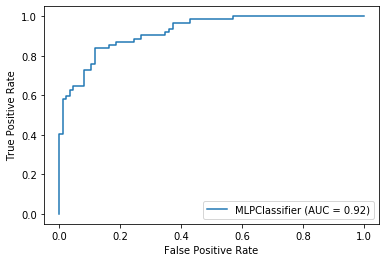

In [407]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(clf_5, xtest, ytest) 
plt.show()

In [404]:
internal_layer = 100
from sklearn.neural_network import MLPClassifier

for i in range(1,internal_layer):
    print("----------- i:",i)
    clf_5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(i,2),random_state=0,max_iter=10000)
    clf_5.fit(xtrain,ytrain)
    test(clf_5,xtest,ytest)

----------- i: 1
Confusion Matrix : 
[[128  39]
 [ 21 108]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 2
Confusion Matrix : 
[[125  42]
 [ 21 108]]

 Prediction Accuracy :  0.7871621621621622
------------------------
----------- i: 3
Confusion Matrix : 
[[136  31]
 [ 25 104]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 4
Confusion Matrix : 
[[137  30]
 [ 24 105]]

 Prediction Accuracy :  0.8175675675675675
------------------------
----------- i: 5
Confusion Matrix : 
[[137  30]
 [ 24 105]]

 Prediction Accuracy :  0.8175675675675675
------------------------
----------- i: 6
Confusion Matrix : 
[[137  30]
 [ 26 103]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 7
Confusion Matrix : 
[[144  23]
 [ 28 101]]

 Prediction Accuracy :  0.8277027027027027
------------------------
----------- i: 8
Confusion Matrix : 
[[142  25]
 [ 26 103]]

 Prediction Accuracy :  0.8277027027

Confusion Matrix : 
[[141  26]
 [ 25 104]]

 Prediction Accuracy :  0.8277027027027027
------------------------
----------- i: 65
Confusion Matrix : 
[[140  27]
 [ 25 104]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 66
Confusion Matrix : 
[[143  24]
 [ 28 101]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 67
Confusion Matrix : 
[[138  29]
 [ 24 105]]

 Prediction Accuracy :  0.8209459459459459
------------------------
----------- i: 68
Confusion Matrix : 
[[138  29]
 [ 24 105]]

 Prediction Accuracy :  0.8209459459459459
------------------------
----------- i: 69
Confusion Matrix : 
[[135  32]
 [ 26 103]]

 Prediction Accuracy :  0.8040540540540541
------------------------
----------- i: 70
Confusion Matrix : 
[[141  26]
 [ 28 101]]

 Prediction Accuracy :  0.8175675675675675
------------------------
----------- i: 71
Confusion Matrix : 
[[138  29]
 [ 25 104]]

 Prediction Accuracy :  0.8175675675675675
---

## NEXT 

#### Multiple classes

In [412]:
books_conf.groupby("helpfulness").describe()

_unit_id                                             \
                    count          mean            std           min   
helpfulness                                                            
helpful             818.0  2.905689e+09  123701.993296  2.905524e+09   
not_helpful         170.0  2.905686e+09  125020.057945  2.905524e+09   
somewhat_helpful    410.0  2.905687e+09  124592.898421  2.905524e+09   
unrelated            82.0  2.905707e+09  118164.562782  2.905524e+09   

                                                                          \
                           25%           50%           75%           max   
helpfulness                                                                
helpful           2.905524e+09  2.905774e+09  2.905788e+09  2.905789e+09   
not_helpful       2.905524e+09  2.905774e+09  2.905788e+09  2.905789e+09   
somewhat_helpful  2.905524e+09  2.905774e+09  2.905788e+09  2.905789e+09   
unrelated         2.905525e+09  2.905774e+09  2.905789e+09  2.905789e+09   

                 _trusted_judgments       ... confidence          no  \
                              count mean  ...        75%  max  count   
helpfulness                               ...                          
helpful                       818.0  3.0  ...     1.0000  1.0  818.0   
not_helpful                   170.0  3.0  ...     0.6804  1.0  170.0   
somewhat_helpful              410.0  3.0  ...     0.6735  1.0  410.0   
unrelated                      82.0  3.0  ...     0.6667  1.0   82.0   

                                                                        \
                          mean           std    min       25%      50%   
helpfulness                                                              
helpful           31966.860636  19249.769394    2.0  15476.00  30454.0   
not_helpful       33127.300000  18611.412259  250.0  17520.50  33595.5   
somewhat_helpful  34747.902439  18893.307124  355.0  18655.75  36539.5   
unrelated         37453.012195  19557.137107  220.0  18953.00  40609.5   

                                    
                      75%      max  
helpfulness                         
helpful           48184.0  65515.0  
not_helpful       49844.0  65523.0  
somewhat_helpful  50643.5  65498.0  
unrelated         54002.0  63941.0  

[4 rows x 32 columns]

In [432]:
classes_conf_4 = books_conf["helpfulness"]

In [415]:
#select best # of features

sel_k_4 = SelectKBest(chi2, k=20)
f_kbest_k_4 = sel_k.fit_transform(features_conf_st_sc, classes_conf_4)

####### Build the model 

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classes_conf_4)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes_4 = le.transform(classes_conf_4)
print("\nClasses converted to integers :", int_classes)

from sklearn.model_selection import train_test_split

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k_4, int_classes_4,random_state=1,test_size=0.1)

Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [1 1 0 ... 0 1 1]


In [416]:
clf_6 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,2),random_state=0,max_iter=10000)
clf_6.fit(xtrain,ytrain)
test(clf_6,xtest,ytest)

Confusion Matrix : 
[[76  0 10  0]
 [ 2  8  5  0]
 [10  7 23  0]
 [ 0  3  4  0]]

 Prediction Accuracy :  0.722972972972973
------------------------


(array([[76,  0, 10,  0],
        [ 2,  8,  5,  0],
        [10,  7, 23,  0],
        [ 0,  3,  4,  0]]),
 0.722972972972973)

In [429]:
ex_with_best_k(features_conf_st_sc,classes_conf_4,200)

k = ----------  1
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[158   0  60   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[158   0  60   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   0  30   0]
 [  6   0  35   0]
 [ 35   0  65   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6837837837837838
------------------------
k = ----------  4
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[152  15  49   2]
 [  5  21  14   1]
 [ 31  22  45   2]
 [  3   5   3   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Random Forest
Confusion Matrix : 
[[199   0  19   0]
 [  8   0  33   0]
 [ 42   0  58   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193   0  25   0]
 [  5   0  36   0]
 [ 37   0  63   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  7
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[155  12  45   6]
 [  7  12  20   2]
 [ 37  15  40   8]
 [  2   0   8   1]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   3  30   0]
 [  6  20  15   0]
 [ 31  14  55   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  10
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[159  11  46   2]
 [ 10   7  20   4]
 [ 38  19  33  10]
 [  2   2   6   1]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[187   0  31   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6891891891891891
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186   1  31   0]
 [  5  18  18   0]
 [ 33  14  53   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  12
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[216   0   2   0]
 [ 21   0  20   0]
 [ 81   0  19   0]
 [  6   0   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
Decision Tree
Confusion Matrix : 
[[167  10  37   4]
 [  9   6  21   5]
 [ 40  20  26  14]
 [  2   3   5   1]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182   2  34   0]
 [  5  18  18   0]
 [ 29  14  57   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  13
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[209   0   9   0]
 [ 13   0  28   0]
 [ 59   0  41   0]
 [  5   0   6   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[167   7  41   3]
 [  8  11  17   5]
 [ 32  20  36  12]
 [  2   3   6   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   1  34   0]
 [  5  12  24   0]
 [ 31   5  64   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  14
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Decision Tree
Confusion Matrix : 
[[164  15  36   3]
 [  7  12  18   4]
 [ 41  14  38   7]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191   1  26   0]
 [  7  15  19   0]
 [ 33   9  58   0]
 [  0   3   8   0]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  16
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[186   0  32   0]
 [  5   0  36   0]
 [ 32   0  68   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Decision Tree
Confusion Matrix : 
[[164   7  40   7]
 [ 10  11  16   4]
 [ 32  22  37   9]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[188   0  30   0]
 [  6   0  35   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6891891891891891
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187   2  29   0]
 [  7  19  15   0]
 [ 34  11  55   0]
 [  2   5   4   0]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  17
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[178   0  40   0]
 [  4   0  37   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Decision Tree
Confusion Matrix : 
[[171   7  36   4]
 [  5  12  15   9]
 [ 41  13  34  12]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5918918918918918
------------------------
Random Forest
Confusion Matrix : 
[[187   0  31   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   4  26   0]
 [  7  23  11   0]
 [ 31  16  53   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  3   0  38   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[168   9  39   2]
 [  5  12  15   9]
 [ 39  17  34  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[188   0  30   0]
 [  5   0  36   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191   2  25   0]
 [  4  21  16   0]
 [ 28  11  61   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[168  11  38   1]
 [  5  13  13  10]
 [ 36  15  37  12]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[186   0  32   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6864864864864865
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189   5  24   0]
 [  3  20  18   0]
 [ 28  15  57   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[163   0  55   0]
 [  3   0  38   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[160   8  49   1]
 [  6  12  13  10]
 [ 35  18  35  12]
 [  1   2   6   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 30   0  70   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   3  32   0]
 [  4  21  16   0]
 [ 25  19  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[164   0  54   0]
 [  2   0  39   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[156   9  50   3]
 [  5  10  18   8]
 [ 38  20  30  12]
 [  2   2   6   1]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[190   0  28   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   2  28   0]
 [  3  21  17   0]
 [ 29  15  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  29
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[157   2  57   2]
 [  4   8  21   8]
 [ 35  16  37  12]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7054054054054054
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193   5  20   0]
 [  4  20  17   0]
 [ 35  14  51   0]
 [  1   3   7   0]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  30
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[154   4  58   2]
 [  3   9  21   8]
 [ 34  16  39  11]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 30   0  70   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   1  29   0]
 [  6  19  16   0]
 [ 34  15  51   0]
 [  0   3   8   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[151   7  57   3]
 [  2  10  23   6]
 [ 33  17  39  11]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184   4  30   0]
 [  3  20  18   0]
 [ 31  23  46   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Decision Tree
Confusion Matrix : 
[[154  11  51   2]
 [  3  10  21   7]
 [ 41  19  32   8]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5297297297297298
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187   5  26   0]
 [  4  19  18   0]
 [ 29  19  52   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Decision Tree
Confusion Matrix : 
[[150   8  57   3]
 [  1  11  19  10]
 [ 41  19  32   8]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5243243243243243
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   3  30   0]
 [  4  22  15   0]
 [ 26  18  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  37
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[156   7  52   3]
 [  4  11  17   9]
 [ 42  19  30   9]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181   2  35   0]
 [  4  21  16   0]
 [ 25  16  59   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Decision Tree
Confusion Matrix : 
[[150   9  55   4]
 [  2  10  20   9]
 [ 42  20  28  10]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   2  33   0]
 [  2  22  17   0]
 [ 28  17  55   0]
 [  0   3   7   1]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[153   8  55   2]
 [  4  10  21   6]
 [ 37  19  33  11]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5297297297297298
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186   1  31   0]
 [  5  20  16   0]
 [ 22  14  64   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151   6  59   2]
 [  3  11  19   8]
 [ 34  20  34  12]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   5  28   0]
 [  6  20  15   0]
 [ 29  17  54   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  42
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[158   8  50   2]
 [  4  10  21   6]
 [ 41  17  29  13]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5351351351351351
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
NN
C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186   3  29   0]
 [  6  21  14   0]
 [ 31  13  56   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[162   5  49   2]
 [  1  12  21   7]
 [ 37  18  35  10]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   1  32   0]
 [  6  21  14   0]
 [ 25  14  61   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[166   5  45   2]
 [  1  13  20   7]
 [ 39  16  35  10]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180   3  35   0]
 [  5  18  18   0]
 [ 26  18  56   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  1  12  21   7]
 [ 37  18  37   8]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184   2  30   2]
 [  5  19  17   0]
 [ 26  12  58   4]
 [  0   4   6   1]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[160   4  50   4]
 [  3  13  19   6]
 [ 37  17  37   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   2  33   0]
 [  6  20  15   0]
 [ 24  20  56   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[160   5  50   3]
 [  5  12  16   8]
 [ 37  17  37   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   3  40   0]
 [  6  19  16   0]
 [ 23  19  58   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155   4  53   6]
 [  4  13  18   6]
 [ 37  18  35  10]
 [  2   5   4   0]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   4  36   0]
 [  5  15  21   0]
 [ 27  12  61   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  56
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  49   4]
 [  4  12  19   6]
 [ 35  17  38  10]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   4  37   0]
 [  5  21  15   0]
 [ 25  17  58   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  57
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[161   4  50   3]
 [  2  14  18   7]
 [ 40  16  34  10]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180   2  36   0]
 [  6  20  15   0]
 [ 27  16  57   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  59
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[164   3  49   2]
 [  2  12  19   8]
 [ 38  17  35  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  9   0  32   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   1  44   0]
 [  6  19  16   0]
 [ 27  13  60   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[160   6  50   2]
 [  4  13  17   7]
 [ 37  18  35  10]
 [  2   5   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   3  41   0]
 [  4  18  19   0]
 [ 29  14  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[165   4  47   2]
 [  3  12  19   7]
 [ 37  19  35   9]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182   2  34   0]
 [  3  21  17   0]
 [ 31  15  54   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[154   6  52   6]
 [  5  13  16   7]
 [ 38  16  37   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   1  38   0]
 [  3  17  21   0]
 [ 28  12  60   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[162   8  46   2]
 [  4  10  21   6]
 [ 39  14  35  12]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   3  42   0]
 [  4  17  20   0]
 [ 28  18  54   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  4  10  21   6]
 [ 37  15  39   9]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   2  38   0]
 [  4  20  17   0]
 [ 26  23  51   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[157   4  54   3]
 [  3  12  20   6]
 [ 37  16  38   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   6  33   0]
 [  5  19  17   0]
 [ 30  20  50   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[161   5  50   2]
 [  4  12  18   7]
 [ 37  15  37  11]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   2  39   0]
 [  4  18  19   0]
 [ 31  18  51   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[166   7  43   2]
 [  5  12  19   5]
 [ 35  21  32  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181   2  35   0]
 [  5  21  15   0]
 [ 27  20  53   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6891891891891891
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[164   5  47   2]
 [  4   9  20   8]
 [ 35  18  36  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   3  44   0]
 [  4  13  24   0]
 [ 27  16  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[163   7  46   2]
 [  4  13  17   7]
 [ 37  15  37  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   3  36   0]
 [  5  18  18   0]
 [ 26  15  59   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[166   7  43   2]
 [  2  12  20   7]
 [ 37  19  35   9]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   2  41   0]
 [  4  21  16   0]
 [ 28  19  53   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[159   7  49   3]
 [  2  12  21   6]
 [ 32  18  39  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   5  35   0]
 [  1  21  19   0]
 [ 30  18  52   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6783783783783783
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[162   8  45   3]
 [  4   8  21   8]
 [ 36  18  33  13]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170   7  41   0]
 [  4  19  18   0]
 [ 24  16  60   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[154  10  50   4]
 [  1  14  19   7]
 [ 32  19  35  14]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   1  46   0]
 [  3  20  18   0]
 [ 29  15  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[161   8  46   3]
 [  0  13  21   7]
 [ 34  20  36  10]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   2  41   0]
 [  4  20  17   0]
 [ 30  15  55   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[168   6  41   3]
 [  3  10  20   8]
 [ 39  16  34  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   5  42   0]
 [  4  21  16   0]
 [ 27  17  56   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[166   8  41   3]
 [  3  14  18   6]
 [ 37  19  33  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   8  45   0]
 [  5  23  13   0]
 [ 28  20  52   0]
 [  0   7   4   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[216   0   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[153   8  52   5]
 [  5  12  18   6]
 [ 36  19  35  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   5  36   0]
 [  4  20  17   0]
 [ 32  17  51   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[162   7  45   4]
 [  2  10  21   8]
 [ 35  19  35  11]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172   5  41   0]
 [  4  20  17   0]
 [ 28  17  55   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[166   8  41   3]
 [  3  12  18   8]
 [ 38  17  33  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   4  40   0]
 [  4  20  17   0]
 [ 25  16  59   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6837837837837838
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[157   6  52   3]
 [  2   9  21   9]
 [ 37  19  34  10]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   7  47   0]
 [  5  19  17   0]
 [ 28  17  55   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6432432432432432
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[164   6  45   3]
 [  4  13  19   5]
 [ 36  20  32  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176   4  38   0]
 [  4  19  18   0]
 [ 32  19  49   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[159   8  47   4]
 [  1  13  22   5]
 [ 33  18  39  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  8   0  33   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189   1  28   0]
 [  5  22  14   0]
 [ 31  21  47   1]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   1   3   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[159   7  49   3]
 [  4  11  19   7]
 [ 37  19  32  12]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[190   0  28   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168   3  47   0]
 [  4  21  16   0]
 [ 28  15  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[155   6  52   5]
 [  4  10  21   6]
 [ 34  19  37  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  6   0  35   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   2  43   0]
 [  4  21  16   0]
 [ 30  25  45   0]
 [  1   8   2   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[161   9  45   3]
 [  2  10  23   6]
 [ 32  18  40  10]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   8  36   0]
 [  3  17  21   0]
 [ 28  15  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   4   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[161   5  49   3]
 [  2  10  21   8]
 [ 34  18  36  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   8  33   0]
 [  4  20  17   0]
 [ 29  19  52   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   4   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[154   7  54   3]
 [  3  13  19   6]
 [ 30  21  38  11]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN
C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   3  42   0]
 [  4  20  17   0]
 [ 28  20  52   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   3   1]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[173   0  45   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[161   6  48   3]
 [  3  12  20   6]
 [ 37  18  33  12]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7081081081081081
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   1  42   0]
 [  4  22  15   0]
 [ 27  20  53   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   4   1]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[166   7  43   2]
 [  4  10  21   6]
 [ 33  19  37  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   2  37   0]
 [  4  21  16   0]
 [ 33  22  45   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   4   1]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[163  10  43   2]
 [  3  13  20   5]
 [ 30  21  39  10]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   5  34   0]
 [  5  16  20   0]
 [ 27  16  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   4   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[160  11  46   1]
 [  6  15  17   3]
 [ 35  24  35   6]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   4  43   0]
 [  3  21  17   0]
 [ 31  16  53   0]
 [  0   7   4   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
k = ----------  100
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[161   9  46   2]
 [  5  12  20   4]
 [ 32  21  40   7]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   9  45   0]
 [  1  19  21   0]
 [ 25  23  52   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
k = ----------  102
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   5   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[160   8  47   3]
 [  3  10  21   7]
 [ 34  21  37   8]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   3  44   0]
 [  2  17  22   0]
 [ 31  17  52   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  103
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   5   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[163   9  43   3]
 [  5  11  18   7]
 [ 32  20  37  11]
 [  2   4   4   1]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167   7  44   0]
 [  4  21  16   0]
 [ 30  30  39   1]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6135135135135135
------------------------
k = ----------  105
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   0   9   0]
 [ 39   0   2   0]
 [ 96   0   4   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   7  50   2]
 [  1  11  20   9]
 [ 34  18  38  10]
 [  1   5   3   2]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176   4  38   0]
 [  4  21  16   0]
 [ 29  17  54   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6783783783783783
------------------------
k = ----------  106
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 39   0   2   0]
 [ 96   0   4   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[157   9  49   3]
 [  2  11  19   9]
 [ 35  21  34  10]
 [  0   6   4   1]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   6  39   0]
 [  3  21  17   0]
 [ 29  22  49   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  107
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[211   0   7   0]
 [ 39   0   2   0]
 [ 96   0   4   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   5  51   3]
 [  0  10  22   9]
 [ 35  19  37   9]
 [  2   4   3   2]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   5  42   0]
 [  4  23  13   1]
 [ 24  21  55   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  109
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 39   0   2   0]
 [ 95   0   4   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[148   7  60   3]
 [  2   9  21   9]
 [ 34  18  40   8]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5351351351351351
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   6  34   0]
 [  3  21  17   0]
 [ 30  26  44   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  110
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   0   9   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 23   0  77   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[162  11  43   2]
 [  2  10  20   9]
 [ 34  24  33   9]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  13  41   0]
 [  6  19  16   0]
 [ 23  23  54   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  111
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   0   9   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 23   0  77   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[157  11  46   4]
 [  4  10  18   9]
 [ 33  20  40   7]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   6  47   0]
 [  6  21  14   0]
 [ 27  15  58   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
k = ----------  112
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[161   5  48   4]
 [  2  12  19   8]
 [ 36  23  36   5]
 [  0   6   4   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7081081081081081
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160   5  53   0]
 [  4  20  17   0]
 [ 29  29  42   0]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  113
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[151   8  52   7]
 [  1  12  20   8]
 [ 34  21  39   6]
 [  0   4   4   3]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   6  41   0]
 [  4  14  22   1]
 [ 25  18  55   2]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  114
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[155   6  53   4]
 [  3  10  20   8]
 [ 34  19  41   6]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7054054054054054
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  13  43   0]
 [  5  20  16   0]
 [ 31  22  47   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  116
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   1   7   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   0  39   0]
 [ 21   0  79   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[148   6  57   7]
 [  1  12  20   8]
 [ 33  18  41   8]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167   3  46   2]
 [  4  14  20   3]
 [ 28  18  49   5]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6216216216216216
------------------------
k = ----------  120
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   1   7   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  2   0  39   0]
 [ 23   0  77   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  2  13  18   8]
 [ 37  15  38  10]
 [  1   7   2   1]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  14  38   0]
 [  4  15  22   0]
 [ 27  18  55   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6378378378378379
------------------------
k = ----------  122
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[208   2   7   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[155   7  53   3]
 [  1  12  21   7]
 [ 35  18  38   9]
 [  1   7   2   1]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176   3  38   1]
 [  4  19  18   0]
 [ 30  19  51   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
k = ----------  123
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[208   2   7   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[160   9  46   3]
 [  0  14  19   8]
 [ 37  15  39   9]
 [  0   4   3   4]]

 Prediction Accuracy :  0.5864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170   5  43   0]
 [  4  20  17   0]
 [ 30  20  50   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  124
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[207   2   8   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[165   4  45   4]
 [  1  11  21   8]
 [ 33  15  41  11]
 [  0   5   3   3]]

 Prediction Accuracy :  0.5945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   8  37   0]
 [  8  12  21   0]
 [ 29  23  48   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6297297297297297
------------------------
k = ----------  125
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[206   3   8   1]
 [ 37   1   3   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  5   9  17  10]
 [ 30  20  42   8]
 [  1   5   2   3]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   6  41   0]
 [  5  16  16   4]
 [ 31  20  48   1]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
k = ----------  126
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[206   2   8   2]
 [ 37   1   3   0]
 [ 90   0   9   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  2   0  39   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151   7  54   6]
 [  7  11  16   7]
 [ 34  24  35   7]
 [  2   5   1   3]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169   5  44   0]
 [  7  17  17   0]
 [ 25  19  56   0]
 [  2   3   6   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
k = ----------  127
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[205   2   9   2]
 [ 37   1   3   0]
 [ 89   0  10   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[160   7  48   3]
 [  4  12  18   7]
 [ 37  15  42   6]
 [  1   2   3   5]]

 Prediction Accuracy :  0.5918918918918918
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   8  45   0]
 [  6  15  20   0]
 [ 33  18  49   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  128
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[205   1  10   2]
 [ 38   1   2   0]
 [ 89   0  10   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[157   8  48   5]
 [  2  17  15   7]
 [ 30  16  46   8]
 [  0   2   4   5]]

 Prediction Accuracy :  0.6081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  6   0  35   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  15  42   0]
 [  6  18  17   0]
 [ 25  19  56   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
k = ----------  129
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[204   1  11   2]
 [ 37   1   3   0]
 [ 89   0  10   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[165   8  42   3]
 [  6  11  17   7]
 [ 29  17  48   6]
 [  1   2   3   5]]

 Prediction Accuracy :  0.6189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6891891891891891
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169   7  42   0]
 [  6  19  16   0]
 [ 24  24  52   0]
 [  2   4   5   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  130
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[205   1  10   2]
 [ 38   1   2   0]
 [ 90   0   9   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[157  11  47   3]
 [  6  12  17   6]
 [ 34  17  43   6]
 [  1   4   3   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [ 10   0  31   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   1  42   1]
 [  8  16  15   2]
 [ 34  13  47   6]
 [  0   5   5   1]]

 Prediction Accuracy :  0.6432432432432432
------------------------
k = ----------  131
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[204   1  11   2]
 [ 38   1   2   0]
 [ 88   0  11   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   0  39   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[157  12  45   4]
 [  4  13  17   7]
 [ 28  19  46   7]
 [  1   5   3   2]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [ 10   0  31   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  13  36   0]
 [  5  20  16   0]
 [ 26  20  54   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  133
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[203   1  12   2]
 [ 38   1   2   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[149  10  50   9]
 [  4  12  18   7]
 [ 32  14  45   9]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156   2  57   3]
 [  9  16  13   3]
 [ 30  17  49   4]
 [  1   4   4   2]]

 Prediction Accuracy :  0.6027027027027027
------------------------
k = ----------  134
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[203   1  12   2]
 [ 38   1   2   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[151   6  55   6]
 [  2  13  19   7]
 [ 32  14  46   8]
 [  0   4   5   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  11  38   0]
 [  4  17  20   0]
 [ 26  19  55   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
k = ----------  135
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[202   1  13   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[158   8  45   7]
 [  3  14  17   7]
 [ 32  18  42   8]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  10  28   2]
 [  5  16  14   6]
 [ 36  17  43   4]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  136
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  14   1]
 [ 38   2   1   0]
 [ 88   0  11   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[154   8  47   9]
 [  4  12  19   6]
 [ 32  15  46   7]
 [  0   3   5   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[197   0  21   0]
 [  9   0  32   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   7  30   2]
 [  9  12  20   0]
 [ 35  21  42   2]
 [  1   4   5   1]]

 Prediction Accuracy :  0.6324324324324324
------------------------
k = ----------  139
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  14   1]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155  10  48   5]
 [  5  11  20   5]
 [ 29  22  44   5]
 [  1   4   4   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[198   0  20   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  14  43   0]
 [  5  21  15   0]
 [ 30  18  52   0]
 [  0   9   2   0]]

 Prediction Accuracy :  0.6324324324324324
------------------------
k = ----------  140
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  14   1]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[159   9  43   7]
 [  4  14  14   9]
 [ 32  16  46   6]
 [  0   5   4   2]]

 Prediction Accuracy :  0.5972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  12  37   0]
 [  7  12  22   0]
 [ 32  13  55   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.6378378378378379
------------------------
k = ----------  141
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  13   2]
 [ 38   1   1   1]
 [ 87   1  12   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[150   9  54   5]
 [  3  15  15   8]
 [ 29  17  47   7]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   6  46   2]
 [  5  15  11  10]
 [ 32  23  41   4]
 [  1   3   3   4]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  142
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  13   2]
 [ 38   1   1   1]
 [ 87   1  12   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[156   7  51   4]
 [  3  12  14  12]
 [ 32  15  44   9]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  12  38   0]
 [  5  18  18   0]
 [ 29  28  43   0]
 [  2   4   5   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  143
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[198   2  16   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[151  10  54   3]
 [  3  12  18   8]
 [ 29  20  43   8]
 [  0   5   4   2]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  13  44   0]
 [  4  15  22   0]
 [ 24  21  55   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.6243243243243243
------------------------
k = ----------  144
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[198   2  16   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  4   0  37   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[153   7  51   7]
 [  5  15  13   8]
 [ 32  18  43   7]
 [  1   5   3   2]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  10  47   1]
 [  8  15  18   0]
 [ 33  18  49   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  145
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[198   2  16   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  4   0  37   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[152   9  49   8]
 [  4  15  15   7]
 [ 32  20  39   9]
 [  0   3   5   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  16  33   0]
 [  9  17  15   0]
 [ 30  24  46   0]
 [  0   8   3   0]]

 Prediction Accuracy :  0.6270270270270271
------------------------
k = ----------  146
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[197   2  17   2]
 [ 38   2   1   0]
 [ 86   0  13   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[153   9  50   6]
 [  7  15  13   6]
 [ 31  14  43  12]
 [  1   4   3   3]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  11  31   2]
 [  6  18  14   3]
 [ 29  22  43   6]
 [  2   6   1   2]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  147
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[197   2  17   2]
 [ 38   2   1   0]
 [ 85   0  14   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[156   8  49   5]
 [  6  13  16   6]
 [ 29  20  41  10]
 [  0   4   5   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  12  43   0]
 [  5  15  21   0]
 [ 29  30  41   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.5918918918918918
------------------------
k = ----------  148
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[196   2  18   2]
 [ 38   2   1   0]
 [ 85   0  14   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[157  10  46   5]
 [  8  14  12   7]
 [ 34  17  36  13]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160   8  47   3]
 [  7  18  12   4]
 [ 37  20  40   3]
 [  2   5   2   2]]

 Prediction Accuracy :  0.5945945945945946
------------------------
k = ----------  150
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[195   2  19   2]
 [ 37   2   2   0]
 [ 84   2  13   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  3   0  38   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[152   8  53   5]
 [  5  17  12   7]
 [ 34  19  37  10]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  10  45   0]
 [  7  24  10   0]
 [ 33  30  37   0]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  151
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[194   2  20   2]
 [ 37   2   2   0]
 [ 83   2  14   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[154   7  48   9]
 [  6  16  12   7]
 [ 30  16  42  12]
 [  1   3   4   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  14  40   0]
 [  6  17  18   0]
 [ 24  25  51   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6270270270270271
------------------------
k = ----------  152
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   2  25   1]
 [ 35   2   4   0]
 [ 81   2  16   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[153   7  50   8]
 [  4  16  13   8]
 [ 35  17  37  11]
 [  1   3   3   4]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  22  34   0]
 [  6  14  21   0]
 [ 29  20  51   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6135135135135135
------------------------
k = ----------  153
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   2  25   1]
 [ 35   2   4   0]
 [ 81   2  16   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  47   6]
 [  5  14  14   8]
 [ 36  16  37  11]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   4  49   1]
 [  8  13  13   7]
 [ 37  15  37  11]
 [  3   1   4   3]]

 Prediction Accuracy :  0.5864864864864865
------------------------
k = ----------  154
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 34   2   5   0]
 [ 80   2  17   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155  11  50   2]
 [  5  14  14   8]
 [ 35  19  33  13]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  15  33   0]
 [  6  20  15   0]
 [ 37  30  33   0]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6027027027027027
------------------------
k = ----------  158
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   3  24   1]
 [ 34   2   5   0]
 [ 80   2  17   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[162   8  44   4]
 [  4  13  15   9]
 [ 31  17  38  14]
 [  0   3   5   3]]

 Prediction Accuracy :  0.5837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182   8  26   2]
 [  5  20  15   1]
 [ 32  19  48   1]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  159
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   3  24   1]
 [ 34   2   5   0]
 [ 80   2  17   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[158   8  44   8]
 [  4  15  15   7]
 [ 36  22  32  10]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  17  38   0]
 [  8  17  16   0]
 [ 33  25  42   0]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  160
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   3  24   1]
 [ 34   2   5   0]
 [ 79   2  18   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[153   7  56   2]
 [  5  13  12  11]
 [ 35  17  38  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  10  46   6]
 [  8  18  11   4]
 [ 36  18  42   4]
 [  2   5   4   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
k = ----------  161
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   3  23   1]
 [ 34   2   5   0]
 [ 79   1  19   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[161   8  46   3]
 [  5  14  13   9]
 [ 34  16  38  12]
 [  0   3   6   2]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  19  33   0]
 [  8  17  16   0]
 [ 34  20  46   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  162
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   3  23   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  9   0   2   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[165   8  41   4]
 [  3  15  16   7]
 [ 34  24  31  11]
 [  0   3   5   3]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  28  30   0]
 [  9  19  13   0]
 [ 36  26  38   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
k = ----------  163
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 33   2   6   0]
 [ 79   2  19   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[155   8  51   4]
 [  3  13  15  10]
 [ 35  19  35  11]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  10  50   6]
 [  5  11  20   5]
 [ 36  20  36   8]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5405405405405406
------------------------
k = ----------  164
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[157   7  49   5]
 [  5  14  14   8]
 [ 36  17  36  11]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  23  30   0]
 [  5  28   8   0]
 [ 34  39  27   0]
 [  1   8   2   0]]

 Prediction Accuracy :  0.5945945945945946
------------------------
k = ----------  165
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[157   6  49   6]
 [  5  15  13   8]
 [ 36  19  35  10]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  12  30   0]
 [  9  14  18   0]
 [ 40  18  42   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6270270270270271
------------------------
k = ----------  167
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[156   6  49   7]
 [  4  14  14   9]
 [ 31  22  34  13]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6837837837837838
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  11  42   3]
 [  6  21  13   1]
 [ 36  22  41   1]
 [  3   2   6   0]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  168
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   8  43   8]
 [  5  17  12   7]
 [ 36  17  37  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  14  42   0]
 [  9  18  14   0]
 [ 37  34  29   0]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
k = ----------  169
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[186   2  29   1]
 [ 33   2   6   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[162   6  43   7]
 [  5  13  13  10]
 [ 37  18  37   8]
 [  1   3   4   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  10  46   4]
 [  7  16  11   7]
 [ 37  28  32   3]
 [  1   7   3   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
k = ----------  170
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  4   0  37   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[144  12  58   4]
 [  5  14  14   8]
 [ 38  21  29  12]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5135135135135135
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  18  29   0]
 [  5  17  19   0]
 [ 31  28  41   0]
 [  4   3   4   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  171
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  4   0  37   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[159  10  45   4]
 [  6  15  12   8]
 [ 35  18  37  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  15  35   0]
 [  7  21  13   0]
 [ 33  23  44   0]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6297297297297297
------------------------
k = ----------  172
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   3  26   2]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[163  10  41   4]
 [  4  14  15   8]
 [ 33  20  36  11]
 [  1   3   5   2]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[197   0  21   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  22  33   0]
 [  7  22  12   0]
 [ 34  29  37   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  173
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 77   2  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[167   0  50   1]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[153  10  51   4]
 [  6  13  14   8]
 [ 36  19  36   9]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  14  30  11]
 [  9  17  14   1]
 [ 44  27  23   6]
 [  3   3   4   1]]

 Prediction Accuracy :  0.5513513513513514
------------------------
k = ----------  174
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[169   0  48   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151   9  52   6]
 [  5  13  15   8]
 [ 38  20  31  11]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5351351351351351
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  14  41   0]
 [  6  22  13   0]
 [ 32  20  48   0]
 [  1   3   7   0]]

 Prediction Accuracy :  0.6297297297297297
------------------------
k = ----------  175
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[152   8  52   6]
 [  6  13  13   9]
 [ 35  19  36  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166   8  41   3]
 [  8  19  13   1]
 [ 36  20  37   7]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  176
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[160   7  47   4]
 [  3  14  14  10]
 [ 35  18  34  13]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161   8  45   4]
 [  6  15  13   7]
 [ 34  23  38   5]
 [  3   6   2   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
k = ----------  178
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[186   3  27   2]
 [ 34   2   5   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[166   0  51   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[150   9  49  10]
 [  5  13  14   9]
 [ 32  17  37  14]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   7  40   7]
 [  7  12  17   5]
 [ 38  22  31   9]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
k = ----------  179
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 78   1  21   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[166   0  51   1]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[152  10  49   7]
 [  5  11  14  11]
 [ 35  17  35  13]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  11  23   7]
 [  6  15  14   6]
 [ 38  20  36   6]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6162162162162163
------------------------
k = ----------  181
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 33   2   6   0]
 [ 77   1  22   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[167   0  50   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[152   9  52   5]
 [  6  11  14  10]
 [ 36  20  33  11]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   3  41   9]
 [  6  14  17   4]
 [ 40  15  39   6]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5972972972972973
------------------------
k = ----------  182
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 33   2   6   0]
 [ 77   1  22   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[170   0  47   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[155   6  52   5]
 [  5  13  13  10]
 [ 33  23  33  11]
 [  1   2   4   4]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  25  30   0]
 [  6  26   9   0]
 [ 37  33  30   0]
 [  0   8   3   0]]

 Prediction Accuracy :  0.5918918918918918
------------------------
k = ----------  184
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 33   2   6   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[170   0  47   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[151   8  52   7]
 [  3  12  14  12]
 [ 32  20  37  11]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  25  36   0]
 [  7  25   9   0]
 [ 40  27  33   0]
 [  2   7   2   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
k = ----------  186
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   4  30   2]
 [ 33   2   6   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[169   0  48   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[151  11  53   3]
 [  4  12  16   9]
 [ 32  17  38  13]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  13  47   0]
 [  6  27   8   0]
 [ 36  31  33   0]
 [  2   7   2   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  187
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   3  31   2]
 [ 33   2   6   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[170   0  47   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[154   7  49   8]
 [  5  13  14   9]
 [ 35  17  35  13]
 [  1   2   4   4]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  17  19   0]
 [  8  24   9   0]
 [ 43  25  31   1]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  188
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[171   0  46   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[150   6  56   6]
 [  4  12  15  10]
 [ 38  15  31  16]
 [  0   4   4   3]]

 Prediction Accuracy :  0.5297297297297298
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  12  46   2]
 [  8  16  13   4]
 [ 35  22  35   8]
 [  2   6   2   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
k = ----------  189
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[169   1  47   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[148  11  55   4]
 [  5  14  12  10]
 [ 35  18  34  13]
 [  1   2   4   4]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  13  40   4]
 [  6  16  13   6]
 [ 44  16  33   7]
 [  2   3   4   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
k = ----------  191
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[183   4  29   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[171   0  46   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[145  10  59   4]
 [  3  11  15  12]
 [ 35  18  35  12]
 [  2   2   5   2]]

 Prediction Accuracy :  0.5216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [ 10   0  31   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  10  43   9]
 [  5  11  21   4]
 [ 33  17  42   8]
 [  1   4   6   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
k = ----------  192
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   4  28   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[171   0  46   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[145   8  58   7]
 [  7   9  11  14]
 [ 36  19  34  11]
 [  2   2   4   3]]

 Prediction Accuracy :  0.5162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  19  43   5]
 [ 13  11  13   4]
 [ 37  17  38   8]
 [  3   2   5   1]]

 Prediction Accuracy :  0.5432432432432432
------------------------
k = ----------  194
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   4  30   2]
 [ 32   2   7   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   1  38   0]
 [ 30   0  70   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[145   9  62   2]
 [  5  11  13  12]
 [ 35  15  37  13]
 [  2   2   5   2]]

 Prediction Accuracy :  0.527027027027027
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  19  16   2]
 [  9  15  16   1]
 [ 43  18  35   4]
 [  2   3   6   0]]

 Prediction Accuracy :  0.6243243243243243
------------------------
k = ----------  197
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[181   3  32   2]
 [ 32   2   7   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  2   1  38   0]
 [ 28   0  72   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[148   9  57   4]
 [  9   9  11  12]
 [ 32  16  39  13]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5378378378378378
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  13  19   2]
 [ 11  16  10   4]
 [ 46  25  26   3]
 [  3   5   2   1]]

 Prediction Accuracy :  0.6135135135135135
------------------------
k = ----------  198
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   3  31   2]
 [ 32   2   7   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   1  38   0]
 [ 28   0  72   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[150  10  55   3]
 [  5  12  13  11]
 [ 34  16  40  10]
 [  0   1   7   3]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[197   0  21   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162   9  44   3]
 [  5  15  15   6]
 [ 34  18  43   5]
 [  2   2   2   5]]

 Prediction Accuracy :  0.6081081081081081
------------------------
k = ----------  199
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   3  31   2]
 [ 31   2   8   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  2   1  38   0]
 [ 28   0  72   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[146  10  57   5]
 [  7  12  11  11]
 [ 33  14  40  13]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
------------

In [472]:
#Split as training and testing sets
sel_k_4 = SelectKBest(chi2, k=20)
f_kbest_k_4 = sel_k_4.fit_transform(features_conf_st_sc, classes_conf_4)

xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k_4, int_classes_4,random_state=1,test_size=0.1)

clf_7 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,2),random_state=0,max_iter=10000)

clf_7.fit(xtrain,ytrain)
test(clf_7,xtest,ytest)

Confusion Matrix : 
[[76  0 10  0]
 [ 2  8  5  0]
 [10  7 23  0]
 [ 0  3  4  0]]

 Prediction Accuracy :  0.722972972972973
------------------------


(array([[76,  0, 10,  0],
        [ 2,  8,  5,  0],
        [10,  7, 23,  0],
        [ 0,  3,  4,  0]]),
 0.722972972972973)

## Combine helpful with somewhat helpful

low precision for not_helpful

In [431]:
classes_conf_2 = books_conf["helpfulness"].map(lambda x: "helpful" if x == "somewhat_helpful" or x == "helpful" else "not_helpful")

In [435]:
#select best # of features

sel_k = SelectKBest(chi2, k=20)
f_kbest_k = sel_k.fit_transform(features_conf_st_sc, classes_conf_2)

####### Build the model 

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classes_conf_2)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes = le.transform(classes_conf_2)
print("\nClasses converted to integers :", int_classes)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 1 0 ... 0 0 0]


In [461]:
#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1,test_size=0.3)

#run
clf_8 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,16),random_state=0,max_iter=10000)
clf_8.fit(xtrain,ytrain)
test(clf_8,xtest,ytest)

Confusion Matrix : 
[[350  24]
 [ 32  38]]

 Prediction Accuracy :  0.8738738738738738
------------------------


(array([[350,  24],
        [ 32,  38]]),
 0.8738738738738738)

# Remove somewhat_helpful

In [473]:
sw_h_i = books_data[books_data["helpfulness"] == "somewhat_helpful"].index
books_conf_3 = books_conf.drop(index=sw_h_i)

In [474]:
books_conf_3

_unit_id  _golden _unit_state  _trusted_judgments   _last_judgment_at  \
2     2905523770    False   finalized                   3  12/23/2020 7:25:58   
3     2905523771    False   finalized                   3  12/23/2020 7:25:58   
4     2905523772    False   finalized                   3  12/23/2020 7:54:33   
6     2905523774    False   finalized                   3  12/23/2020 7:54:33   
7     2905523775    False   finalized                   3  12/23/2020 7:54:33   
...          ...      ...         ...                 ...                 ...   
2380  2905788844    False   finalized                   3   1/5/2021 11:34:19   
2384  2905788848    False   finalized                   3   1/5/2021 11:37:35   
2389  2905788853    False   finalized                   3   1/5/2021 11:38:43   
2397  2905788861    False   finalized                   3  1/14/2021 11:25:41   
2400  2905788864    False   finalized                   3  1/15/2021 20:40:11   

      helpfulness  confidence     no  \
2       unrelated      0.6598  48057   
3         helpful      1.0000  14611   
4         helpful      1.0000  17368   
6         helpful      1.0000  64488   
7         helpful      1.0000   2388   
...           ...         ...    ...   
2380    unrelated      0.6598  48736   
2384  not_helpful      0.6598  26832   
2389      helpful      1.0000  49778   
2397  not_helpful      0.3538   1605   
2400      helpful      1.0000   9741   

                                                 review  \
2                                                 سأعود   
3     لم أكن قد قرأتُ لأحلام ثلاثيتها الشهيرة، ولم أ...   
4     تسحرني لغتها وقلمها. تمنيت أن صفحات الكتاب لا ...   
6     ايه العظمه دي بصراحه. روايه تحفه شموليه بتتكلم...   
7     رواية رائعة .. كنت مقتنعا أن الرواية فعلا مترج...   
...                                                 ...   
2380  تأملتها برهة عن قرب... ثم وقفت وأعدت تأملها من...   
2384  عند كل لحظة ألم نشعر أنها أقصى لحظات الألم في ...   
2389  جميله جداً .. بل إنها من أول القصص التي قرأتها...   
2397  أحببتها.... رواية تصف الكثير مما يحدث باختلاف ...   
2400  الفيل الازرق رواية شيقة وممتعة جذبتني لانهائها...   

                                              review_en  
2                                        I'll come back  
3     I had not read the dreams of the famous Thelat...  
4     Language fascinates me and her pen. I wished t...  
6     A Greatness de frankly. Novel masterpiece comp...  
7     Wonderful novel .. I was convinced that the no...  
...                                                 ...  
2380  Tommeltha briefly close ... and then stood up ...  
2384  At every moment we feel pain the maximum momen...  
2389  Very beautiful .. but it is one of the first s...  
2397  .... I loved her novel describes a lot of what...  
2400  Blue Elephant novel interesting and fun attrac...  

[1070 rows x 10 columns]

In [481]:
features_conf_st_3 = features_conf_st.reindex(books_conf_3.index)

In [484]:
features_conf_st_3_sc = preprocessing.MinMaxScaler().fit_transform(features_conf_st_3)

In [475]:
classes_conf_3 = books_conf_3["helpfulness"]

In [489]:
ex_with_best_k(features_conf_st_3_sc,classes_conf_3,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful' 'unrelated']

Classes converted to integers : [2 0 0 ... 0 1 0]
NB
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
SVM
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
Decision Tree
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
Random Forest
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
NN
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful' 'unrelated']

Classes conver

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Hotels 

In [ ]:
hotels_data = pd.read_csv("")

#### Other feature selection methods

# Best result for balanced data (half/half) 0.8338

random forest 
combined (helpful/not_help)
features : liwc, inq, extracted aspects
k = 74

## optimizing

1. extracted aspects stemming 
2. extracted aspects scale features
3. add more features 

# Helping & imports (Run first)

In [488]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import re
from collections import Counter
import liwc
import math
import json
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


def extract_classify_test(features,classes,kf=0):
    
    f_kbest_k = features
    
    if kf != 0:
        sel_k = SelectKBest(chi2, k=kf)
        f_kbest_k = sel_k.fit_transform(features, classes)
    
    ####### Build the model 
    
    #Create Labels and integer classes
    from sklearn import preprocessing

    le = preprocessing.LabelEncoder()
    le.fit(classes)
    print("Classes found : ", le.classes_)

    #Convert classes to integers for use with ML
    int_classes = le.transform(classes)
    print("\nClasses converted to integers :", int_classes)

    from sklearn.model_selection import train_test_split

    #Split as training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1)
    
    
    ####### Classify & Test
    
    cm_acc = {"NB":(),"SVM":(),"DT":(),"RF":(),"NN":()}
    
    from sklearn.naive_bayes import MultinomialNB
    classifier_1 = MultinomialNB().fit(xtrain, ytrain)
    print("NB")
    cm_acc["NB"] = test(classifier_1,xtest,ytest)

    from sklearn import svm
    classifier_2 = svm.SVC(kernel='linear').fit(xtrain, ytrain)
    print("SVM")
    cm_acc["SVM"] = test(classifier_2,xtest,ytest)

    from sklearn import tree
    clf_3 = tree.DecisionTreeClassifier().fit(xtrain, ytrain)
    print("Decision Tree")
    cm_acc["DT"] = test(clf_3,xtest,ytest)

    from sklearn.ensemble import RandomForestClassifier

    clf_4 = RandomForestClassifier(max_depth=2, random_state=0).fit(xtrain,ytrain)
    print("Random Forest")
    cm_acc["RF"] = test(clf_4,xtest,ytest)

    from sklearn.neural_network import MLPClassifier
    clf_5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 2), random_state=0).fit(xtrain,ytrain)
    print("NN")
    cm_acc["NN"] = test(clf_5,xtest,ytest)
    
    return cm_acc
    
def replace(x):
    if x != "helpful":
        return "not_helpful"
    else:
        return "helpful"

def test(clf,xtest,ytest):
    from sklearn import metrics
    #Predict on test data
    predictions=clf.predict(xtest)
    
    print("Confusion Matrix : ")
    cm = metrics.confusion_matrix(ytest, predictions)
    print(cm)
    
    accuracy = metrics.accuracy_score(ytest, predictions)
    print("\n Prediction Accuracy : ",  \
           accuracy)
    
    if predictions.sum() != 0:
        precision = metrics.precision_score(ytest , predictions)
    else:dsd
        precision = 0.0
    print("Precision:",precision)
    
    print("------------------------")
    
    
    return(cm,accuracy,precision)
    
####### Features methods 


def extract_tfidf(reviews):
        
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords

    #setup wordnet for lemmatization
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    from sklearn.feature_extraction.text import TfidfVectorizer

    #Custom tokenizer that will perform tokenization, stopword removal
    #and lemmatization
    def customtokenize(str):
        tokens=nltk.word_tokenize(str)

        #Replace special characters
        token_list2 = [word.replace("'", "") for word in tokens ]

        #Remove punctuations
        token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

        #Convert to lower case
        token_list4=[word.lower() for word in token_list3 ]

        #remove stop words
        nostop = list(filter(lambda token: token not in stopwords.words('english'), token_list4))

        #lemmatized
        lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]

        return lemmatized

    #Generate TFIDF matrix
    vectorizer = TfidfVectorizer(tokenizer=customtokenize)
    tfidf = vectorizer.fit_transform(reviews)

    print("\nSample feature names identified : ", vectorizer.get_feature_names()[:25])
    print("\nSize of TFIDF matrix : ",tfidf.shape)

    return tfidf
    
def struct_extract(reviews):

    """
    review list(str): list of sentences 
    """
    
    #initiate dataframe
    results = pd.DataFrame(reviews)
    results.columns = ['review']

    #define local funcs
    def avg_sent_length(string):
        sentences = string.split('.')
        sum_len = 0        
        for i,s in enumerate(sentences):
            sum_len += len(s)
        return sum_len/len(sentences)

    def per_of_q(string):
    
        num_q = string.count("?")
        new_string = string.replace("?",".")
        sentences = new_string.split(".")
        
        return num_q/len(sentences)
    
    #extract feats
    results['length'] = results.review.apply(lambda x: len(x))
    results['num_tokens'] = results.review.apply(lambda x: len(x.split(' ')))
    results['num_sentences'] = results.review.apply(lambda x: x.count('.'))
    results['avg_sent_len'] = results.review.apply(lambda x: avg_sent_length(x))
    results['num_exclm_mark'] = results.review.apply(lambda x: x.count('!'))
    results['ratio_q'] = results.review.apply(lambda x: per_of_q(x))
    
    #drop the review
    results = results.drop(columns=['review'])
    
    #scale
    results = results - results.min()
    results = results / results.max()
    results = results.fillna(0)
    
    #save file
    return results

# GALC

def galc_extract(reviews):
    
    # read galc dictionary
    with open('galc_dict.json') as json_file:
        galc_dict = json.load(json_file)
    
    #init dataframe
    galc_feature = pd.DataFrame(np.zeros((len(reviews),len(galc_dict))))
    galc_feature.columns = list(galc_dict.keys())

    def galc_vector_feature(review):
        ps = PorterStemmer()
        dic = dict.fromkeys(galc_dict.keys(),0)

        for w in review.split(' '):
            word = w.replace('.','')
            stemmed = ps.stem(word)

            for categ,words in galc_dict.items():
                if stemmed in words:
                    dic[categ] += 1

        return dic.values()

    for i,r in galc_feature.iterrows():
        galc_feature.iloc[i] = galc_vector_feature(reviews[i])
        
    
    #scale
    galc_feature = galc_feature - galc_feature.min()
    galc_feature = galc_feature / galc_feature.max()
    galc_feature = galc_feature.fillna(0)

    #Save file
    return galc_feature


# LIWC 

def liwc_extract(reviews):
    import liwc
    parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic')

    # define helpers
    def tokenize(text):
        # you may want to use a smarter tokenizer
        for match in re.finditer(r'\w+', text, re.UNICODE):
            yield match.group(0)

    def liwc_features(text):
        
        dic = dict.fromkeys(category_names,0)

        gettysburg_tokens = tokenize(text)
        from collections import Counter
        gettysburg_counts = Counter(category for token in gettysburg_tokens for category in parse(token))

        for k,v in gettysburg_counts.items():
            dic[k] = v

        return dic.values()
    
    # init dataframe
    liwc_feature = pd.DataFrame(np.zeros((len(reviews),len(category_names))))
    liwc_feature.columns = category_names
    
    #extract feats
    for i,r in liwc_feature.iterrows():
        liwc_feature.iloc[i] = liwc_features(reviews[i])
    
    #scale
    liwc_feature = liwc_feature - liwc_feature.min()
    liwc_feature = liwc_feature / liwc_feature.max()
    liwc_feature = liwc_feature.fillna(0)

    #save file
    return liwc_feature

# INQURIER 

def inq_extract(reviews):
    
    #read inq
    inq = pd.read_excel('inquirerbasic.xls')
    inq_categs = list(inq.columns)
    
    #init dataframe
    inq_features = np.zeros((1,len(inq_categs)),dtype=int)

    #extract features 
    for review in reviews:
        inq_feat = dict.fromkeys(inq_categs,0)
        for w in review.split(' '):
            clean = w.strip().replace('.',"").replace("?",'').replace(",","").replace(";",'').upper()
            # if the word exists in the dictionary
            if len(inq[inq['Entry'] == clean]) > 0:
                row = inq[inq['Entry']==clean].to_dict()
                for k,v in row.items():
                    vv = list(v.values())[0]
                    if isinstance(vv,str):
                        inq_feat[k] += 1

        # convert the dict to one row features 
        inq_feat_row = np.array(list(inq_feat.values()),dtype=int).reshape((1,len(inq_categs)))

        #combine with big matrix
        inq_features = np.concatenate((inq_features,inq_feat_row),axis=0)
    
    
    #scale
    inq_features = pd.DataFrame(inq_features)
    inq_features = inq_features - inq_features.min()
    inq_features = inq_features / inq_features.max()
    inq_features = inq_features.fillna(0)
    
    # save file
    return inq_features

# extract aspects

def extract_aspects(reviews,aspects):
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            #count the number of occurances         
            aspect_reviews[i][j] = review.count(aspect)
    return aspect_reviews

def extract_aspects_df(reviews,aspects):
    
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            #count the number of occurances    
            print(aspect)
            aspect_reviews[i][j] = review.count(aspect)
    
    #make df
    aspect_reviews = pd.DataFrame(aspect_reviews)
    aspect_reviews.columns = aspects
    
    return aspect_reviews

# find max accuracy  

def find_max_acc(cm_acc):
    accs = [a[1] for a in cm_acc.values()]
    return max(accs)

def find_max_prec(cm_acc_pr):
    prcs = [a[2] for a in cm_acc_pr.values()]
    return max(prcs)
    
# join features 

def join_features(features_list):
    features = pd.DataFrame(features_list[0])
    for i in range(1,len(features_list)):
        f_2 = pd.DataFrame(features_list[i])
        cols_to_use = f_2.columns.difference(features.columns)
        features = features.join(f_2[cols_to_use])
    return features

def join_features_df(dfs_features_list):
    features = dfs_features_list[0]
    for i in range(1,len(dfs_features_list)):
        f_2 = dfs_features_list[i]
        cols_to_use = f_2.columns.difference(features.columns)
        features = features.join(f_2[cols_to_use])
    return features
    
# combine not helpful 

def combine_not_helpful(classes):
    return classes.map(lambda x: "not_helpful" if x != "helpful" else "helpful")


# extract test with best k

def ex_with_best_k(f,c,ks):
    
    # find all ks
    
    cm_accs = []
    
    for i in range(1,ks):
        print("k = ---------- ",i)
        sel_k = SelectKBest(chi2, k=i)
        f_kbest_k = sel_k.fit_transform(f, c)
        cm_acc = extract_classify_test(f_kbest_k,c)
        cm_accs.append(cm_acc)
    
    # find max acc
    
    max_accs = []
    for k,cm_acc in enumerate(cm_accs):
        max_accs.append(find_max_acc(cm_acc))
    max_a = max(max_accs)
    print(max_a)
    
    #find max precision
    
    max_prc = []
    for k,cm_acc in enumerate(cm_accs):
        max_prc.append(find_max_prec(cm_acc))
    max_p = max(max_prc)
    print(max_p)
    
    